In [8]:
import Aggregation.sampling as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [31]:
# Check with a guassian datasete
alternatives = list(range(15))
utilities = [sp.random_normal_distribution(0, 3) for _ in range(15)]

In [ ]:
sp.order_generation(utilities)

[9, 12, 13, 10, 2, 14, 11, 6, 8, 4, 1, 5, 7, 0, 3]

In [37]:
# generate ballots
ballots = []
for _ in range(1000):
    personal_util = [sp.random_normal_distribution(u, 1) for u in utilities]
    ballots.append(sp.order_generation(personal_util))

In [38]:
ballots

[[9, 2, 10, 11, 8, 6, 12, 13, 14, 4, 1, 5, 7, 0, 3],
 [9, 12, 13, 11, 10, 2, 1, 8, 14, 4, 6, 5, 0, 7, 3],
 [12, 13, 9, 2, 10, 14, 11, 4, 6, 8, 5, 1, 7, 0, 3],
 [9, 2, 13, 12, 10, 6, 11, 1, 5, 14, 4, 8, 3, 0, 7],
 [12, 13, 9, 10, 8, 4, 11, 2, 6, 14, 5, 0, 1, 3, 7],
 [9, 13, 12, 10, 14, 8, 2, 6, 11, 4, 0, 7, 5, 1, 3],
 [9, 10, 12, 8, 13, 6, 4, 2, 11, 14, 1, 5, 7, 0, 3],
 [9, 10, 12, 14, 11, 8, 2, 13, 4, 5, 6, 1, 7, 0, 3],
 [9, 12, 10, 13, 6, 2, 14, 8, 11, 5, 4, 1, 0, 7, 3],
 [13, 10, 12, 8, 14, 9, 11, 4, 2, 6, 5, 0, 7, 1, 3],
 [9, 13, 10, 2, 11, 6, 8, 12, 4, 5, 14, 0, 1, 7, 3],
 [9, 2, 10, 14, 12, 13, 11, 6, 5, 1, 8, 4, 7, 0, 3],
 [9, 13, 2, 14, 12, 11, 10, 8, 6, 5, 1, 4, 7, 3, 0],
 [9, 12, 10, 6, 8, 13, 2, 14, 1, 11, 7, 4, 5, 3, 0],
 [9, 6, 10, 13, 12, 14, 2, 4, 11, 5, 1, 8, 0, 7, 3],
 [9, 12, 2, 14, 13, 11, 1, 6, 8, 5, 10, 4, 7, 0, 3],
 [9, 12, 10, 1, 13, 14, 8, 6, 2, 4, 11, 5, 7, 0, 3],
 [13, 12, 9, 10, 8, 14, 2, 11, 1, 6, 7, 4, 5, 0, 3],
 [9, 12, 13, 2, 10, 14, 11, 6, 8, 4, 5, 1, 7, 

In [3]:
# reload ballots
ballots = [[9, 2, 10, 11, 8, 6, 12, 13, 14, 4, 1, 5, 7, 0, 3],
 [9, 12, 13, 11, 10, 2, 1, 8, 14, 4, 6, 5, 0, 7, 3],
 [12, 13, 9, 2, 10, 14, 11, 4, 6, 8, 5, 1, 7, 0, 3],
 [9, 2, 13, 12, 10, 6, 11, 1, 5, 14, 4, 8, 3, 0, 7],
 [12, 13, 9, 10, 8, 4, 11, 2, 6, 14, 5, 0, 1, 3, 7],
 [9, 13, 12, 10, 14, 8, 2, 6, 11, 4, 0, 7, 5, 1, 3],
 [9, 10, 12, 8, 13, 6, 4, 2, 11, 14, 1, 5, 7, 0, 3],
 [9, 10, 12, 14, 11, 8, 2, 13, 4, 5, 6, 1, 7, 0, 3],
 [9, 12, 10, 13, 6, 2, 14, 8, 11, 5, 4, 1, 0, 7, 3],
 [13, 10, 12, 8, 14, 9, 11, 4, 2, 6, 5, 0, 7, 1, 3],
 [9, 13, 10, 2, 11, 6, 8, 12, 4, 5, 14, 0, 1, 7, 3],
 [9, 2, 10, 14, 12, 13, 11, 6, 5, 1, 8, 4, 7, 0, 3],
 [9, 13, 2, 14, 12, 11, 10, 8, 6, 5, 1, 4, 7, 3, 0],
 [9, 12, 10, 6, 8, 13, 2, 14, 1, 11, 7, 4, 5, 3, 0],
 [9, 6, 10, 13, 12, 14, 2, 4, 11, 5, 1, 8, 0, 7, 3],
 [9, 12, 2, 14, 13, 11, 1, 6, 8, 5, 10, 4, 7, 0, 3],
 [9, 12, 10, 1, 13, 14, 8, 6, 2, 4, 11, 5, 7, 0, 3],
 [13, 12, 9, 10, 8, 14, 2, 11, 1, 6, 7, 4, 5, 0, 3],
 [9, 12, 13, 2, 10, 14, 11, 6, 8, 4, 5, 1, 7, 3, 0],
 [9, 10, 2, 12, 14, 4, 11, 8, 13, 6, 5, 1, 7, 0, 3],
 [9, 10, 13, 11, 12, 14, 2, 4, 6, 8, 1, 5, 7, 0, 3],
 [9, 12, 6, 13, 8, 2, 14, 10, 11, 4, 5, 1, 0, 7, 3],
 [9, 13, 2, 12, 11, 4, 8, 10, 1, 6, 14, 5, 7, 3, 0],
 [9, 11, 12, 13, 10, 4, 1, 2, 5, 14, 6, 8, 0, 7, 3],
 [12, 9, 13, 8, 10, 6, 14, 11, 2, 4, 5, 1, 7, 0, 3],
 [12, 2, 13, 9, 10, 8, 11, 14, 6, 5, 1, 0, 4, 7, 3],
 [9, 12, 2, 11, 10, 8, 5, 13, 4, 6, 14, 0, 7, 1, 3],
 [9, 11, 2, 10, 12, 8, 13, 6, 14, 1, 7, 0, 4, 3, 5],
 [9, 12, 13, 10, 11, 14, 4, 8, 6, 2, 7, 5, 1, 0, 3],
 [9, 10, 13, 8, 14, 2, 12, 6, 4, 11, 1, 5, 0, 7, 3],
 [13, 9, 14, 12, 6, 4, 2, 8, 10, 5, 11, 1, 3, 0, 7],
 [10, 9, 14, 11, 2, 13, 12, 5, 6, 7, 8, 4, 1, 3, 0],
 [9, 13, 12, 10, 2, 6, 11, 4, 8, 5, 14, 1, 3, 0, 7],
 [9, 10, 13, 12, 2, 11, 4, 8, 14, 6, 5, 1, 7, 0, 3],
 [9, 12, 2, 10, 13, 8, 14, 6, 1, 5, 11, 7, 4, 3, 0],
 [9, 13, 10, 2, 14, 12, 4, 6, 8, 11, 5, 1, 0, 3, 7],
 [9, 2, 13, 12, 11, 8, 10, 14, 6, 5, 4, 1, 7, 0, 3],
 [9, 2, 8, 13, 12, 10, 6, 4, 14, 5, 11, 1, 7, 0, 3],
 [12, 13, 10, 11, 9, 6, 8, 14, 2, 4, 5, 7, 1, 3, 0],
 [12, 9, 8, 13, 2, 10, 14, 4, 1, 6, 11, 5, 7, 0, 3],
 [9, 13, 12, 2, 14, 10, 1, 8, 11, 4, 6, 5, 7, 0, 3],
 [13, 9, 14, 12, 6, 8, 11, 4, 10, 1, 5, 2, 7, 0, 3],
 [12, 9, 13, 2, 10, 14, 6, 11, 8, 5, 4, 1, 7, 0, 3],
 [9, 13, 10, 12, 8, 6, 2, 11, 14, 1, 4, 5, 0, 3, 7],
 [9, 12, 2, 10, 14, 13, 8, 11, 4, 6, 1, 5, 7, 0, 3],
 [12, 13, 9, 2, 10, 8, 4, 11, 5, 14, 6, 1, 7, 0, 3],
 [12, 9, 10, 13, 2, 14, 4, 6, 8, 5, 1, 11, 7, 3, 0],
 [12, 9, 2, 6, 13, 10, 8, 7, 11, 14, 1, 4, 5, 0, 3],
 [9, 14, 12, 2, 11, 6, 8, 10, 5, 1, 13, 7, 4, 0, 3],
 [13, 9, 10, 14, 11, 12, 1, 2, 6, 8, 4, 5, 7, 3, 0],
 [9, 11, 13, 12, 2, 8, 14, 1, 10, 6, 5, 4, 7, 0, 3],
 [9, 14, 13, 12, 6, 10, 11, 8, 2, 1, 5, 4, 7, 0, 3],
 [9, 13, 12, 8, 2, 11, 14, 6, 10, 4, 5, 1, 0, 7, 3],
 [13, 12, 9, 6, 2, 4, 8, 1, 14, 10, 7, 11, 5, 0, 3],
 [9, 2, 10, 12, 13, 6, 14, 8, 11, 4, 7, 1, 5, 0, 3],
 [9, 2, 13, 12, 4, 1, 14, 10, 11, 8, 6, 5, 7, 0, 3],
 [9, 13, 10, 12, 11, 8, 2, 4, 6, 5, 14, 0, 1, 3, 7],
 [12, 9, 10, 2, 13, 14, 11, 4, 8, 5, 6, 1, 7, 3, 0],
 [9, 12, 10, 13, 8, 6, 2, 11, 14, 4, 1, 7, 5, 0, 3],
 [9, 12, 13, 8, 10, 2, 5, 6, 14, 4, 11, 1, 7, 3, 0],
 [9, 13, 2, 14, 12, 6, 8, 10, 11, 4, 1, 5, 7, 3, 0],
 [9, 14, 12, 2, 10, 8, 13, 6, 4, 11, 1, 7, 5, 0, 3],
 [9, 12, 6, 13, 2, 14, 10, 11, 4, 1, 8, 0, 7, 5, 3],
 [9, 10, 14, 2, 12, 11, 13, 1, 4, 8, 6, 5, 0, 7, 3],
 [9, 12, 13, 1, 10, 6, 14, 11, 2, 4, 8, 5, 0, 7, 3],
 [9, 12, 10, 11, 13, 14, 2, 4, 8, 7, 1, 6, 5, 0, 3],
 [9, 12, 13, 2, 14, 5, 8, 11, 10, 6, 4, 1, 7, 3, 0],
 [10, 9, 13, 12, 14, 6, 8, 11, 2, 1, 5, 4, 7, 0, 3],
 [12, 13, 9, 4, 14, 6, 11, 10, 2, 5, 1, 8, 7, 0, 3],
 [9, 13, 11, 12, 14, 4, 2, 8, 10, 6, 5, 1, 0, 7, 3],
 [9, 12, 10, 2, 13, 14, 11, 8, 6, 4, 1, 5, 7, 0, 3],
 [9, 12, 13, 10, 14, 11, 2, 1, 4, 5, 6, 8, 0, 3, 7],
 [13, 9, 12, 2, 14, 11, 8, 10, 5, 6, 4, 7, 1, 0, 3],
 [12, 9, 13, 10, 2, 6, 8, 5, 4, 0, 14, 11, 1, 7, 3],
 [9, 2, 12, 11, 14, 10, 6, 13, 8, 1, 4, 5, 7, 0, 3],
 [9, 10, 13, 12, 14, 2, 8, 11, 6, 1, 4, 0, 5, 7, 3],
 [9, 13, 12, 14, 10, 2, 1, 8, 11, 6, 4, 5, 3, 0, 7],
 [9, 13, 12, 11, 2, 10, 6, 8, 14, 1, 5, 7, 4, 0, 3],
 [9, 2, 13, 11, 14, 4, 12, 8, 6, 10, 5, 7, 1, 0, 3],
 [9, 12, 13, 6, 8, 2, 11, 10, 4, 1, 14, 0, 5, 7, 3],
 [9, 13, 11, 2, 12, 6, 8, 10, 14, 5, 1, 4, 3, 7, 0],
 [9, 13, 6, 10, 12, 2, 14, 4, 11, 5, 8, 1, 7, 0, 3],
 [9, 13, 10, 14, 2, 12, 6, 8, 11, 1, 7, 4, 5, 0, 3],
 [9, 10, 13, 12, 14, 8, 2, 11, 1, 4, 6, 5, 0, 3, 7],
 [9, 12, 10, 13, 2, 6, 8, 4, 11, 14, 7, 5, 1, 0, 3],
 [13, 9, 12, 14, 2, 11, 10, 4, 8, 1, 6, 5, 7, 3, 0],
 [12, 9, 13, 8, 10, 14, 2, 6, 11, 5, 4, 1, 7, 0, 3],
 [13, 9, 2, 12, 14, 11, 4, 6, 8, 10, 1, 7, 0, 5, 3],
 [9, 12, 6, 8, 10, 1, 13, 2, 14, 11, 5, 4, 7, 3, 0],
 [9, 10, 14, 12, 13, 6, 5, 11, 2, 8, 4, 1, 0, 3, 7],
 [9, 13, 8, 2, 12, 14, 5, 10, 6, 11, 0, 7, 4, 1, 3],
 [9, 13, 6, 12, 2, 14, 11, 8, 10, 4, 1, 5, 0, 7, 3],
 [9, 2, 11, 12, 8, 10, 6, 14, 13, 1, 5, 4, 0, 7, 3],
 [9, 6, 12, 10, 11, 2, 13, 8, 5, 14, 1, 4, 7, 3, 0],
 [9, 6, 13, 10, 12, 2, 14, 11, 1, 7, 4, 5, 8, 0, 3],
 [12, 9, 13, 10, 11, 2, 14, 5, 8, 1, 6, 4, 0, 3, 7],
 [13, 9, 12, 10, 2, 6, 14, 8, 11, 4, 1, 7, 5, 3, 0],
 [9, 12, 13, 10, 6, 2, 14, 4, 8, 11, 5, 1, 7, 0, 3],
 [12, 9, 13, 14, 11, 6, 8, 10, 2, 4, 1, 5, 0, 3, 7],
 [9, 11, 14, 6, 12, 8, 13, 10, 2, 4, 5, 1, 7, 3, 0],
 [9, 12, 13, 10, 14, 11, 1, 6, 5, 8, 2, 7, 4, 0, 3],
 [9, 13, 14, 12, 10, 6, 2, 8, 11, 4, 1, 7, 5, 0, 3],
 [13, 10, 6, 12, 9, 2, 8, 14, 11, 5, 1, 0, 4, 7, 3],
 [9, 13, 12, 14, 6, 11, 2, 10, 8, 1, 4, 0, 5, 7, 3],
 [9, 12, 10, 14, 2, 13, 6, 11, 8, 1, 5, 4, 0, 3, 7],
 [12, 9, 13, 10, 6, 8, 11, 14, 2, 4, 7, 5, 3, 1, 0],
 [12, 9, 13, 14, 4, 8, 2, 10, 6, 11, 5, 1, 0, 7, 3],
 [12, 9, 10, 13, 14, 11, 2, 6, 8, 4, 1, 5, 7, 0, 3],
 [13, 9, 11, 12, 10, 14, 1, 2, 8, 4, 6, 5, 7, 0, 3],
 [9, 10, 12, 14, 13, 2, 11, 4, 8, 1, 6, 7, 5, 0, 3],
 [12, 13, 9, 14, 2, 6, 10, 4, 8, 5, 1, 11, 0, 7, 3],
 [9, 12, 14, 13, 11, 2, 8, 10, 6, 4, 0, 1, 7, 5, 3],
 [9, 13, 12, 10, 11, 14, 6, 8, 2, 5, 4, 1, 0, 3, 7],
 [9, 10, 12, 6, 2, 11, 4, 14, 8, 1, 13, 0, 5, 7, 3],
 [9, 12, 10, 13, 6, 8, 2, 11, 14, 5, 1, 4, 0, 3, 7],
 [9, 13, 2, 14, 12, 10, 8, 6, 11, 5, 4, 7, 1, 0, 3],
 [9, 13, 2, 6, 4, 11, 14, 12, 8, 10, 1, 5, 3, 7, 0],
 [9, 10, 12, 6, 13, 14, 11, 2, 4, 8, 1, 5, 7, 3, 0],
 [9, 12, 13, 14, 11, 10, 2, 8, 6, 5, 4, 7, 1, 3, 0],
 [9, 12, 8, 13, 2, 10, 11, 6, 0, 4, 1, 14, 5, 7, 3],
 [10, 12, 9, 2, 13, 11, 14, 5, 1, 8, 6, 4, 0, 7, 3],
 [9, 2, 10, 12, 13, 8, 14, 11, 1, 5, 6, 4, 7, 0, 3],
 [13, 2, 6, 12, 9, 11, 10, 14, 4, 1, 5, 8, 3, 0, 7],
 [12, 13, 9, 10, 8, 11, 2, 14, 6, 4, 1, 5, 7, 0, 3],
 [13, 9, 2, 10, 12, 11, 6, 14, 8, 5, 1, 4, 7, 0, 3],
 [9, 12, 2, 10, 13, 11, 14, 6, 5, 4, 1, 8, 7, 0, 3],
 [10, 9, 6, 13, 12, 14, 4, 11, 8, 2, 1, 5, 7, 3, 0],
 [9, 10, 14, 12, 13, 2, 8, 11, 6, 5, 4, 7, 1, 3, 0],
 [9, 2, 12, 13, 6, 11, 10, 1, 14, 8, 4, 0, 5, 7, 3],
 [9, 12, 13, 10, 2, 8, 6, 4, 5, 11, 14, 1, 7, 3, 0],
 [14, 9, 2, 12, 13, 6, 10, 4, 11, 5, 8, 3, 7, 0, 1],
 [9, 13, 12, 10, 8, 4, 1, 2, 11, 6, 14, 5, 7, 0, 3],
 [10, 9, 13, 14, 12, 11, 4, 2, 8, 1, 5, 6, 0, 7, 3],
 [10, 9, 12, 6, 2, 14, 11, 13, 4, 1, 8, 5, 7, 3, 0],
 [9, 13, 12, 14, 11, 6, 2, 8, 10, 4, 5, 7, 1, 3, 0],
 [9, 13, 2, 14, 12, 6, 8, 11, 4, 10, 5, 1, 3, 7, 0],
 [9, 6, 10, 2, 12, 13, 14, 8, 5, 7, 4, 11, 0, 1, 3],
 [12, 9, 8, 13, 2, 10, 6, 14, 11, 1, 4, 5, 0, 7, 3],
 [9, 12, 14, 8, 2, 10, 13, 6, 11, 4, 5, 7, 1, 0, 3],
 [9, 2, 10, 13, 14, 12, 11, 8, 4, 1, 5, 6, 0, 7, 3],
 [12, 9, 13, 14, 10, 6, 2, 11, 5, 8, 4, 1, 7, 0, 3],
 [12, 9, 14, 13, 10, 11, 2, 8, 5, 6, 4, 1, 0, 7, 3],
 [9, 13, 11, 12, 14, 2, 10, 6, 8, 1, 4, 5, 0, 7, 3],
 [9, 13, 10, 12, 2, 14, 6, 4, 8, 11, 1, 7, 5, 0, 3],
 [9, 13, 2, 8, 10, 12, 6, 1, 11, 14, 4, 5, 0, 7, 3],
 [9, 12, 10, 11, 2, 13, 14, 4, 6, 8, 1, 7, 0, 5, 3],
 [9, 10, 12, 13, 2, 14, 8, 5, 11, 4, 1, 6, 7, 3, 0],
 [9, 6, 8, 12, 11, 13, 10, 2, 4, 14, 1, 5, 0, 7, 3],
 [9, 13, 10, 12, 6, 14, 11, 2, 4, 8, 1, 5, 0, 7, 3],
 [9, 14, 10, 12, 13, 6, 11, 4, 2, 7, 8, 0, 5, 1, 3],
 [10, 13, 9, 12, 2, 14, 11, 4, 8, 1, 6, 5, 7, 0, 3],
 [9, 2, 12, 13, 10, 14, 8, 6, 5, 11, 4, 1, 7, 0, 3],
 [9, 13, 10, 14, 2, 12, 5, 8, 6, 4, 1, 11, 7, 0, 3],
 [9, 10, 11, 13, 12, 2, 14, 6, 1, 5, 8, 4, 7, 0, 3],
 [9, 12, 14, 13, 5, 10, 8, 2, 4, 11, 6, 1, 0, 7, 3],
 [12, 9, 2, 14, 10, 13, 6, 8, 4, 11, 7, 1, 5, 0, 3],
 [9, 2, 12, 13, 10, 14, 11, 6, 4, 7, 8, 1, 0, 5, 3],
 [9, 13, 12, 10, 8, 14, 2, 4, 11, 5, 6, 1, 7, 0, 3],
 [9, 12, 13, 6, 11, 10, 14, 2, 4, 8, 7, 1, 5, 0, 3],
 [12, 9, 13, 2, 10, 6, 8, 14, 11, 4, 5, 1, 7, 0, 3],
 [12, 2, 9, 14, 13, 11, 10, 6, 8, 5, 4, 7, 1, 0, 3],
 [11, 12, 8, 10, 9, 13, 2, 14, 6, 4, 1, 0, 7, 5, 3],
 [9, 6, 14, 12, 4, 11, 13, 10, 2, 1, 5, 8, 7, 0, 3],
 [9, 13, 12, 10, 14, 2, 8, 1, 6, 4, 0, 11, 5, 7, 3],
 [9, 13, 2, 12, 10, 8, 14, 11, 4, 6, 1, 5, 7, 3, 0],
 [9, 2, 8, 12, 10, 6, 13, 11, 5, 14, 1, 4, 0, 7, 3],
 [9, 10, 13, 12, 2, 8, 11, 6, 14, 1, 5, 4, 7, 3, 0],
 [12, 9, 6, 10, 1, 8, 13, 11, 2, 4, 5, 14, 7, 0, 3],
 [9, 12, 2, 13, 10, 8, 6, 14, 4, 11, 1, 7, 5, 0, 3],
 [12, 9, 13, 14, 2, 11, 6, 1, 4, 5, 10, 8, 3, 0, 7],
 [9, 12, 13, 10, 14, 8, 6, 2, 5, 11, 1, 4, 7, 0, 3],
 [9, 11, 10, 12, 2, 13, 8, 6, 14, 5, 1, 4, 7, 0, 3],
 [10, 12, 13, 9, 1, 4, 5, 8, 2, 14, 6, 11, 7, 3, 0],
 [9, 12, 13, 4, 10, 14, 6, 8, 2, 1, 11, 7, 5, 0, 3],
 [10, 13, 9, 14, 12, 11, 8, 7, 2, 1, 6, 4, 0, 3, 5],
 [9, 13, 10, 14, 12, 11, 6, 2, 1, 8, 4, 5, 0, 7, 3],
 [12, 9, 11, 2, 10, 6, 8, 13, 5, 14, 1, 4, 0, 3, 7],
 [13, 10, 9, 2, 12, 11, 4, 14, 8, 1, 6, 0, 5, 3, 7],
 [12, 9, 6, 10, 14, 11, 13, 8, 2, 4, 5, 7, 1, 0, 3],
 [12, 9, 10, 13, 8, 14, 4, 2, 6, 1, 5, 11, 7, 0, 3],
 [9, 10, 12, 13, 8, 2, 4, 14, 6, 1, 5, 11, 0, 7, 3],
 [9, 2, 13, 10, 8, 12, 11, 14, 6, 1, 4, 5, 7, 0, 3],
 [9, 12, 8, 10, 6, 13, 2, 7, 11, 1, 14, 4, 5, 0, 3],
 [9, 12, 2, 11, 10, 13, 14, 8, 5, 4, 6, 1, 0, 7, 3],
 [13, 9, 10, 6, 12, 8, 14, 2, 5, 11, 4, 7, 0, 1, 3],
 [9, 12, 13, 6, 14, 2, 10, 11, 4, 5, 8, 7, 0, 3, 1],
 [9, 13, 10, 11, 6, 2, 4, 12, 1, 8, 14, 0, 5, 7, 3],
 [9, 10, 13, 11, 12, 8, 2, 14, 6, 5, 1, 4, 0, 3, 7],
 [9, 14, 10, 12, 2, 13, 8, 11, 6, 4, 5, 1, 0, 7, 3],
 [9, 10, 14, 12, 8, 6, 11, 13, 4, 2, 5, 7, 0, 1, 3],
 [13, 6, 12, 9, 10, 2, 8, 1, 14, 11, 5, 7, 4, 0, 3],
 [12, 9, 2, 13, 10, 14, 6, 11, 1, 4, 8, 5, 0, 7, 3],
 [9, 13, 2, 14, 6, 10, 8, 12, 11, 7, 1, 4, 5, 3, 0],
 [12, 9, 4, 2, 10, 13, 6, 11, 5, 14, 8, 1, 7, 0, 3],
 [9, 12, 13, 10, 11, 14, 8, 6, 2, 5, 1, 7, 4, 0, 3],
 [13, 11, 9, 2, 8, 4, 14, 10, 5, 12, 6, 1, 7, 0, 3],
 [9, 2, 13, 12, 10, 14, 4, 8, 6, 11, 1, 5, 7, 0, 3],
 [9, 12, 14, 11, 6, 13, 2, 10, 8, 5, 1, 4, 3, 0, 7],
 [9, 6, 2, 10, 14, 13, 12, 8, 4, 11, 7, 1, 5, 0, 3],
 [9, 12, 10, 13, 2, 8, 4, 11, 5, 14, 6, 1, 0, 7, 3],
 [9, 12, 13, 10, 2, 11, 8, 5, 14, 4, 1, 6, 7, 0, 3],
 [13, 9, 12, 14, 2, 1, 6, 10, 11, 4, 8, 5, 0, 7, 3],
 [11, 6, 10, 13, 9, 8, 12, 4, 14, 2, 1, 5, 7, 0, 3],
 [9, 2, 12, 13, 14, 8, 4, 6, 10, 5, 11, 1, 0, 7, 3],
 [9, 2, 12, 10, 13, 8, 11, 4, 6, 14, 7, 1, 5, 3, 0],
 [9, 12, 13, 8, 14, 6, 4, 10, 5, 2, 7, 11, 1, 0, 3],
 [9, 13, 14, 12, 8, 2, 11, 10, 6, 1, 7, 4, 5, 0, 3],
 [9, 10, 12, 2, 13, 11, 14, 8, 5, 1, 4, 6, 7, 0, 3],
 [10, 12, 9, 13, 8, 6, 4, 14, 11, 5, 2, 0, 1, 3, 7],
 [13, 2, 12, 9, 8, 14, 10, 11, 4, 6, 5, 1, 0, 7, 3],
 [13, 2, 12, 9, 10, 11, 4, 6, 8, 5, 14, 1, 7, 0, 3],
 [9, 8, 12, 13, 6, 10, 11, 2, 14, 5, 4, 1, 0, 7, 3],
 [8, 9, 12, 13, 2, 11, 6, 14, 4, 1, 10, 5, 0, 7, 3],
 [10, 9, 14, 11, 13, 12, 6, 2, 4, 8, 5, 1, 0, 3, 7],
 [13, 9, 2, 12, 10, 11, 6, 4, 8, 14, 1, 5, 0, 7, 3],
 [9, 13, 10, 12, 2, 6, 4, 11, 8, 1, 14, 3, 5, 7, 0],
 [9, 10, 13, 8, 4, 2, 11, 12, 14, 1, 6, 7, 0, 5, 3],
 [13, 10, 9, 12, 2, 14, 11, 8, 6, 4, 7, 0, 5, 1, 3],
 [13, 9, 2, 12, 11, 6, 10, 5, 1, 4, 8, 14, 0, 7, 3],
 [9, 12, 13, 11, 2, 6, 14, 4, 10, 8, 5, 1, 7, 0, 3],
 [9, 13, 12, 10, 11, 8, 2, 6, 14, 4, 1, 5, 7, 0, 3],
 [9, 10, 2, 12, 13, 14, 11, 4, 8, 6, 1, 0, 5, 7, 3],
 [9, 12, 2, 13, 8, 11, 6, 14, 10, 5, 4, 1, 0, 7, 3],
 [12, 13, 11, 9, 10, 6, 8, 2, 5, 14, 4, 1, 3, 0, 7],
 [9, 12, 11, 2, 10, 13, 4, 6, 14, 8, 1, 5, 0, 7, 3],
 [9, 2, 10, 13, 12, 14, 8, 4, 11, 5, 6, 1, 0, 7, 3],
 [9, 12, 13, 2, 14, 4, 11, 10, 6, 8, 1, 7, 0, 3, 5],
 [9, 12, 10, 13, 14, 11, 2, 8, 6, 4, 1, 5, 7, 0, 3],
 [13, 9, 12, 14, 11, 10, 2, 8, 6, 1, 5, 7, 4, 0, 3],
 [13, 9, 10, 2, 12, 14, 6, 11, 1, 8, 5, 4, 0, 7, 3],
 [9, 12, 14, 13, 10, 6, 8, 4, 2, 11, 5, 3, 7, 1, 0],
 [9, 12, 14, 13, 10, 2, 8, 6, 4, 11, 5, 1, 7, 3, 0],
 [9, 8, 12, 13, 2, 11, 10, 14, 1, 5, 6, 4, 7, 3, 0],
 [9, 14, 12, 13, 2, 6, 10, 11, 8, 1, 4, 5, 7, 0, 3],
 [9, 13, 12, 14, 2, 10, 8, 6, 11, 1, 0, 4, 5, 7, 3],
 [9, 13, 12, 14, 11, 2, 6, 8, 10, 4, 1, 5, 7, 0, 3],
 [9, 6, 14, 10, 12, 13, 4, 2, 11, 8, 1, 5, 7, 0, 3],
 [9, 12, 14, 4, 13, 6, 10, 2, 8, 11, 1, 5, 0, 7, 3],
 [9, 13, 12, 14, 6, 11, 8, 10, 4, 2, 5, 1, 7, 0, 3],
 [9, 13, 10, 2, 11, 8, 4, 14, 6, 12, 5, 7, 1, 0, 3],
 [9, 14, 13, 8, 10, 4, 6, 11, 2, 1, 5, 12, 7, 0, 3],
 [9, 12, 13, 2, 10, 14, 5, 6, 8, 11, 4, 1, 7, 0, 3],
 [9, 12, 11, 2, 8, 13, 10, 14, 6, 4, 1, 3, 7, 5, 0],
 [12, 9, 2, 10, 13, 6, 8, 5, 4, 11, 1, 14, 3, 7, 0],
 [12, 13, 9, 10, 14, 8, 11, 4, 2, 6, 1, 7, 5, 3, 0],
 [12, 10, 9, 13, 2, 6, 11, 14, 8, 5, 1, 4, 0, 7, 3],
 [10, 13, 9, 12, 2, 6, 8, 11, 5, 4, 14, 7, 0, 1, 3],
 [9, 13, 12, 6, 10, 4, 14, 2, 8, 11, 1, 5, 7, 0, 3],
 [9, 13, 2, 12, 14, 10, 1, 5, 6, 8, 11, 7, 4, 3, 0],
 [9, 13, 11, 12, 10, 6, 8, 14, 2, 5, 0, 1, 4, 3, 7],
 [9, 13, 10, 12, 2, 8, 11, 14, 1, 4, 6, 5, 7, 0, 3],
 [9, 13, 12, 8, 2, 10, 14, 6, 11, 4, 3, 1, 7, 5, 0],
 [9, 13, 12, 6, 1, 2, 10, 11, 14, 8, 5, 4, 7, 0, 3],
 [9, 10, 2, 13, 12, 8, 4, 11, 14, 5, 0, 6, 7, 1, 3],
 [9, 12, 10, 13, 14, 11, 2, 6, 5, 8, 7, 4, 1, 0, 3],
 [9, 2, 13, 10, 12, 14, 6, 8, 11, 4, 1, 5, 7, 0, 3],
 [9, 13, 8, 6, 12, 10, 1, 2, 14, 11, 4, 5, 7, 0, 3],
 [9, 12, 13, 10, 14, 8, 6, 2, 11, 7, 5, 0, 4, 1, 3],
 [9, 12, 14, 13, 10, 8, 6, 2, 1, 11, 4, 5, 7, 3, 0],
 [9, 10, 14, 11, 8, 2, 13, 12, 6, 4, 1, 7, 5, 0, 3],
 [12, 9, 13, 10, 14, 2, 5, 8, 6, 11, 4, 1, 0, 7, 3],
 [9, 13, 2, 10, 12, 14, 11, 4, 8, 6, 1, 5, 0, 7, 3],
 [9, 12, 13, 2, 10, 4, 11, 14, 8, 5, 1, 6, 7, 3, 0],
 [12, 9, 13, 11, 2, 1, 6, 14, 10, 5, 8, 4, 3, 0, 7],
 [9, 10, 13, 12, 14, 6, 8, 11, 2, 4, 5, 1, 0, 3, 7],
 [13, 9, 6, 12, 11, 10, 8, 14, 2, 1, 4, 7, 5, 0, 3],
 [12, 9, 10, 2, 6, 8, 13, 14, 11, 4, 5, 1, 0, 3, 7],
 [9, 2, 12, 10, 6, 14, 13, 8, 11, 1, 4, 0, 5, 3, 7],
 [12, 6, 9, 10, 13, 14, 11, 2, 4, 5, 8, 1, 0, 7, 3],
 [12, 13, 10, 2, 9, 8, 6, 14, 11, 0, 4, 5, 7, 1, 3],
 [6, 13, 9, 14, 12, 2, 8, 4, 1, 11, 10, 7, 5, 0, 3],
 [9, 12, 13, 6, 11, 10, 4, 8, 2, 5, 1, 14, 0, 7, 3],
 [9, 13, 11, 2, 14, 10, 12, 8, 6, 4, 1, 3, 0, 7, 5],
 [12, 9, 2, 14, 10, 13, 8, 11, 5, 1, 6, 4, 7, 0, 3],
 [12, 13, 9, 14, 10, 11, 6, 2, 8, 4, 1, 5, 7, 0, 3],
 [9, 13, 10, 12, 2, 11, 6, 14, 5, 8, 4, 1, 3, 7, 0],
 [9, 10, 11, 14, 13, 12, 2, 8, 6, 5, 4, 1, 7, 0, 3],
 [13, 9, 10, 8, 2, 12, 4, 14, 6, 11, 1, 7, 5, 0, 3],
 [12, 9, 10, 13, 6, 2, 8, 14, 11, 1, 4, 5, 7, 0, 3],
 [9, 10, 12, 11, 4, 6, 13, 8, 14, 2, 1, 7, 5, 0, 3],
 [13, 9, 8, 12, 2, 6, 10, 14, 11, 5, 7, 4, 1, 0, 3],
 [9, 13, 12, 10, 11, 6, 4, 14, 1, 2, 5, 7, 8, 0, 3],
 [9, 13, 12, 10, 8, 11, 14, 2, 4, 6, 5, 7, 1, 0, 3],
 [9, 14, 12, 13, 10, 8, 2, 4, 6, 5, 11, 1, 0, 7, 3],
 [10, 9, 13, 2, 12, 14, 4, 11, 1, 6, 8, 5, 7, 0, 3],
 [9, 10, 13, 12, 6, 14, 2, 11, 1, 4, 8, 5, 7, 0, 3],
 [10, 12, 9, 11, 13, 2, 1, 8, 4, 6, 14, 7, 5, 0, 3],
 [9, 12, 13, 14, 6, 2, 11, 8, 4, 10, 1, 5, 7, 0, 3],
 [10, 9, 13, 2, 12, 11, 6, 8, 5, 14, 4, 7, 1, 0, 3],
 [9, 12, 6, 10, 14, 13, 2, 11, 8, 5, 4, 1, 0, 7, 3],
 [9, 12, 10, 8, 14, 4, 6, 2, 11, 13, 1, 7, 0, 5, 3],
 [9, 10, 2, 13, 12, 8, 4, 14, 11, 6, 5, 1, 7, 3, 0],
 [9, 12, 10, 13, 14, 11, 4, 8, 2, 6, 1, 5, 0, 7, 3],
 [9, 12, 14, 10, 1, 2, 13, 6, 8, 11, 4, 5, 0, 7, 3],
 [10, 9, 13, 12, 6, 14, 2, 11, 8, 4, 1, 5, 7, 0, 3],
 [9, 13, 12, 11, 10, 14, 6, 2, 8, 4, 1, 5, 0, 7, 3],
 [9, 6, 10, 12, 8, 13, 2, 14, 11, 1, 0, 5, 7, 4, 3],
 [10, 9, 13, 11, 8, 2, 12, 6, 14, 5, 4, 1, 7, 0, 3],
 [10, 12, 9, 13, 8, 11, 6, 4, 2, 1, 5, 14, 7, 3, 0],
 [9, 12, 2, 13, 14, 10, 11, 6, 5, 8, 1, 7, 4, 3, 0],
 [9, 12, 8, 2, 10, 13, 14, 6, 11, 1, 5, 4, 0, 7, 3],
 [12, 14, 10, 13, 9, 2, 4, 8, 11, 6, 1, 7, 0, 5, 3],
 [9, 6, 12, 13, 10, 11, 14, 8, 2, 4, 1, 5, 7, 0, 3],
 [9, 12, 10, 13, 2, 5, 8, 6, 14, 11, 1, 4, 7, 3, 0],
 [9, 10, 13, 6, 2, 14, 12, 11, 8, 5, 4, 1, 0, 3, 7],
 [12, 9, 13, 2, 10, 11, 6, 8, 5, 4, 14, 0, 1, 7, 3],
 [9, 13, 14, 5, 11, 2, 8, 10, 1, 12, 6, 4, 0, 7, 3],
 [9, 13, 2, 12, 10, 6, 8, 14, 11, 5, 4, 1, 7, 0, 3],
 [9, 12, 10, 2, 14, 8, 13, 6, 11, 1, 4, 5, 0, 7, 3],
 [9, 12, 13, 6, 10, 11, 2, 14, 5, 8, 1, 4, 7, 0, 3],
 [12, 9, 13, 10, 11, 2, 8, 6, 4, 5, 14, 7, 1, 0, 3],
 [9, 12, 2, 10, 8, 13, 14, 6, 11, 4, 1, 7, 5, 0, 3],
 [9, 12, 13, 2, 6, 8, 1, 10, 11, 7, 14, 4, 5, 0, 3],
 [9, 6, 13, 12, 10, 2, 11, 8, 14, 4, 0, 1, 5, 7, 3],
 [9, 13, 12, 10, 2, 14, 8, 5, 6, 4, 11, 1, 7, 0, 3],
 [12, 9, 2, 10, 13, 6, 14, 11, 8, 4, 1, 5, 0, 7, 3],
 [9, 14, 2, 13, 12, 6, 11, 8, 10, 4, 1, 7, 5, 0, 3],
 [9, 13, 10, 12, 2, 14, 6, 4, 11, 8, 5, 1, 0, 7, 3],
 [9, 12, 10, 2, 14, 13, 8, 4, 11, 6, 1, 5, 7, 0, 3],
 [9, 10, 12, 13, 2, 11, 6, 8, 14, 4, 7, 5, 1, 3, 0],
 [9, 12, 8, 2, 10, 1, 14, 13, 11, 6, 4, 0, 5, 7, 3],
 [10, 12, 9, 13, 11, 8, 6, 2, 14, 4, 1, 5, 7, 0, 3],
 [9, 12, 13, 11, 2, 4, 10, 8, 6, 14, 5, 7, 1, 0, 3],
 [9, 6, 12, 2, 10, 8, 14, 11, 13, 4, 5, 1, 0, 7, 3],
 [9, 13, 10, 12, 2, 14, 11, 8, 6, 1, 4, 5, 7, 3, 0],
 [9, 12, 13, 11, 10, 4, 6, 2, 8, 5, 14, 1, 0, 3, 7],
 [13, 9, 10, 12, 6, 14, 2, 8, 11, 1, 4, 5, 7, 0, 3],
 [2, 9, 13, 12, 10, 14, 6, 11, 8, 4, 5, 1, 7, 0, 3],
 [10, 12, 13, 9, 2, 11, 14, 4, 5, 8, 6, 1, 7, 0, 3],
 [13, 12, 2, 9, 14, 8, 4, 10, 11, 6, 1, 5, 7, 0, 3],
 [9, 2, 12, 8, 10, 14, 11, 6, 13, 1, 5, 7, 4, 3, 0],
 [9, 13, 11, 12, 4, 8, 2, 1, 6, 5, 10, 14, 7, 0, 3],
 [10, 9, 11, 12, 13, 6, 2, 1, 5, 14, 0, 4, 7, 8, 3],
 [9, 13, 12, 14, 11, 2, 10, 8, 1, 5, 6, 4, 7, 3, 0],
 [9, 13, 10, 12, 8, 2, 14, 4, 6, 11, 5, 1, 0, 7, 3],
 [10, 12, 9, 14, 6, 2, 8, 13, 4, 1, 11, 5, 0, 7, 3],
 [9, 13, 14, 12, 11, 2, 10, 8, 6, 4, 1, 7, 5, 0, 3],
 [9, 12, 8, 13, 10, 11, 4, 2, 6, 0, 14, 5, 1, 7, 3],
 [9, 13, 11, 12, 14, 8, 2, 10, 4, 1, 6, 5, 0, 7, 3],
 [9, 13, 8, 12, 11, 10, 14, 2, 6, 1, 5, 4, 3, 0, 7],
 [9, 12, 10, 13, 11, 2, 6, 14, 1, 8, 4, 7, 5, 3, 0],
 [12, 9, 6, 10, 13, 8, 2, 11, 14, 5, 4, 1, 0, 7, 3],
 [9, 12, 10, 13, 11, 2, 8, 6, 14, 1, 4, 5, 3, 7, 0],
 [9, 12, 6, 13, 10, 2, 14, 1, 8, 4, 11, 5, 3, 7, 0],
 [9, 10, 2, 13, 14, 12, 6, 8, 11, 1, 4, 5, 0, 7, 3],
 [9, 12, 11, 10, 13, 6, 2, 14, 8, 4, 1, 0, 7, 5, 3],
 [9, 10, 12, 14, 2, 13, 8, 1, 11, 4, 6, 5, 0, 7, 3],
 [9, 12, 13, 2, 8, 14, 6, 10, 1, 5, 11, 4, 7, 3, 0],
 [9, 14, 13, 6, 12, 2, 10, 11, 1, 8, 4, 7, 5, 3, 0],
 [14, 9, 13, 12, 2, 10, 11, 4, 6, 8, 1, 5, 7, 3, 0],
 [9, 13, 12, 2, 6, 10, 8, 11, 14, 4, 5, 1, 7, 0, 3],
 [9, 12, 4, 13, 14, 10, 8, 2, 6, 11, 7, 1, 3, 5, 0],
 [9, 2, 13, 12, 11, 14, 8, 10, 6, 4, 0, 5, 7, 1, 3],
 [12, 13, 9, 10, 8, 11, 14, 4, 2, 6, 5, 1, 7, 3, 0],
 [9, 12, 10, 6, 13, 14, 11, 8, 1, 2, 4, 5, 7, 3, 0],
 [9, 2, 10, 12, 13, 6, 11, 8, 14, 5, 4, 1, 7, 3, 0],
 [12, 9, 14, 8, 13, 2, 10, 11, 6, 5, 1, 4, 3, 7, 0],
 [9, 10, 13, 2, 14, 12, 5, 8, 6, 1, 0, 11, 4, 7, 3],
 [13, 12, 9, 8, 10, 6, 14, 2, 1, 4, 5, 11, 7, 0, 3],
 [9, 10, 12, 13, 8, 11, 2, 4, 6, 5, 0, 14, 7, 1, 3],
 [9, 12, 8, 11, 14, 10, 1, 6, 2, 4, 13, 5, 0, 3, 7],
 [9, 12, 13, 2, 5, 8, 14, 10, 1, 11, 6, 0, 4, 3, 7],
 [12, 9, 2, 6, 14, 10, 13, 8, 4, 11, 5, 7, 1, 3, 0],
 [6, 8, 13, 10, 9, 14, 2, 11, 12, 4, 1, 5, 0, 7, 3],
 [9, 14, 12, 13, 8, 2, 6, 11, 10, 5, 4, 7, 1, 0, 3],
 [9, 12, 13, 2, 6, 8, 14, 11, 10, 4, 5, 1, 7, 3, 0],
 [13, 2, 9, 10, 8, 14, 12, 4, 11, 6, 5, 1, 7, 0, 3],
 [10, 13, 12, 2, 8, 6, 9, 14, 11, 1, 4, 7, 5, 0, 3],
 [9, 12, 13, 6, 2, 11, 14, 8, 10, 7, 5, 1, 4, 0, 3],
 [9, 11, 12, 6, 8, 2, 10, 13, 14, 1, 5, 0, 4, 7, 3],
 [9, 13, 12, 11, 14, 6, 2, 8, 10, 4, 7, 1, 0, 5, 3],
 [9, 12, 2, 10, 1, 14, 4, 11, 6, 8, 13, 5, 7, 3, 0],
 [9, 12, 13, 6, 14, 2, 1, 11, 5, 10, 8, 4, 7, 3, 0],
 [9, 12, 10, 2, 11, 6, 13, 8, 14, 5, 1, 0, 7, 4, 3],
 [9, 8, 10, 13, 14, 12, 6, 2, 11, 4, 1, 7, 5, 3, 0],
 [9, 12, 10, 14, 13, 4, 2, 11, 6, 8, 0, 5, 1, 7, 3],
 [12, 2, 9, 6, 8, 13, 11, 10, 1, 14, 0, 5, 4, 7, 3],
 [9, 14, 10, 13, 2, 12, 8, 11, 6, 1, 4, 5, 0, 7, 3],
 [2, 13, 11, 6, 9, 12, 8, 5, 10, 14, 4, 0, 1, 7, 3],
 [10, 12, 9, 14, 8, 2, 6, 13, 11, 5, 0, 4, 7, 1, 3],
 [9, 12, 13, 10, 11, 6, 5, 8, 14, 2, 4, 1, 7, 0, 3],
 [9, 12, 10, 13, 4, 2, 11, 8, 1, 6, 14, 5, 7, 0, 3],
 [9, 12, 13, 2, 10, 8, 14, 6, 11, 4, 5, 1, 7, 3, 0],
 [9, 13, 14, 2, 12, 11, 10, 6, 8, 0, 1, 4, 5, 7, 3],
 [9, 12, 10, 14, 13, 2, 6, 8, 4, 11, 1, 5, 7, 0, 3],
 [10, 9, 12, 13, 6, 2, 14, 8, 4, 11, 7, 5, 1, 3, 0],
 [9, 12, 13, 14, 10, 11, 1, 8, 2, 6, 4, 5, 7, 3, 0],
 [12, 8, 10, 9, 13, 11, 1, 6, 14, 4, 2, 5, 0, 7, 3],
 [9, 2, 13, 12, 6, 8, 10, 11, 14, 5, 0, 1, 4, 7, 3],
 [9, 13, 2, 12, 10, 11, 1, 14, 6, 4, 8, 7, 5, 0, 3],
 [13, 12, 10, 9, 14, 6, 8, 11, 2, 5, 1, 4, 7, 0, 3],
 [9, 12, 2, 11, 10, 13, 5, 4, 1, 14, 7, 8, 6, 0, 3],
 [13, 9, 12, 6, 10, 14, 4, 8, 2, 11, 1, 5, 7, 0, 3],
 [9, 13, 12, 14, 2, 10, 11, 8, 6, 5, 1, 4, 7, 0, 3],
 [9, 12, 13, 5, 8, 14, 6, 10, 1, 11, 4, 2, 0, 7, 3],
 [9, 13, 8, 2, 10, 6, 11, 12, 14, 1, 5, 4, 7, 0, 3],
 [9, 13, 12, 10, 2, 8, 6, 11, 4, 1, 0, 14, 7, 5, 3],
 [12, 13, 9, 8, 10, 6, 2, 11, 4, 14, 5, 1, 7, 0, 3],
 [10, 2, 9, 8, 12, 14, 13, 6, 11, 4, 5, 0, 1, 7, 3],
 [9, 12, 8, 14, 2, 11, 10, 1, 13, 4, 5, 6, 7, 0, 3],
 [9, 14, 10, 12, 2, 13, 4, 11, 8, 6, 5, 1, 0, 7, 3],
 [9, 12, 13, 10, 8, 2, 11, 6, 5, 14, 4, 1, 7, 3, 0],
 [13, 12, 9, 14, 10, 11, 2, 8, 6, 4, 5, 1, 7, 3, 0],
 [9, 2, 13, 10, 8, 12, 14, 6, 4, 11, 1, 0, 5, 3, 7],
 [9, 14, 13, 10, 12, 2, 8, 11, 4, 6, 1, 5, 7, 0, 3],
 [9, 12, 10, 11, 2, 13, 4, 8, 14, 7, 6, 5, 1, 0, 3],
 [9, 12, 13, 10, 8, 14, 11, 2, 1, 6, 4, 5, 0, 7, 3],
 [9, 2, 11, 6, 10, 12, 13, 5, 14, 8, 4, 1, 0, 7, 3],
 [12, 9, 14, 10, 6, 13, 11, 2, 8, 1, 4, 7, 0, 5, 3],
 [11, 12, 13, 9, 6, 2, 10, 8, 14, 0, 7, 1, 4, 5, 3],
 [13, 10, 12, 9, 6, 2, 1, 11, 4, 5, 14, 8, 7, 0, 3],
 [13, 9, 12, 10, 11, 8, 14, 2, 1, 6, 4, 5, 0, 7, 3],
 [9, 13, 12, 2, 10, 6, 11, 14, 8, 5, 4, 7, 1, 3, 0],
 [12, 9, 14, 2, 13, 6, 10, 8, 4, 11, 7, 1, 5, 0, 3],
 [9, 12, 2, 6, 13, 11, 14, 10, 4, 5, 8, 1, 7, 0, 3],
 [9, 12, 6, 13, 2, 10, 8, 14, 1, 11, 5, 4, 7, 0, 3],
 [9, 12, 11, 13, 6, 8, 1, 10, 2, 14, 4, 5, 7, 0, 3],
 [9, 12, 2, 13, 14, 10, 11, 8, 4, 6, 5, 1, 7, 3, 0],
 [11, 12, 9, 8, 10, 2, 13, 14, 6, 4, 5, 1, 0, 3, 7],
 [9, 10, 13, 14, 6, 12, 2, 8, 4, 11, 1, 5, 7, 0, 3],
 [12, 10, 9, 11, 13, 14, 8, 1, 2, 6, 4, 5, 7, 0, 3],
 [12, 9, 14, 10, 13, 11, 2, 8, 6, 1, 4, 7, 5, 0, 3],
 [9, 13, 10, 12, 14, 8, 4, 2, 6, 5, 11, 1, 7, 0, 3],
 [9, 12, 13, 2, 6, 11, 14, 4, 10, 1, 8, 3, 5, 0, 7],
 [9, 8, 13, 12, 14, 2, 6, 11, 10, 1, 5, 7, 4, 3, 0],
 [9, 2, 10, 8, 14, 11, 13, 6, 12, 1, 7, 4, 5, 0, 3],
 [9, 11, 13, 12, 2, 14, 8, 4, 6, 1, 10, 7, 0, 5, 3],
 [9, 12, 13, 11, 14, 10, 2, 8, 4, 6, 7, 5, 1, 0, 3],
 [9, 11, 12, 13, 6, 14, 10, 2, 5, 4, 7, 1, 0, 8, 3],
 [10, 2, 13, 12, 9, 11, 8, 4, 1, 14, 5, 3, 6, 7, 0],
 [9, 13, 10, 12, 14, 2, 11, 6, 8, 1, 4, 7, 5, 3, 0],
 [9, 13, 12, 10, 14, 11, 6, 2, 8, 1, 4, 5, 3, 7, 0],
 [9, 12, 1, 6, 10, 13, 11, 14, 8, 2, 5, 4, 0, 7, 3],
 [9, 2, 10, 13, 14, 6, 12, 4, 5, 11, 8, 0, 1, 7, 3],
 [9, 12, 13, 2, 8, 14, 10, 6, 11, 4, 1, 5, 3, 7, 0],
 [12, 2, 8, 13, 9, 14, 10, 11, 5, 4, 0, 6, 1, 7, 3],
 [9, 10, 6, 12, 2, 11, 8, 13, 4, 14, 5, 1, 7, 3, 0],
 [9, 12, 8, 13, 11, 10, 2, 4, 14, 5, 6, 1, 7, 0, 3],
 [9, 2, 10, 12, 14, 13, 11, 4, 8, 6, 5, 1, 7, 0, 3],
 [9, 13, 12, 10, 2, 6, 11, 14, 4, 8, 1, 5, 7, 0, 3],
 [10, 9, 12, 8, 13, 11, 2, 5, 6, 1, 4, 14, 0, 7, 3],
 [9, 13, 2, 10, 12, 14, 6, 11, 1, 4, 8, 0, 5, 7, 3],
 [12, 9, 13, 10, 8, 11, 14, 2, 4, 6, 1, 5, 0, 3, 7],
 [9, 13, 10, 14, 6, 12, 2, 11, 8, 4, 7, 5, 1, 0, 3],
 [9, 13, 2, 10, 11, 12, 8, 5, 6, 14, 7, 4, 1, 0, 3],
 [9, 2, 13, 12, 14, 10, 11, 6, 4, 8, 0, 7, 5, 3, 1],
 [12, 9, 8, 10, 13, 11, 14, 2, 5, 4, 6, 7, 3, 1, 0],
 [9, 12, 13, 6, 11, 2, 8, 10, 14, 4, 1, 5, 7, 3, 0],
 [9, 14, 13, 6, 10, 12, 4, 2, 8, 11, 1, 0, 7, 5, 3],
 [9, 13, 8, 12, 6, 2, 10, 11, 14, 1, 5, 4, 7, 0, 3],
 [12, 9, 13, 2, 10, 6, 14, 4, 5, 11, 7, 8, 0, 1, 3],
 [9, 10, 2, 14, 12, 13, 1, 6, 4, 8, 11, 7, 5, 0, 3],
 [9, 13, 2, 12, 11, 10, 14, 6, 8, 1, 4, 3, 0, 7, 5],
 [9, 10, 12, 8, 13, 14, 2, 4, 6, 11, 7, 0, 5, 1, 3],
 [9, 12, 4, 11, 13, 10, 1, 14, 6, 2, 8, 5, 7, 0, 3],
 [9, 12, 13, 2, 14, 10, 6, 8, 4, 1, 11, 5, 7, 0, 3],
 [9, 13, 12, 14, 11, 6, 8, 10, 2, 1, 4, 5, 0, 7, 3],
 [2, 9, 12, 10, 13, 14, 1, 6, 8, 11, 4, 5, 0, 7, 3],
 [9, 10, 13, 12, 8, 5, 11, 2, 7, 4, 14, 6, 1, 3, 0],
 [12, 13, 2, 9, 10, 14, 11, 5, 8, 6, 4, 1, 0, 7, 3],
 [12, 9, 13, 14, 10, 2, 11, 8, 1, 5, 6, 4, 3, 7, 0],
 [12, 2, 13, 9, 14, 10, 8, 11, 4, 1, 6, 5, 0, 3, 7],
 [9, 14, 12, 11, 2, 13, 6, 4, 5, 1, 8, 10, 0, 7, 3],
 [9, 2, 13, 10, 11, 12, 6, 8, 14, 4, 7, 5, 1, 0, 3],
 [6, 12, 13, 8, 9, 2, 10, 14, 1, 11, 4, 5, 3, 7, 0],
 [13, 9, 10, 12, 14, 2, 8, 6, 11, 4, 5, 1, 7, 0, 3],
 [9, 12, 14, 10, 2, 13, 6, 11, 8, 1, 4, 0, 3, 5, 7],
 [9, 10, 8, 14, 6, 2, 13, 11, 1, 4, 12, 0, 7, 5, 3],
 [9, 13, 12, 2, 14, 10, 11, 8, 6, 4, 1, 5, 0, 7, 3],
 [9, 12, 10, 13, 6, 14, 2, 8, 1, 4, 11, 7, 5, 0, 3],
 [13, 9, 12, 14, 1, 11, 2, 4, 8, 10, 6, 5, 7, 0, 3],
 [13, 9, 12, 10, 6, 11, 4, 2, 8, 1, 5, 14, 7, 0, 3],
 [9, 2, 13, 10, 11, 12, 8, 14, 6, 7, 4, 5, 1, 0, 3],
 [9, 12, 10, 8, 13, 6, 2, 14, 11, 1, 5, 4, 7, 3, 0],
 [9, 2, 11, 6, 12, 10, 13, 8, 14, 5, 4, 1, 0, 7, 3],
 [13, 9, 12, 10, 2, 8, 4, 14, 11, 1, 6, 5, 7, 0, 3],
 [9, 2, 12, 13, 14, 10, 8, 6, 11, 4, 5, 1, 7, 3, 0],
 [9, 12, 11, 2, 10, 6, 14, 4, 13, 8, 0, 1, 7, 5, 3],
 [9, 12, 10, 13, 2, 11, 8, 6, 14, 4, 5, 7, 1, 0, 3],
 [9, 12, 10, 2, 4, 13, 6, 8, 14, 11, 1, 7, 5, 0, 3],
 [10, 9, 12, 13, 2, 14, 11, 6, 4, 1, 8, 5, 0, 7, 3],
 [9, 12, 13, 14, 4, 10, 11, 2, 6, 8, 5, 1, 0, 3, 7],
 [9, 13, 12, 14, 2, 8, 10, 1, 5, 11, 6, 7, 4, 0, 3],
 [9, 12, 10, 13, 14, 2, 6, 8, 11, 4, 5, 7, 1, 0, 3],
 [9, 13, 12, 2, 8, 11, 6, 10, 14, 4, 5, 1, 7, 0, 3],
 [9, 12, 13, 2, 11, 8, 6, 10, 1, 5, 4, 14, 0, 3, 7],
 [9, 13, 10, 12, 2, 14, 6, 8, 4, 11, 5, 1, 7, 0, 3],
 [12, 9, 8, 13, 14, 4, 11, 2, 10, 6, 5, 1, 0, 7, 3],
 [9, 10, 12, 8, 2, 13, 11, 6, 14, 5, 1, 4, 7, 0, 3],
 [9, 8, 13, 12, 6, 10, 4, 14, 2, 11, 5, 0, 7, 1, 3],
 [9, 13, 4, 10, 2, 12, 8, 14, 11, 6, 7, 1, 5, 0, 3],
 [9, 13, 11, 2, 6, 12, 4, 8, 14, 10, 1, 5, 0, 7, 3],
 [13, 9, 10, 11, 12, 2, 5, 14, 8, 1, 6, 4, 7, 0, 3],
 [13, 12, 10, 9, 2, 14, 6, 11, 1, 4, 8, 7, 3, 5, 0],
 [9, 10, 13, 12, 11, 8, 6, 14, 2, 5, 4, 1, 3, 0, 7],
 [10, 2, 9, 11, 12, 13, 6, 8, 4, 1, 14, 5, 7, 0, 3],
 [9, 6, 13, 10, 12, 2, 11, 8, 14, 5, 4, 1, 7, 3, 0],
 [9, 8, 13, 10, 12, 6, 4, 2, 11, 14, 0, 5, 1, 3, 7],
 [9, 2, 12, 10, 13, 11, 14, 8, 6, 4, 7, 0, 1, 5, 3],
 [10, 12, 13, 9, 2, 11, 1, 6, 14, 5, 7, 4, 8, 3, 0],
 [9, 13, 11, 10, 6, 14, 12, 2, 7, 8, 4, 1, 0, 5, 3],
 [9, 10, 12, 2, 11, 8, 13, 14, 6, 4, 5, 1, 7, 0, 3],
 [9, 13, 6, 10, 5, 12, 11, 2, 8, 4, 14, 0, 7, 1, 3],
 [9, 12, 10, 6, 11, 4, 1, 5, 14, 2, 13, 8, 0, 3, 7],
 [9, 10, 12, 14, 11, 6, 2, 4, 13, 1, 8, 5, 0, 7, 3],
 [13, 9, 12, 8, 10, 6, 2, 14, 11, 4, 5, 1, 7, 0, 3],
 [12, 9, 10, 14, 13, 8, 6, 11, 4, 2, 5, 1, 0, 3, 7],
 [9, 13, 2, 10, 6, 12, 8, 11, 14, 4, 0, 1, 5, 7, 3],
 [9, 13, 12, 14, 8, 10, 11, 2, 4, 6, 0, 1, 7, 5, 3],
 [13, 9, 6, 14, 10, 11, 12, 2, 5, 7, 4, 8, 0, 1, 3],
 [9, 6, 12, 10, 14, 13, 8, 4, 1, 11, 2, 5, 0, 3, 7],
 [9, 13, 12, 14, 10, 2, 4, 6, 11, 8, 5, 1, 7, 0, 3],
 [9, 10, 13, 8, 6, 12, 4, 2, 14, 1, 11, 5, 0, 3, 7],
 [12, 9, 10, 13, 8, 11, 2, 14, 6, 4, 1, 3, 7, 0, 5],
 [9, 12, 6, 13, 8, 10, 2, 11, 14, 4, 5, 3, 1, 7, 0],
 [12, 9, 2, 10, 13, 4, 8, 6, 14, 11, 5, 7, 0, 1, 3],
 [9, 14, 13, 10, 12, 6, 11, 2, 8, 5, 4, 3, 1, 7, 0],
 [9, 12, 13, 8, 10, 14, 2, 6, 11, 1, 4, 5, 7, 0, 3],
 [9, 10, 11, 13, 12, 14, 1, 8, 5, 6, 2, 0, 4, 7, 3],
 [9, 6, 13, 12, 11, 10, 8, 2, 4, 14, 1, 5, 0, 7, 3],
 [9, 13, 2, 12, 10, 11, 14, 8, 6, 5, 4, 1, 7, 0, 3],
 [9, 2, 12, 10, 13, 8, 14, 4, 6, 11, 5, 1, 7, 3, 0],
 [9, 6, 10, 14, 12, 13, 2, 8, 11, 4, 0, 1, 7, 5, 3],
 [9, 10, 12, 2, 14, 13, 6, 11, 8, 4, 5, 1, 0, 7, 3],
 [9, 12, 13, 2, 14, 10, 11, 8, 4, 5, 6, 1, 0, 7, 3],
 [13, 9, 6, 12, 11, 10, 8, 14, 2, 1, 5, 4, 7, 0, 3],
 [9, 13, 14, 6, 4, 11, 10, 2, 12, 8, 1, 0, 7, 5, 3],
 [9, 13, 2, 12, 10, 14, 6, 11, 4, 8, 1, 5, 7, 0, 3],
 [12, 9, 13, 11, 14, 8, 10, 6, 2, 4, 1, 7, 5, 0, 3],
 [13, 12, 9, 6, 10, 11, 2, 14, 4, 1, 5, 8, 7, 0, 3],
 [13, 12, 9, 10, 11, 2, 14, 8, 4, 6, 1, 3, 5, 7, 0],
 [13, 9, 12, 10, 2, 14, 11, 4, 8, 6, 0, 7, 1, 5, 3],
 [9, 10, 13, 12, 2, 11, 14, 6, 0, 5, 8, 4, 1, 7, 3],
 [9, 10, 14, 2, 13, 11, 12, 8, 6, 4, 7, 5, 1, 0, 3],
 [9, 13, 14, 12, 10, 11, 6, 2, 4, 5, 1, 8, 7, 0, 3],
 [9, 10, 14, 2, 12, 8, 13, 6, 4, 11, 1, 5, 3, 0, 7],
 [12, 13, 9, 10, 11, 4, 5, 6, 2, 1, 14, 8, 7, 0, 3],
 [9, 12, 8, 14, 10, 2, 13, 11, 6, 4, 5, 0, 1, 7, 3],
 [10, 13, 9, 12, 11, 6, 8, 2, 14, 4, 1, 5, 7, 3, 0],
 [9, 12, 14, 13, 6, 11, 5, 8, 2, 4, 10, 7, 1, 0, 3],
 [12, 6, 9, 13, 11, 2, 10, 8, 14, 1, 4, 5, 7, 3, 0],
 [12, 9, 13, 2, 10, 11, 8, 4, 14, 1, 6, 5, 0, 7, 3],
 [9, 2, 13, 12, 14, 1, 8, 6, 10, 11, 4, 7, 5, 0, 3],
 [9, 8, 12, 14, 11, 10, 2, 13, 6, 1, 4, 5, 7, 0, 3],
 [9, 12, 6, 13, 8, 11, 2, 14, 10, 1, 4, 5, 7, 0, 3],
 [9, 12, 10, 13, 14, 4, 2, 8, 7, 6, 11, 5, 1, 0, 3],
 [9, 13, 11, 10, 2, 12, 6, 14, 4, 7, 8, 1, 0, 5, 3],
 [9, 12, 13, 2, 14, 10, 11, 6, 4, 1, 7, 5, 8, 0, 3],
 [12, 9, 10, 2, 8, 11, 13, 6, 4, 14, 5, 1, 0, 7, 3],
 [12, 13, 9, 14, 2, 10, 11, 6, 8, 4, 5, 0, 1, 7, 3],
 [9, 12, 13, 6, 10, 2, 14, 5, 11, 8, 1, 4, 0, 7, 3],
 [9, 13, 10, 8, 12, 14, 11, 1, 6, 2, 4, 5, 7, 3, 0],
 [9, 2, 12, 13, 14, 10, 1, 11, 8, 6, 4, 0, 7, 5, 3],
 [9, 13, 2, 12, 11, 14, 10, 6, 1, 8, 4, 7, 5, 0, 3],
 [12, 9, 10, 13, 14, 11, 6, 8, 2, 1, 4, 7, 5, 0, 3],
 [12, 9, 2, 6, 10, 11, 13, 14, 4, 8, 5, 1, 7, 0, 3],
 [9, 12, 13, 14, 1, 2, 5, 10, 7, 11, 6, 8, 4, 0, 3],
 [9, 2, 13, 6, 4, 10, 11, 14, 8, 12, 5, 1, 0, 7, 3],
 [9, 11, 10, 13, 8, 6, 4, 14, 2, 12, 5, 0, 1, 7, 3],
 [9, 10, 2, 12, 14, 13, 11, 6, 4, 8, 5, 1, 7, 3, 0],
 [12, 9, 13, 6, 14, 10, 8, 11, 2, 4, 1, 7, 5, 3, 0],
 [9, 10, 14, 12, 8, 2, 13, 11, 1, 4, 6, 5, 7, 3, 0],
 [9, 2, 12, 13, 11, 14, 6, 8, 10, 4, 5, 7, 1, 0, 3],
 [9, 13, 10, 12, 6, 14, 2, 11, 8, 1, 5, 4, 7, 0, 3],
 [12, 13, 9, 10, 2, 14, 4, 8, 11, 6, 0, 1, 5, 7, 3],
 [9, 12, 13, 11, 14, 10, 2, 6, 8, 1, 5, 0, 4, 7, 3],
 [12, 9, 2, 6, 14, 13, 8, 11, 10, 4, 1, 5, 7, 0, 3],
 [9, 13, 12, 2, 10, 6, 14, 11, 4, 8, 7, 5, 1, 0, 3],
 [9, 12, 13, 14, 10, 2, 6, 8, 1, 0, 11, 5, 4, 7, 3],
 [9, 2, 14, 8, 12, 13, 10, 11, 6, 4, 1, 5, 0, 7, 3],
 [9, 13, 2, 12, 10, 14, 11, 8, 6, 1, 4, 7, 5, 0, 3],
 [9, 12, 10, 14, 13, 2, 4, 11, 8, 6, 5, 7, 1, 0, 3],
 [9, 13, 10, 6, 2, 12, 4, 11, 14, 8, 5, 1, 0, 3, 7],
 [10, 13, 9, 14, 12, 2, 6, 11, 4, 8, 5, 0, 1, 7, 3],
 [9, 14, 13, 10, 12, 2, 6, 8, 1, 11, 4, 5, 7, 0, 3],
 [9, 12, 13, 8, 10, 2, 11, 14, 4, 1, 5, 6, 3, 7, 0],
 [9, 12, 13, 11, 10, 2, 14, 8, 6, 4, 5, 1, 7, 3, 0],
 [9, 10, 11, 13, 12, 14, 8, 6, 2, 1, 4, 5, 7, 3, 0],
 [9, 12, 14, 2, 13, 10, 11, 8, 5, 1, 6, 4, 3, 7, 0],
 [13, 9, 12, 2, 10, 11, 8, 14, 6, 4, 1, 0, 5, 3, 7],
 [9, 12, 13, 2, 14, 11, 10, 5, 4, 8, 6, 1, 3, 7, 0],
 [9, 11, 13, 12, 2, 14, 8, 4, 10, 6, 5, 1, 7, 3, 0],
 [12, 2, 13, 9, 10, 11, 14, 8, 6, 5, 1, 4, 3, 7, 0],
 [9, 12, 13, 14, 10, 4, 2, 11, 5, 1, 6, 7, 8, 0, 3],
 [10, 9, 13, 2, 12, 6, 8, 14, 11, 4, 1, 5, 7, 3, 0],
 [9, 12, 13, 10, 2, 11, 8, 4, 14, 6, 1, 5, 7, 3, 0],
 [13, 9, 12, 6, 10, 14, 2, 11, 8, 1, 5, 4, 7, 3, 0],
 [9, 13, 2, 10, 14, 12, 11, 8, 5, 6, 4, 7, 1, 0, 3],
 [9, 10, 2, 6, 13, 8, 11, 14, 12, 5, 4, 1, 0, 3, 7],
 [9, 12, 13, 10, 6, 8, 2, 14, 4, 11, 7, 5, 1, 0, 3],
 [9, 12, 10, 2, 14, 8, 13, 11, 6, 1, 4, 5, 7, 0, 3],
 [12, 13, 9, 11, 4, 2, 10, 6, 14, 8, 1, 5, 7, 0, 3],
 [9, 13, 14, 8, 10, 12, 2, 6, 4, 11, 0, 1, 7, 3, 5],
 [9, 12, 13, 11, 8, 10, 14, 1, 6, 5, 2, 4, 7, 0, 3],
 [9, 10, 2, 13, 12, 11, 6, 14, 8, 4, 1, 7, 5, 0, 3],
 [9, 13, 2, 11, 10, 14, 12, 4, 6, 5, 8, 1, 7, 0, 3],
 [12, 13, 9, 8, 2, 14, 10, 6, 1, 11, 5, 4, 3, 7, 0],
 [2, 13, 9, 12, 8, 6, 10, 11, 14, 4, 1, 7, 5, 0, 3],
 [10, 12, 9, 13, 2, 11, 6, 8, 1, 14, 4, 5, 7, 0, 3],
 [9, 12, 13, 11, 10, 2, 6, 8, 4, 14, 0, 1, 7, 5, 3],
 [9, 12, 11, 2, 10, 13, 1, 14, 5, 4, 6, 8, 0, 7, 3],
 [9, 6, 13, 12, 10, 2, 11, 14, 1, 8, 4, 5, 0, 7, 3],
 [6, 12, 14, 13, 2, 10, 11, 9, 4, 8, 0, 5, 1, 7, 3],
 [12, 13, 9, 6, 10, 5, 11, 1, 8, 4, 14, 7, 2, 0, 3],
 [9, 12, 14, 2, 13, 6, 8, 10, 11, 7, 4, 1, 5, 0, 3],
 [12, 13, 9, 11, 10, 2, 8, 6, 14, 4, 1, 5, 3, 7, 0],
 [12, 9, 2, 13, 14, 10, 8, 11, 4, 6, 1, 0, 5, 7, 3],
 [9, 12, 13, 14, 6, 11, 2, 10, 8, 5, 4, 1, 7, 0, 3],
 [9, 12, 10, 8, 11, 13, 2, 14, 6, 4, 1, 5, 0, 7, 3],
 [9, 13, 12, 6, 10, 11, 8, 2, 14, 4, 1, 0, 5, 3, 7],
 [12, 6, 9, 2, 10, 14, 11, 13, 1, 7, 8, 4, 5, 0, 3],
 [9, 13, 10, 12, 11, 5, 6, 2, 4, 14, 8, 1, 0, 3, 7],
 [9, 12, 13, 11, 6, 1, 4, 2, 10, 14, 8, 5, 0, 7, 3],
 [9, 13, 10, 6, 12, 2, 8, 14, 4, 1, 5, 11, 7, 0, 3],
 [12, 2, 9, 10, 13, 4, 8, 1, 14, 11, 6, 7, 5, 0, 3],
 [2, 12, 13, 9, 14, 10, 11, 1, 8, 6, 4, 7, 5, 0, 3],
 [9, 12, 2, 10, 11, 13, 6, 8, 14, 1, 4, 7, 5, 3, 0],
 [12, 13, 9, 10, 2, 14, 1, 6, 8, 4, 5, 11, 7, 0, 3],
 [9, 12, 14, 2, 8, 10, 13, 4, 6, 11, 1, 5, 3, 7, 0],
 [9, 13, 12, 4, 10, 11, 14, 6, 8, 2, 1, 5, 3, 0, 7],
 [9, 8, 13, 12, 2, 5, 10, 14, 6, 11, 4, 7, 1, 0, 3],
 [9, 12, 11, 13, 10, 8, 1, 14, 2, 4, 6, 7, 5, 3, 0],
 [9, 2, 6, 14, 13, 12, 8, 11, 10, 4, 5, 1, 0, 7, 3],
 [12, 10, 11, 13, 14, 9, 8, 2, 6, 4, 7, 0, 5, 1, 3],
 [9, 13, 12, 10, 6, 2, 8, 4, 5, 14, 1, 7, 0, 11, 3],
 [9, 13, 12, 2, 10, 6, 11, 14, 8, 4, 1, 5, 7, 0, 3],
 [9, 13, 11, 14, 12, 6, 2, 10, 8, 5, 1, 3, 7, 4, 0],
 [9, 13, 2, 11, 6, 12, 4, 10, 8, 5, 14, 1, 0, 7, 3],
 [9, 13, 2, 14, 10, 12, 6, 11, 8, 5, 4, 1, 7, 3, 0],
 [9, 12, 14, 10, 13, 11, 6, 8, 2, 1, 5, 4, 3, 0, 7],
 [9, 12, 10, 11, 2, 13, 8, 4, 14, 6, 1, 5, 3, 7, 0],
 [13, 12, 9, 6, 2, 14, 10, 8, 11, 5, 1, 4, 7, 0, 3],
 [9, 13, 12, 2, 8, 14, 11, 10, 6, 4, 5, 1, 0, 3, 7],
 [9, 10, 12, 13, 6, 11, 5, 14, 2, 8, 1, 4, 7, 0, 3],
 [9, 12, 13, 11, 10, 6, 14, 8, 2, 7, 4, 1, 5, 0, 3],
 [2, 13, 9, 11, 14, 10, 1, 12, 4, 8, 5, 6, 7, 0, 3],
 [9, 12, 2, 13, 10, 4, 14, 8, 11, 6, 1, 7, 0, 5, 3],
 [14, 13, 2, 9, 10, 8, 6, 4, 12, 11, 1, 5, 0, 7, 3],
 [9, 12, 13, 10, 2, 14, 4, 6, 8, 1, 11, 5, 7, 0, 3],
 [13, 6, 10, 9, 14, 2, 12, 8, 11, 0, 1, 4, 5, 7, 3],
 [9, 13, 10, 12, 6, 11, 14, 4, 8, 2, 1, 5, 0, 7, 3],
 [12, 2, 9, 13, 14, 11, 10, 6, 1, 8, 4, 7, 0, 5, 3],
 [9, 12, 14, 6, 11, 2, 1, 13, 10, 8, 5, 4, 7, 3, 0],
 [13, 9, 2, 14, 12, 10, 6, 11, 4, 8, 5, 1, 0, 3, 7],
 [9, 13, 6, 14, 2, 8, 12, 10, 11, 5, 7, 4, 3, 0, 1],
 [9, 13, 12, 11, 14, 10, 8, 4, 2, 6, 1, 5, 0, 7, 3],
 [9, 6, 12, 10, 11, 13, 2, 8, 14, 5, 7, 4, 1, 3, 0],
 [13, 9, 12, 10, 2, 6, 1, 14, 11, 4, 5, 8, 7, 0, 3],
 [13, 12, 9, 2, 6, 11, 10, 5, 1, 8, 14, 4, 0, 7, 3],
 [13, 9, 10, 11, 14, 8, 12, 6, 2, 1, 5, 4, 0, 7, 3],
 [12, 9, 2, 10, 8, 13, 14, 11, 6, 4, 5, 1, 7, 0, 3],
 [9, 10, 12, 13, 11, 6, 2, 4, 14, 8, 5, 1, 7, 3, 0],
 [9, 12, 2, 13, 10, 11, 8, 4, 14, 5, 6, 0, 1, 3, 7],
 [9, 2, 12, 10, 13, 14, 4, 6, 8, 1, 11, 7, 5, 0, 3],
 [9, 2, 13, 8, 12, 6, 14, 11, 4, 10, 1, 5, 7, 0, 3],
 [9, 12, 13, 11, 14, 10, 8, 2, 6, 4, 5, 1, 7, 0, 3],
 [9, 12, 13, 2, 10, 4, 8, 1, 14, 6, 5, 11, 0, 3, 7],
 [9, 10, 13, 12, 8, 11, 6, 14, 2, 1, 4, 5, 0, 7, 3],
 [10, 9, 2, 12, 13, 1, 6, 11, 8, 14, 4, 5, 3, 7, 0],
 [9, 13, 14, 12, 10, 2, 4, 11, 8, 6, 1, 5, 7, 3, 0],
 [13, 12, 14, 9, 8, 10, 2, 11, 5, 6, 4, 1, 0, 7, 3],
 [9, 12, 2, 13, 10, 14, 11, 8, 1, 6, 4, 5, 7, 0, 3],
 [9, 14, 10, 11, 13, 2, 6, 12, 4, 8, 1, 7, 0, 5, 3],
 [9, 12, 13, 10, 2, 11, 6, 8, 14, 4, 5, 1, 0, 3, 7],
 [12, 9, 13, 8, 10, 2, 6, 14, 11, 4, 1, 5, 7, 0, 3],
 [9, 10, 2, 13, 6, 12, 11, 14, 5, 1, 8, 4, 0, 7, 3],
 [9, 2, 13, 10, 14, 6, 12, 11, 5, 8, 4, 1, 7, 3, 0],
 [9, 13, 12, 14, 2, 11, 8, 10, 5, 4, 6, 7, 1, 0, 3],
 [9, 12, 13, 11, 10, 14, 6, 8, 2, 4, 1, 5, 0, 3, 7],
 [13, 12, 9, 14, 11, 2, 10, 8, 6, 4, 5, 1, 7, 0, 3],
 [9, 12, 13, 14, 11, 8, 10, 6, 2, 1, 4, 7, 5, 3, 0],
 [12, 10, 9, 11, 13, 2, 6, 14, 4, 8, 1, 7, 0, 5, 3],
 [12, 13, 9, 2, 10, 11, 14, 5, 8, 4, 6, 7, 1, 3, 0],
 [9, 2, 12, 13, 6, 11, 10, 8, 14, 4, 5, 1, 7, 3, 0],
 [9, 12, 13, 2, 14, 1, 4, 10, 8, 6, 11, 5, 3, 7, 0],
 [2, 9, 12, 13, 10, 8, 4, 1, 6, 14, 11, 5, 7, 0, 3],
 [9, 12, 10, 13, 2, 8, 14, 6, 1, 11, 4, 5, 3, 0, 7],
 [9, 2, 6, 12, 13, 10, 8, 11, 5, 14, 1, 4, 7, 0, 3],
 [8, 12, 9, 14, 13, 11, 2, 4, 10, 6, 5, 1, 7, 0, 3],
 [9, 10, 12, 13, 14, 8, 11, 6, 2, 4, 1, 5, 0, 7, 3],
 [9, 12, 13, 10, 11, 8, 14, 2, 5, 4, 6, 7, 1, 0, 3],
 [9, 13, 12, 10, 6, 2, 8, 14, 4, 11, 5, 1, 0, 7, 3],
 [9, 12, 10, 13, 2, 14, 6, 11, 5, 1, 8, 3, 0, 7, 4],
 [9, 10, 4, 12, 2, 13, 6, 11, 1, 8, 14, 0, 5, 7, 3],
 [9, 12, 10, 4, 6, 14, 2, 13, 11, 1, 5, 8, 7, 0, 3],
 [13, 2, 9, 12, 11, 6, 14, 1, 8, 10, 0, 4, 5, 7, 3],
 [9, 12, 13, 2, 11, 14, 10, 5, 4, 8, 7, 6, 1, 0, 3],
 [12, 2, 10, 9, 8, 11, 13, 6, 14, 4, 5, 7, 1, 0, 3],
 [9, 14, 13, 10, 2, 12, 11, 8, 6, 4, 5, 7, 1, 0, 3],
 [9, 6, 12, 13, 8, 11, 10, 14, 2, 1, 4, 5, 0, 7, 3],
 [9, 12, 13, 14, 6, 10, 11, 2, 4, 1, 8, 0, 5, 7, 3],
 [12, 9, 13, 10, 2, 8, 6, 14, 4, 5, 11, 1, 7, 3, 0],
 [12, 9, 14, 11, 2, 13, 10, 8, 4, 6, 5, 1, 7, 3, 0],
 [9, 13, 10, 12, 2, 6, 11, 4, 8, 1, 14, 5, 7, 3, 0],
 [9, 12, 13, 14, 2, 11, 8, 10, 5, 4, 0, 6, 7, 1, 3],
 [9, 12, 13, 14, 8, 11, 6, 10, 2, 1, 7, 4, 5, 0, 3],
 [9, 12, 2, 13, 10, 8, 11, 1, 6, 4, 14, 5, 7, 0, 3],
 [9, 13, 6, 10, 2, 12, 11, 14, 4, 8, 1, 5, 7, 0, 3],
 [12, 14, 13, 9, 1, 11, 2, 10, 4, 6, 8, 7, 5, 3, 0],
 [12, 9, 13, 11, 2, 14, 6, 8, 1, 4, 10, 5, 7, 0, 3],
 [2, 12, 9, 13, 14, 10, 1, 6, 11, 8, 7, 5, 4, 0, 3],
 [9, 12, 13, 6, 11, 8, 14, 2, 10, 4, 5, 1, 7, 0, 3],
 [10, 9, 13, 12, 2, 6, 4, 8, 1, 11, 14, 5, 7, 3, 0],
 [9, 11, 12, 13, 2, 14, 10, 8, 1, 6, 4, 5, 7, 3, 0],
 [9, 12, 13, 8, 10, 2, 14, 4, 11, 6, 5, 7, 1, 3, 0],
 [9, 10, 2, 13, 12, 14, 4, 8, 11, 1, 5, 6, 7, 0, 3],
 [14, 9, 10, 12, 2, 13, 1, 5, 6, 11, 8, 4, 7, 0, 3],
 [9, 13, 12, 2, 6, 8, 10, 1, 14, 11, 4, 5, 3, 0, 7],
 [9, 12, 2, 8, 13, 14, 11, 10, 4, 6, 1, 5, 3, 7, 0],
 [13, 9, 12, 6, 8, 10, 4, 2, 14, 5, 11, 7, 1, 0, 3],
 [9, 13, 10, 6, 12, 2, 14, 8, 1, 11, 7, 5, 4, 0, 3],
 [9, 13, 2, 12, 14, 10, 8, 6, 11, 4, 1, 5, 0, 7, 3],
 [12, 9, 10, 13, 11, 2, 8, 6, 14, 5, 1, 4, 7, 3, 0],
 [9, 12, 10, 14, 6, 13, 2, 8, 11, 5, 4, 7, 0, 1, 3],
 [9, 14, 13, 2, 6, 10, 12, 4, 11, 8, 1, 5, 0, 7, 3],
 [9, 13, 10, 12, 6, 8, 2, 4, 11, 14, 5, 1, 7, 0, 3],
 [12, 9, 13, 14, 11, 2, 10, 8, 4, 6, 1, 5, 0, 7, 3],
 [12, 13, 9, 2, 14, 10, 11, 4, 6, 8, 1, 0, 7, 5, 3],
 [9, 2, 11, 13, 14, 8, 10, 12, 4, 6, 1, 5, 7, 3, 0],
 [9, 12, 13, 11, 14, 2, 6, 8, 5, 4, 1, 10, 7, 0, 3],
 [9, 2, 10, 13, 12, 6, 11, 1, 4, 14, 5, 8, 7, 0, 3],
 [9, 6, 13, 2, 12, 11, 10, 4, 14, 8, 5, 0, 1, 7, 3],
 [9, 13, 6, 2, 10, 12, 8, 14, 11, 1, 4, 5, 7, 3, 0],
 [9, 14, 2, 12, 13, 10, 6, 8, 11, 7, 4, 5, 1, 0, 3],
 [9, 12, 13, 6, 10, 11, 2, 8, 14, 4, 5, 1, 7, 3, 0],
 [9, 12, 10, 6, 13, 14, 11, 2, 4, 8, 1, 0, 5, 3, 7],
 [9, 13, 12, 10, 11, 2, 8, 5, 6, 14, 4, 1, 7, 0, 3],
 [13, 11, 4, 9, 8, 2, 12, 10, 14, 5, 6, 1, 7, 0, 3],
 [9, 13, 2, 4, 10, 1, 14, 12, 6, 11, 5, 8, 7, 0, 3],
 [9, 10, 6, 12, 2, 13, 4, 5, 14, 1, 8, 11, 0, 3, 7],
 [2, 9, 12, 10, 13, 11, 8, 14, 6, 4, 0, 5, 1, 7, 3],
 [9, 13, 2, 12, 14, 6, 11, 10, 4, 1, 5, 7, 0, 8, 3],
 [12, 9, 6, 13, 8, 10, 1, 14, 11, 5, 2, 7, 3, 4, 0],
 [13, 12, 9, 8, 2, 11, 14, 6, 4, 10, 1, 7, 5, 3, 0],
 [9, 6, 12, 2, 10, 13, 14, 11, 8, 1, 4, 5, 3, 0, 7],
 [12, 2, 13, 14, 9, 6, 8, 10, 11, 5, 4, 1, 7, 0, 3],
 [9, 10, 11, 13, 12, 4, 2, 14, 8, 6, 1, 5, 7, 0, 3],
 [9, 12, 13, 10, 2, 14, 6, 11, 1, 8, 4, 7, 5, 0, 3],
 [12, 9, 13, 2, 14, 4, 10, 8, 11, 6, 5, 7, 1, 3, 0],
 [9, 12, 10, 14, 2, 13, 8, 6, 5, 4, 11, 1, 7, 0, 3],
 [12, 10, 9, 13, 5, 6, 14, 8, 1, 2, 11, 7, 4, 0, 3],
 [9, 11, 13, 12, 2, 10, 8, 14, 6, 4, 5, 1, 7, 3, 0],
 [12, 9, 2, 10, 13, 11, 6, 14, 4, 8, 1, 5, 0, 3, 7],
 [9, 12, 13, 11, 10, 8, 2, 14, 6, 1, 5, 4, 7, 3, 0],
 [9, 12, 13, 14, 10, 2, 8, 11, 4, 6, 5, 1, 3, 7, 0],
 [9, 13, 12, 2, 14, 8, 6, 10, 11, 1, 5, 4, 7, 0, 3],
 [10, 9, 13, 6, 14, 2, 8, 4, 12, 11, 0, 5, 1, 7, 3],
 [12, 13, 9, 14, 11, 6, 2, 10, 8, 4, 1, 0, 5, 7, 3],
 [9, 12, 6, 14, 13, 2, 5, 10, 8, 11, 4, 7, 1, 0, 3],
 [9, 13, 11, 6, 12, 10, 8, 14, 2, 1, 4, 0, 5, 7, 3],
 [9, 12, 2, 10, 14, 13, 6, 8, 11, 1, 4, 7, 5, 0, 3],
 [10, 13, 2, 9, 12, 8, 6, 14, 5, 11, 4, 0, 1, 3, 7],
 [13, 9, 14, 12, 8, 2, 6, 4, 10, 1, 5, 11, 0, 7, 3],
 [9, 13, 12, 10, 2, 11, 6, 8, 14, 4, 5, 1, 0, 7, 3],
 [9, 12, 13, 2, 10, 8, 11, 6, 1, 14, 5, 7, 4, 3, 0],
 [9, 2, 13, 10, 12, 6, 4, 11, 1, 14, 8, 0, 7, 5, 3],
 [13, 9, 6, 2, 14, 11, 12, 10, 4, 8, 1, 7, 3, 0, 5],
 [13, 9, 14, 12, 11, 4, 10, 1, 2, 8, 5, 6, 0, 7, 3],
 [13, 12, 10, 11, 9, 6, 8, 4, 14, 2, 7, 1, 5, 0, 3],
 [2, 9, 13, 6, 10, 11, 8, 12, 4, 14, 1, 5, 0, 7, 3],
 [9, 13, 10, 12, 2, 11, 5, 4, 8, 6, 14, 1, 7, 3, 0],
 [12, 10, 9, 13, 2, 14, 11, 4, 5, 8, 6, 0, 7, 1, 3],
 [9, 2, 12, 13, 6, 14, 10, 4, 8, 1, 5, 11, 7, 0, 3],
 [9, 12, 13, 14, 2, 10, 1, 11, 8, 6, 7, 4, 5, 3, 0],
 [9, 10, 11, 12, 2, 13, 8, 6, 14, 1, 7, 5, 4, 0, 3],
 [9, 12, 14, 11, 10, 13, 2, 8, 6, 5, 4, 7, 1, 0, 3],
 [13, 10, 12, 9, 14, 2, 6, 4, 11, 1, 8, 5, 0, 7, 3],
 [12, 13, 9, 6, 14, 2, 10, 8, 11, 4, 5, 1, 7, 0, 3],
 [9, 13, 2, 12, 10, 11, 6, 8, 14, 4, 1, 5, 7, 3, 0],
 [9, 10, 12, 13, 6, 14, 8, 2, 7, 11, 4, 1, 5, 3, 0],
 [9, 12, 11, 10, 2, 4, 14, 13, 8, 5, 1, 0, 7, 6, 3],
 [9, 12, 10, 14, 8, 11, 13, 1, 2, 4, 6, 5, 7, 3, 0],
 [9, 12, 2, 13, 6, 8, 14, 11, 4, 10, 1, 7, 5, 3, 0],
 [9, 13, 2, 10, 4, 11, 8, 12, 5, 14, 1, 6, 0, 7, 3],
 [9, 13, 2, 12, 11, 8, 10, 4, 6, 5, 1, 0, 7, 14, 3],
 [9, 13, 14, 10, 4, 6, 11, 12, 2, 8, 0, 3, 5, 1, 7],
 [9, 13, 12, 11, 10, 14, 6, 2, 8, 4, 1, 5, 7, 0, 3],
 [9, 12, 2, 13, 14, 11, 8, 6, 4, 5, 1, 10, 7, 0, 3],
 [13, 10, 12, 9, 11, 2, 8, 4, 14, 6, 1, 5, 3, 7, 0],
 [12, 9, 13, 6, 2, 11, 14, 10, 1, 5, 8, 4, 0, 7, 3],
 [9, 13, 12, 2, 10, 6, 11, 8, 5, 14, 4, 7, 0, 1, 3],
 [9, 2, 10, 13, 12, 14, 11, 6, 5, 4, 8, 1, 3, 7, 0],
 [2, 13, 9, 12, 8, 10, 11, 14, 6, 1, 4, 5, 7, 0, 3],
 [9, 2, 10, 12, 11, 8, 13, 14, 6, 5, 4, 1, 0, 7, 3],
 [13, 9, 12, 10, 11, 14, 2, 6, 4, 5, 8, 1, 7, 0, 3],
 [12, 14, 2, 8, 4, 10, 9, 13, 5, 6, 11, 7, 1, 0, 3],
 [12, 9, 2, 13, 6, 14, 10, 8, 11, 4, 5, 1, 0, 7, 3],
 [9, 2, 10, 14, 6, 12, 11, 8, 4, 13, 0, 5, 7, 1, 3],
 [12, 13, 10, 2, 9, 14, 6, 4, 11, 1, 8, 5, 7, 0, 3],
 [9, 12, 10, 13, 2, 6, 4, 11, 14, 8, 1, 5, 7, 0, 3],
 [9, 12, 8, 11, 13, 1, 10, 2, 14, 0, 4, 6, 5, 7, 3],
 [12, 13, 9, 10, 2, 8, 11, 14, 1, 5, 4, 6, 7, 0, 3],
 [9, 13, 8, 10, 12, 2, 6, 14, 11, 7, 4, 5, 1, 0, 3],
 [13, 9, 12, 14, 8, 4, 2, 10, 6, 1, 11, 5, 7, 0, 3],
 [10, 13, 9, 2, 12, 14, 11, 4, 6, 8, 1, 5, 7, 0, 3],
 [9, 13, 12, 10, 2, 11, 14, 8, 6, 5, 4, 1, 7, 0, 3],
 [9, 12, 13, 14, 10, 1, 11, 6, 8, 5, 2, 4, 7, 0, 3],
 [9, 12, 8, 11, 13, 10, 6, 2, 14, 5, 4, 7, 1, 0, 3],
 [10, 13, 9, 14, 12, 4, 6, 11, 8, 2, 1, 7, 5, 0, 3],
 [9, 12, 10, 6, 13, 2, 14, 0, 11, 4, 8, 5, 1, 7, 3],
 [9, 10, 13, 12, 14, 2, 8, 5, 6, 1, 11, 4, 0, 7, 3],
 [9, 4, 10, 13, 2, 11, 14, 12, 5, 1, 8, 6, 7, 0, 3],
 [9, 13, 2, 14, 10, 12, 6, 11, 1, 4, 5, 8, 0, 7, 3],
 [9, 13, 2, 12, 10, 14, 8, 11, 6, 4, 5, 1, 0, 7, 3],
 [12, 9, 2, 13, 14, 11, 10, 6, 8, 4, 1, 0, 5, 3, 7],
 [12, 9, 10, 13, 8, 14, 6, 4, 11, 2, 1, 5, 7, 0, 3],
 [13, 9, 10, 11, 12, 6, 14, 2, 1, 8, 7, 4, 5, 0, 3],
 [12, 13, 10, 2, 14, 9, 11, 8, 6, 4, 1, 7, 5, 3, 0],
 [9, 2, 12, 13, 14, 11, 10, 8, 6, 4, 1, 0, 5, 7, 3],
 [9, 12, 13, 11, 10, 6, 2, 4, 14, 8, 5, 1, 0, 7, 3],
 [12, 13, 9, 10, 6, 11, 8, 14, 2, 4, 1, 5, 0, 3, 7],
 [13, 10, 12, 2, 9, 11, 8, 6, 14, 5, 4, 1, 7, 3, 0],
 [9, 8, 13, 11, 14, 2, 12, 10, 1, 6, 4, 5, 3, 0, 7],
 [9, 2, 13, 14, 10, 12, 8, 11, 4, 6, 5, 1, 0, 3, 7],
 [9, 2, 11, 10, 14, 5, 12, 13, 8, 4, 6, 1, 0, 7, 3],
 [13, 12, 9, 10, 2, 8, 14, 4, 11, 1, 6, 5, 7, 3, 0],
 [10, 9, 13, 12, 2, 14, 8, 11, 6, 7, 5, 4, 1, 0, 3],
 [9, 13, 10, 11, 2, 14, 12, 5, 4, 6, 8, 1, 7, 0, 3],
 [9, 12, 8, 2, 10, 14, 6, 13, 11, 1, 4, 0, 5, 7, 3],
 [13, 12, 9, 8, 2, 11, 6, 10, 14, 5, 1, 4, 7, 0, 3],
 [9, 12, 13, 8, 2, 10, 11, 4, 6, 14, 1, 0, 5, 7, 3],
 [9, 12, 11, 2, 13, 8, 10, 6, 1, 5, 14, 4, 0, 3, 7],
 [9, 13, 12, 4, 11, 10, 8, 2, 5, 1, 14, 6, 0, 7, 3],
 [13, 10, 9, 2, 12, 14, 4, 1, 6, 11, 8, 5, 7, 0, 3],
 [9, 13, 10, 12, 2, 6, 14, 11, 5, 1, 4, 8, 7, 0, 3],
 [9, 14, 10, 11, 8, 12, 13, 2, 6, 1, 7, 4, 5, 3, 0],
 [9, 12, 11, 13, 10, 14, 2, 8, 6, 4, 1, 5, 7, 0, 3],
 [10, 9, 12, 2, 14, 13, 6, 8, 11, 1, 4, 5, 3, 7, 0],
 [13, 9, 12, 10, 14, 2, 11, 6, 8, 4, 1, 7, 5, 0, 3],
 [9, 13, 12, 14, 10, 6, 1, 11, 8, 2, 5, 4, 7, 0, 3],
 [9, 13, 2, 12, 14, 10, 4, 8, 11, 1, 6, 5, 0, 7, 3],
 [9, 13, 12, 10, 11, 2, 5, 8, 14, 4, 6, 1, 7, 0, 3],
 [9, 12, 13, 2, 14, 6, 10, 1, 8, 11, 4, 5, 7, 0, 3],
 [9, 13, 11, 2, 8, 14, 12, 6, 4, 1, 10, 7, 0, 5, 3],
 [9, 13, 12, 10, 2, 14, 6, 11, 8, 5, 4, 0, 1, 7, 3],
 [10, 12, 13, 9, 2, 14, 6, 8, 11, 5, 1, 4, 0, 7, 3],
 [9, 12, 13, 6, 10, 2, 4, 1, 14, 8, 11, 5, 7, 3, 0],
 [9, 10, 13, 11, 12, 8, 6, 4, 1, 14, 5, 2, 7, 0, 3],
 [9, 12, 8, 2, 11, 10, 13, 14, 6, 5, 4, 1, 7, 3, 0],
 [9, 14, 12, 6, 13, 2, 10, 11, 4, 8, 5, 1, 7, 3, 0],
 [9, 13, 12, 2, 14, 8, 10, 5, 11, 1, 6, 4, 7, 0, 3],
 [9, 13, 12, 14, 10, 2, 5, 6, 11, 4, 8, 1, 0, 7, 3],
 [12, 9, 2, 13, 10, 11, 8, 6, 14, 4, 1, 0, 5, 7, 3],
 [9, 12, 2, 13, 11, 14, 6, 10, 8, 1, 5, 4, 7, 0, 3],
 [9, 2, 13, 10, 8, 6, 12, 4, 14, 11, 1, 5, 7, 0, 3],
 [12, 9, 13, 10, 2, 8, 6, 5, 11, 7, 14, 4, 1, 0, 3],
 [9, 12, 10, 6, 2, 14, 13, 11, 4, 8, 5, 1, 3, 7, 0],
 [9, 12, 10, 2, 11, 8, 13, 14, 4, 7, 1, 5, 6, 3, 0],
 [9, 13, 10, 12, 14, 8, 4, 11, 6, 2, 5, 0, 7, 1, 3],
 [9, 13, 12, 10, 11, 6, 1, 2, 8, 4, 14, 5, 7, 0, 3],
 [13, 12, 9, 2, 10, 11, 6, 8, 14, 5, 1, 7, 4, 0, 3],
 [9, 2, 12, 13, 6, 10, 1, 11, 14, 4, 8, 7, 0, 5, 3],
 [9, 2, 14, 13, 12, 10, 8, 4, 6, 11, 5, 1, 7, 3, 0],
 [11, 10, 14, 9, 6, 12, 8, 4, 2, 13, 7, 1, 5, 0, 3],
 [2, 9, 13, 11, 8, 12, 10, 6, 14, 4, 1, 5, 7, 0, 3],
 [9, 12, 6, 13, 8, 11, 2, 10, 14, 1, 5, 4, 0, 7, 3],
 [9, 10, 2, 12, 13, 6, 11, 8, 14, 1, 5, 4, 7, 3, 0],
 [12, 2, 9, 11, 14, 13, 8, 10, 1, 4, 6, 5, 0, 7, 3],
 [10, 12, 9, 13, 2, 11, 4, 8, 6, 1, 0, 14, 5, 3, 7],
 [9, 13, 12, 10, 11, 6, 1, 8, 2, 5, 14, 0, 7, 4, 3],
 [9, 12, 13, 2, 8, 10, 4, 14, 11, 6, 1, 5, 7, 0, 3],
 [9, 13, 14, 12, 2, 10, 7, 5, 4, 6, 8, 11, 1, 0, 3],
 [9, 12, 10, 14, 6, 13, 1, 2, 11, 8, 4, 7, 0, 5, 3],
 [9, 13, 2, 11, 12, 6, 8, 10, 4, 14, 5, 1, 7, 3, 0],
 [13, 9, 2, 10, 12, 8, 6, 11, 14, 1, 4, 0, 5, 7, 3],
 [10, 12, 8, 2, 9, 13, 6, 4, 14, 11, 7, 1, 5, 0, 3],
 [9, 12, 11, 10, 6, 2, 13, 8, 14, 7, 1, 4, 5, 0, 3],
 [9, 13, 10, 12, 6, 8, 2, 14, 5, 4, 11, 7, 1, 0, 3],
 [9, 12, 13, 2, 10, 14, 8, 11, 6, 4, 1, 5, 7, 0, 3],
 [13, 9, 8, 12, 10, 11, 2, 6, 4, 1, 14, 3, 5, 7, 0],
 [9, 2, 14, 12, 10, 4, 13, 6, 8, 11, 5, 1, 7, 0, 3],
 [9, 12, 2, 13, 4, 6, 10, 8, 11, 0, 14, 1, 7, 3, 5],
 [9, 10, 6, 2, 13, 12, 11, 14, 8, 4, 5, 1, 7, 3, 0],
 [9, 13, 12, 2, 10, 8, 14, 11, 1, 6, 4, 5, 7, 3, 0],
 [9, 10, 2, 12, 6, 14, 13, 8, 11, 4, 5, 1, 0, 3, 7],
 [9, 2, 13, 10, 6, 12, 14, 4, 8, 1, 11, 5, 0, 7, 3],
 [9, 12, 10, 8, 13, 2, 11, 5, 14, 4, 1, 6, 0, 7, 3],
 [9, 12, 13, 11, 2, 10, 6, 14, 8, 7, 1, 5, 4, 3, 0],
 [9, 12, 13, 2, 6, 11, 4, 14, 10, 8, 5, 7, 3, 1, 0],
 [9, 12, 10, 13, 2, 14, 4, 1, 11, 8, 6, 5, 7, 0, 3],
 [13, 12, 9, 10, 11, 2, 6, 14, 5, 8, 4, 0, 1, 7, 3],
 [9, 10, 12, 2, 13, 11, 14, 5, 6, 1, 8, 4, 7, 3, 0],
 [12, 9, 13, 10, 6, 2, 8, 1, 11, 4, 14, 5, 7, 0, 3],
 [9, 13, 12, 2, 11, 14, 6, 8, 0, 4, 10, 5, 1, 7, 3],
 [10, 13, 12, 9, 14, 2, 8, 11, 6, 4, 1, 3, 5, 0, 7],
 [9, 13, 2, 11, 12, 6, 8, 10, 5, 14, 4, 1, 7, 0, 3],
 [9, 2, 12, 13, 11, 10, 8, 4, 6, 1, 0, 14, 5, 7, 3],
 [9, 2, 12, 13, 11, 14, 4, 10, 6, 8, 1, 5, 7, 0, 3],
 [12, 10, 9, 14, 13, 8, 2, 6, 11, 7, 4, 1, 5, 0, 3],
 [9, 13, 12, 10, 14, 11, 6, 2, 8, 4, 1, 5, 7, 0, 3],
 [9, 12, 13, 8, 14, 4, 2, 6, 10, 1, 11, 0, 5, 7, 3],
 [9, 13, 12, 10, 14, 2, 8, 11, 4, 6, 1, 5, 7, 3, 0],
 [9, 12, 8, 13, 2, 10, 11, 6, 14, 5, 4, 1, 7, 3, 0],
 [14, 9, 10, 2, 13, 12, 11, 8, 4, 1, 6, 5, 0, 7, 3],
 [9, 10, 2, 13, 12, 6, 1, 11, 5, 14, 8, 4, 7, 0, 3],
 [9, 12, 2, 10, 11, 6, 5, 13, 8, 14, 4, 1, 0, 7, 3],
 [9, 2, 11, 13, 12, 6, 10, 14, 4, 8, 5, 0, 7, 1, 3],
 [9, 2, 12, 10, 14, 13, 6, 8, 11, 1, 4, 7, 0, 5, 3],
 [9, 2, 11, 12, 10, 14, 4, 13, 6, 8, 1, 5, 7, 0, 3],
 [14, 12, 6, 10, 8, 9, 11, 13, 2, 4, 1, 7, 5, 0, 3],
 [12, 9, 13, 2, 6, 10, 14, 4, 8, 1, 11, 7, 0, 5, 3],
 [9, 13, 10, 12, 4, 2, 11, 6, 8, 14, 5, 1, 0, 7, 3],
 [9, 12, 13, 6, 11, 4, 10, 2, 14, 8, 5, 1, 0, 7, 3],
 [9, 12, 10, 13, 6, 2, 14, 11, 8, 1, 4, 5, 0, 7, 3],
 [9, 10, 12, 13, 14, 8, 2, 6, 5, 4, 11, 0, 1, 7, 3],
 [12, 9, 13, 2, 14, 4, 11, 10, 8, 6, 1, 5, 7, 0, 3],
 [9, 10, 12, 13, 2, 14, 11, 4, 6, 8, 5, 1, 7, 0, 3],
 [9, 12, 13, 2, 10, 14, 8, 6, 11, 1, 4, 5, 7, 0, 3],
 [9, 12, 10, 14, 13, 5, 11, 6, 8, 2, 1, 4, 7, 0, 3],
 [9, 13, 12, 6, 2, 14, 10, 11, 4, 8, 1, 5, 0, 7, 3],
 [9, 10, 14, 2, 12, 11, 13, 6, 5, 8, 7, 4, 1, 3, 0],
 [13, 9, 12, 8, 10, 14, 1, 2, 11, 6, 4, 7, 5, 0, 3],
 [9, 13, 2, 10, 6, 14, 4, 12, 8, 11, 1, 7, 5, 0, 3],
 [9, 12, 6, 13, 2, 10, 11, 14, 1, 8, 4, 5, 0, 7, 3],
 [9, 13, 12, 2, 14, 11, 6, 4, 10, 8, 1, 5, 7, 0, 3],
 [9, 12, 14, 6, 10, 2, 13, 11, 8, 4, 1, 7, 3, 5, 0],
 [9, 13, 12, 11, 10, 14, 8, 2, 4, 6, 1, 5, 0, 7, 3],
 [9, 13, 6, 12, 14, 2, 8, 10, 11, 7, 5, 4, 1, 0, 3],
 [14, 13, 12, 9, 10, 6, 8, 11, 2, 4, 1, 5, 7, 3, 0],
 [9, 13, 12, 11, 2, 14, 8, 10, 4, 6, 1, 5, 3, 7, 0],
 [10, 9, 13, 12, 14, 5, 8, 4, 6, 1, 11, 2, 0, 7, 3],
 [9, 13, 12, 11, 10, 14, 6, 2, 4, 8, 5, 1, 7, 3, 0],
 [9, 13, 2, 10, 12, 1, 11, 7, 6, 14, 4, 8, 5, 3, 0],
 [9, 12, 2, 10, 13, 6, 14, 8, 11, 1, 4, 0, 5, 7, 3],
 [9, 10, 14, 12, 2, 13, 11, 8, 6, 1, 4, 0, 5, 7, 3],
 [9, 10, 13, 14, 8, 11, 6, 2, 12, 5, 4, 1, 7, 3, 0],
 [9, 13, 12, 10, 8, 2, 14, 6, 11, 4, 5, 7, 1, 3, 0],
 [9, 12, 13, 4, 10, 14, 11, 2, 6, 1, 8, 5, 7, 0, 3],
 [9, 10, 12, 14, 13, 2, 8, 6, 11, 1, 5, 4, 0, 7, 3],
 [10, 12, 13, 9, 2, 14, 6, 1, 8, 11, 4, 5, 0, 7, 3],
 [9, 13, 12, 8, 11, 14, 4, 2, 6, 10, 1, 7, 5, 0, 3],
 [9, 10, 12, 13, 14, 1, 2, 8, 6, 11, 5, 7, 4, 0, 3],
 [9, 12, 10, 2, 13, 4, 14, 6, 11, 5, 8, 0, 1, 7, 3],
 [12, 9, 13, 6, 2, 10, 8, 11, 14, 1, 5, 4, 0, 7, 3],
 [10, 9, 12, 2, 13, 14, 11, 5, 6, 1, 8, 4, 7, 3, 0],
 [12, 13, 9, 10, 2, 6, 4, 11, 14, 8, 5, 1, 7, 0, 3],
 [9, 12, 13, 11, 14, 10, 8, 2, 4, 5, 6, 1, 7, 3, 0],
 [9, 13, 8, 6, 2, 10, 12, 11, 7, 4, 14, 5, 3, 0, 1],
 [9, 2, 12, 8, 11, 13, 6, 14, 10, 4, 5, 1, 3, 0, 7],
 [9, 10, 2, 12, 13, 14, 8, 6, 11, 4, 1, 5, 0, 3, 7],
 [12, 9, 2, 10, 6, 11, 8, 1, 14, 13, 4, 5, 0, 3, 7],
 [12, 9, 14, 2, 6, 10, 5, 11, 1, 4, 8, 7, 13, 0, 3],
 [9, 13, 8, 10, 12, 4, 6, 5, 11, 14, 2, 1, 7, 0, 3],
 [9, 13, 14, 2, 10, 12, 11, 8, 6, 1, 5, 0, 7, 4, 3],
 [9, 11, 10, 6, 12, 13, 2, 4, 14, 8, 5, 1, 7, 3, 0],
 [9, 13, 10, 12, 6, 14, 11, 8, 1, 2, 4, 5, 0, 3, 7],
 [9, 12, 2, 13, 4, 11, 14, 10, 1, 8, 6, 7, 5, 0, 3],
 [9, 12, 2, 13, 10, 14, 4, 8, 6, 11, 1, 7, 5, 0, 3],
 [9, 11, 13, 2, 1, 8, 12, 14, 6, 10, 4, 7, 5, 3, 0],
 [9, 13, 2, 12, 11, 8, 10, 5, 6, 4, 1, 14, 7, 0, 3],
 [9, 13, 14, 10, 11, 6, 8, 4, 12, 5, 1, 2, 7, 0, 3],
 [2, 10, 9, 8, 12, 13, 14, 11, 4, 6, 0, 5, 1, 7, 3],
 [9, 10, 12, 2, 13, 11, 8, 4, 5, 14, 1, 0, 3, 6, 7],
 [12, 9, 13, 14, 2, 10, 8, 5, 6, 1, 11, 4, 7, 0, 3],
 [2, 9, 12, 10, 13, 4, 8, 1, 6, 11, 14, 5, 0, 7, 3],
 [9, 12, 14, 13, 11, 8, 4, 6, 10, 2, 5, 1, 7, 0, 3],
 [12, 9, 13, 2, 10, 11, 8, 14, 4, 6, 0, 1, 5, 7, 3],
 [9, 12, 11, 10, 13, 8, 2, 14, 1, 4, 6, 5, 3, 7, 0],
 [9, 13, 12, 6, 10, 14, 2, 4, 8, 1, 11, 0, 5, 7, 3],
 [12, 13, 9, 11, 6, 8, 10, 2, 5, 14, 4, 1, 7, 0, 3],
 [9, 12, 10, 2, 6, 14, 13, 8, 4, 11, 1, 7, 5, 0, 3],
 [9, 12, 13, 14, 2, 11, 10, 4, 6, 8, 5, 1, 7, 3, 0],
 [9, 13, 12, 2, 8, 11, 14, 6, 5, 10, 1, 4, 7, 3, 0],
 [13, 12, 9, 2, 6, 10, 11, 14, 5, 8, 1, 4, 7, 0, 3],
 [9, 10, 2, 12, 13, 8, 11, 14, 6, 4, 1, 0, 5, 7, 3],
 [9, 12, 13, 10, 8, 14, 11, 2, 6, 4, 1, 0, 5, 3, 7],
 [9, 13, 12, 10, 2, 6, 8, 11, 4, 1, 7, 14, 5, 0, 3],
 [9, 12, 2, 13, 10, 4, 8, 1, 14, 6, 5, 11, 7, 0, 3],
 [13, 9, 12, 10, 14, 8, 2, 11, 4, 1, 6, 5, 7, 0, 3],
 [9, 12, 2, 10, 13, 11, 8, 14, 6, 5, 1, 4, 0, 7, 3],
 [13, 12, 10, 9, 11, 2, 8, 5, 1, 6, 14, 7, 4, 0, 3],
 [9, 13, 10, 6, 12, 2, 14, 8, 5, 4, 11, 1, 7, 3, 0],
 [9, 13, 14, 2, 6, 12, 11, 10, 1, 8, 4, 5, 0, 7, 3],
 [13, 12, 9, 14, 6, 2, 10, 8, 4, 5, 11, 1, 7, 0, 3],
 [9, 12, 2, 14, 6, 11, 10, 13, 1, 8, 4, 5, 7, 0, 3],
 [12, 9, 10, 2, 11, 8, 6, 13, 14, 4, 1, 5, 7, 0, 3],
 [9, 2, 12, 10, 8, 14, 13, 11, 4, 1, 6, 5, 7, 0, 3],
 [12, 9, 2, 10, 11, 13, 14, 6, 8, 4, 7, 1, 0, 5, 3],
 [9, 13, 12, 10, 14, 2, 8, 11, 6, 4, 5, 7, 1, 0, 3],
 [9, 12, 13, 14, 11, 6, 2, 10, 4, 5, 1, 8, 7, 3, 0],
 [9, 12, 10, 8, 13, 2, 11, 14, 5, 6, 3, 4, 7, 0, 1],
 [12, 9, 13, 10, 8, 2, 4, 11, 14, 6, 5, 1, 0, 7, 3],
 [9, 10, 13, 12, 11, 6, 14, 2, 8, 1, 4, 5, 0, 3, 7],
 [9, 12, 13, 10, 11, 14, 2, 6, 8, 4, 1, 5, 0, 7, 3],
 [13, 2, 9, 6, 14, 10, 12, 8, 1, 11, 4, 7, 5, 3, 0],
 [9, 12, 10, 13, 14, 2, 6, 8, 11, 1, 4, 5, 0, 3, 7],
 [9, 13, 12, 14, 8, 10, 11, 6, 4, 5, 1, 2, 7, 0, 3],
 [9, 12, 13, 2, 11, 6, 8, 5, 14, 10, 4, 0, 1, 7, 3],
 [12, 9, 13, 11, 14, 8, 10, 2, 6, 5, 1, 7, 0, 4, 3],
 [9, 13, 12, 10, 2, 6, 11, 14, 4, 5, 8, 1, 7, 0, 3],
 [9, 10, 11, 13, 12, 6, 5, 8, 14, 2, 1, 4, 0, 7, 3],
 [9, 13, 12, 10, 2, 4, 6, 14, 11, 8, 0, 1, 5, 7, 3],
 [9, 12, 13, 2, 10, 14, 6, 11, 4, 8, 1, 5, 0, 3, 7],
 [9, 12, 2, 11, 13, 10, 14, 4, 8, 5, 1, 7, 6, 0, 3],
 [9, 12, 13, 6, 10, 2, 14, 8, 11, 4, 5, 1, 3, 7, 0],
 [9, 13, 12, 10, 2, 14, 6, 11, 8, 4, 1, 5, 7, 0, 3],
 [9, 12, 10, 13, 11, 2, 8, 4, 1, 14, 5, 6, 0, 7, 3],
 [9, 12, 14, 13, 11, 2, 10, 6, 8, 7, 1, 4, 5, 0, 3],
 [2, 12, 9, 13, 10, 8, 6, 14, 11, 5, 4, 7, 1, 0, 3],
 [9, 6, 2, 13, 10, 12, 8, 11, 14, 1, 4, 0, 5, 7, 3]]

In [6]:
schedule = []
for _ in range(10):
    schedule.append((0.5,0.8))
for _ in range(10):
    schedule.append((0.3, 0.5))
for _ in range(20):
    schedule.append((0.1, 0.05))
start_time = time.time()
log = sp.theta_estimation(ballots, alternative_number=15, iteration=40, sampling_rate=500, keep_rate=50, resampling_schedule=schedule)
print(time.time() - start_time)

iteration 0: average likelihood (log_value) is   -1.6157204584432407
iteration 1: average likelihood (log_value) is   -1.059871079020051
iteration 2: average likelihood (log_value) is   -1.0764919998297584
iteration 3: average likelihood (log_value) is   -1.0624367135757726
iteration 4: average likelihood (log_value) is   -1.0524417500254284
iteration 5: average likelihood (log_value) is   -1.043591660953143
iteration 6: average likelihood (log_value) is   -1.0371746313263723
iteration 7: average likelihood (log_value) is   -1.0326860497961303
iteration 8: average likelihood (log_value) is   -1.027191275014667
iteration 9: average likelihood (log_value) is   -1.0227657583386764
iteration 10: average likelihood (log_value) is   -1.0196282784675166
iteration 11: average likelihood (log_value) is   -0.8823819262204167
iteration 12: average likelihood (log_value) is   -0.8662101245946485
iteration 13: average likelihood (log_value) is   -0.8575711798658912
iteration 14: average likelihood 

In [ ]:
# correct order: [9, 12, 13, 10, 2, 14, 11, 6, 8, 4, 1, 5, 7, 0, 3]
print(sp.order_generation(list(log[39]['theta_estimation'])))

[9, 12, 13, 10, 2, 14, 11, 6, 8, 4, 1, 5, 7, 0, 3]


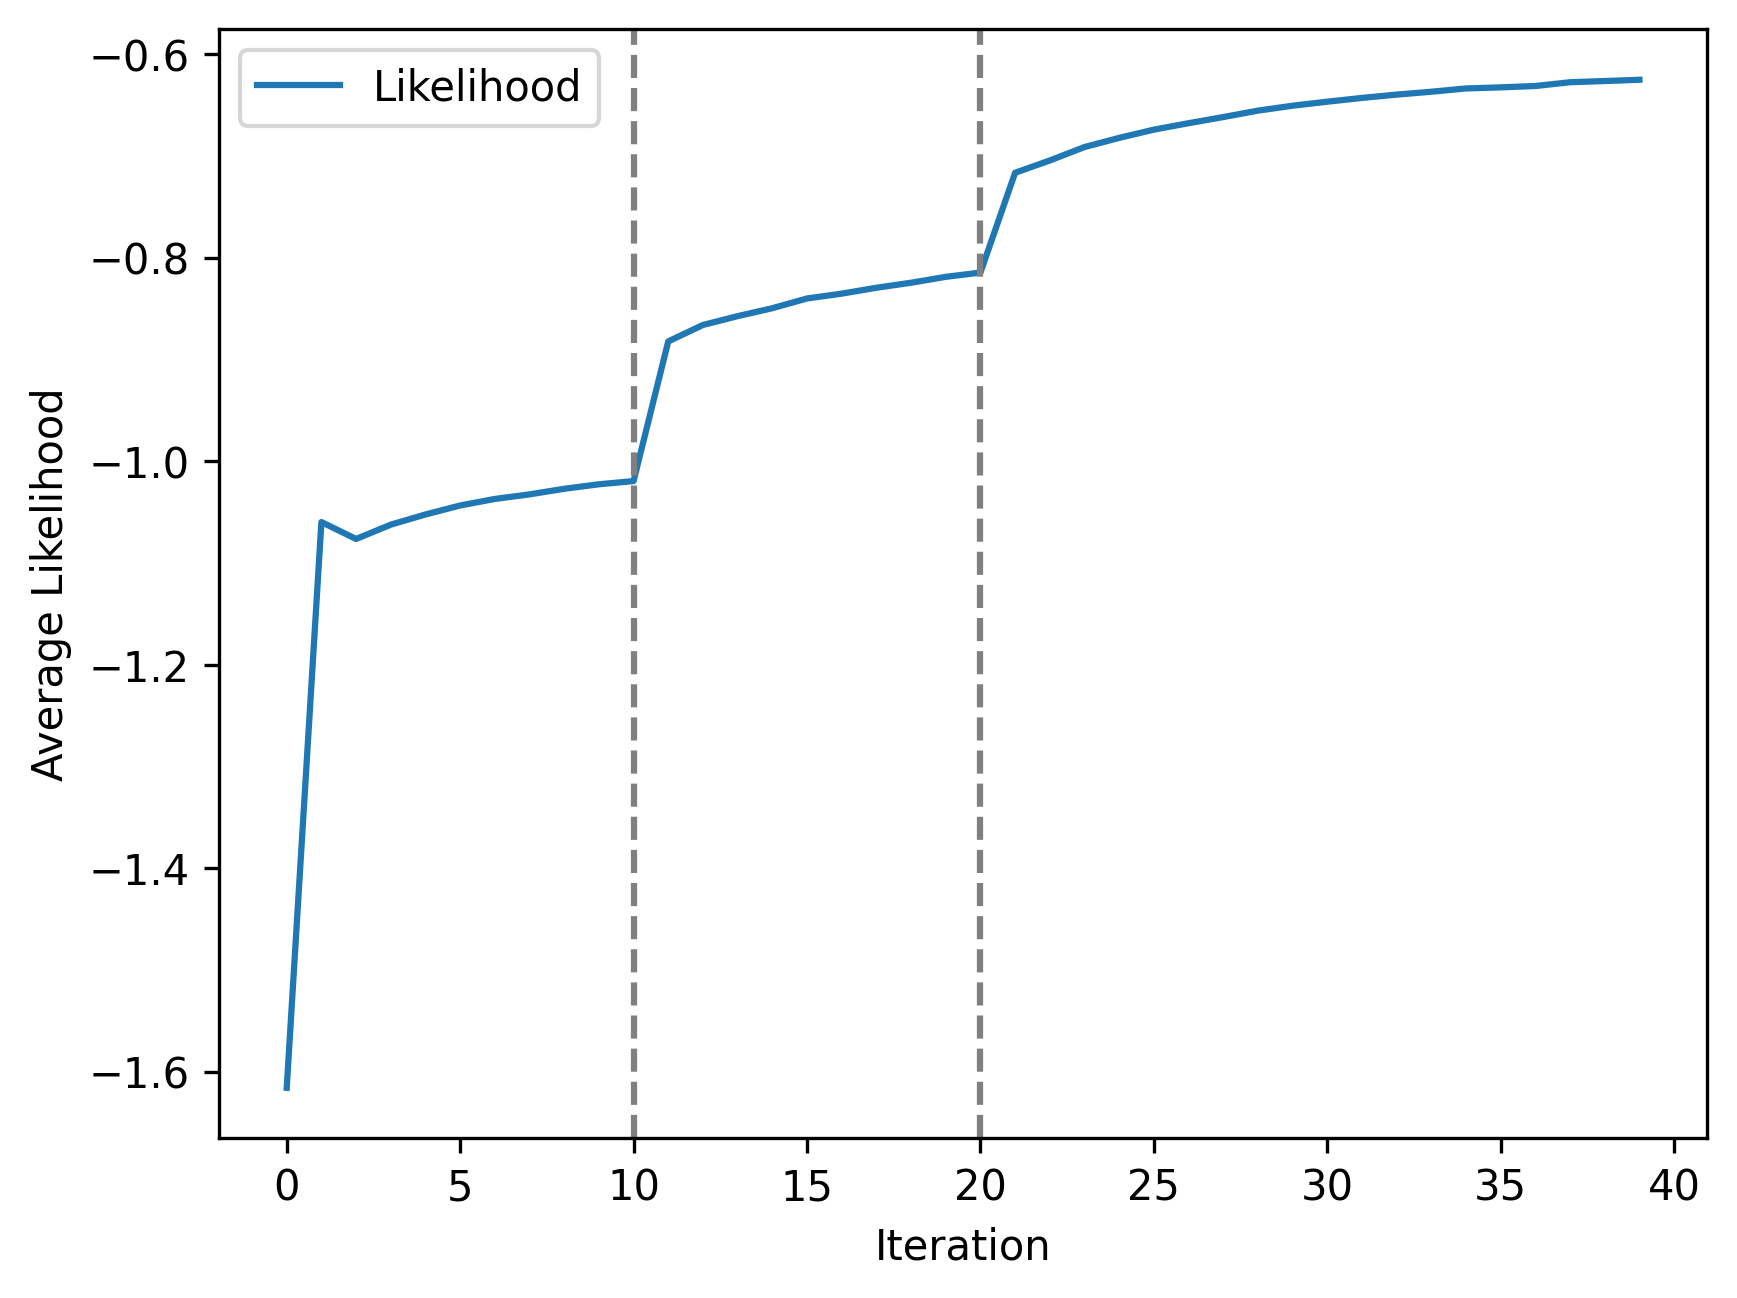

In [9]:
likelihood = []
for i in log:
    likelihood.append(i['average_log_likelihood'])

x = np.arange(0, 40)

fig = plt.figure(dpi = 300)
plt.plot(x, likelihood, label='Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Average Likelihood')
plt.axvline(x = 10, linestyle='--', color='gray')
plt.axvline(x = 20, linestyle='--', color='gray')
plt.legend()
plt.show()

In [48]:
import random

distorted_ballots = []
for b in ballots:
    # randomly remove 1 to 10 elements
    elements_to_remove = random.sample(b, random.randint(1, 11))
    distorted_ballots.append([element for element in b if element not in elements_to_remove])
distorted_ballots

[[9, 2, 11, 6, 14, 4, 1, 5, 7, 0, 3],
 [9, 2, 1, 8, 14, 4, 6, 5, 0, 7, 3],
 [2, 4, 8, 5, 1, 7],
 [2, 13, 6, 11, 1, 5, 14, 4, 8, 0, 7],
 [12, 13, 4, 5, 0, 1, 7],
 [9, 13, 12, 10, 14, 3],
 [12, 4, 5, 0],
 [9, 10, 11, 13, 4, 5, 1, 7],
 [12, 10, 13, 6, 2, 14, 8, 11, 5, 4, 1, 0, 7, 3],
 [13, 10, 14, 9, 2, 6, 5, 7, 3],
 [13, 10, 2, 11, 6, 8, 12, 4, 14, 1, 7, 3],
 [12, 6, 5, 7, 0, 3],
 [9, 13, 2, 14, 12, 10, 8, 6, 5, 1, 4, 7, 3, 0],
 [12, 10, 6, 8, 13, 2, 14, 1, 7, 4, 5, 3, 0],
 [10, 14, 11, 1, 3],
 [12, 14, 11, 1, 6, 8, 5, 10, 4, 7, 0, 3],
 [9, 12, 10, 1, 13, 14, 8, 6, 2, 7, 0, 3],
 [12, 1, 6, 7, 3],
 [9, 12, 13, 10, 14, 11, 5, 7, 3, 0],
 [10, 14, 4, 8, 13, 7, 0, 3],
 [9, 10, 13, 11, 14, 2, 6, 8, 5, 7],
 [12, 14, 10, 11, 0, 7, 3],
 [9, 2, 12, 11, 10, 1, 3, 0],
 [9, 11, 10, 4, 5, 14, 6, 0, 7],
 [12, 8, 11, 4, 0, 3],
 [2, 13, 10, 11, 14, 6, 5, 1, 7],
 [8, 5, 6, 7],
 [9, 11, 10, 12, 8, 13, 6, 14, 1, 7, 0, 4, 3, 5],
 [9, 12, 13, 10, 11, 4, 2, 7, 1, 0, 3],
 [9, 13, 8, 2, 12, 6, 4, 11, 1, 5, 0, 7,

In [10]:
# reload distorted_ballots
distorted_ballots = [[9, 2, 11, 6, 14, 4, 1, 5, 7, 0, 3],
 [9, 2, 1, 8, 14, 4, 6, 5, 0, 7, 3],
 [2, 4, 8, 5, 1, 7],
 [2, 13, 6, 11, 1, 5, 14, 4, 8, 0, 7],
 [12, 13, 4, 5, 0, 1, 7],
 [9, 13, 12, 10, 14, 3],
 [12, 4, 5, 0],
 [9, 10, 11, 13, 4, 5, 1, 7],
 [12, 10, 13, 6, 2, 14, 8, 11, 5, 4, 1, 0, 7, 3],
 [13, 10, 14, 9, 2, 6, 5, 7, 3],
 [13, 10, 2, 11, 6, 8, 12, 4, 14, 1, 7, 3],
 [12, 6, 5, 7, 0, 3],
 [9, 13, 2, 14, 12, 10, 8, 6, 5, 1, 4, 7, 3, 0],
 [12, 10, 6, 8, 13, 2, 14, 1, 7, 4, 5, 3, 0],
 [10, 14, 11, 1, 3],
 [12, 14, 11, 1, 6, 8, 5, 10, 4, 7, 0, 3],
 [9, 12, 10, 1, 13, 14, 8, 6, 2, 7, 0, 3],
 [12, 1, 6, 7, 3],
 [9, 12, 13, 10, 14, 11, 5, 7, 3, 0],
 [10, 14, 4, 8, 13, 7, 0, 3],
 [9, 10, 13, 11, 14, 2, 6, 8, 5, 7],
 [12, 14, 10, 11, 0, 7, 3],
 [9, 2, 12, 11, 10, 1, 3, 0],
 [9, 11, 10, 4, 5, 14, 6, 0, 7],
 [12, 8, 11, 4, 0, 3],
 [2, 13, 10, 11, 14, 6, 5, 1, 7],
 [8, 5, 6, 7],
 [9, 11, 10, 12, 8, 13, 6, 14, 1, 7, 0, 4, 3, 5],
 [9, 12, 13, 10, 11, 4, 2, 7, 1, 0, 3],
 [9, 13, 8, 2, 12, 6, 4, 11, 1, 5, 0, 7, 3],
 [9, 14, 12, 6, 4, 2, 8, 10, 5, 11, 1],
 [14, 2, 13, 7, 8, 4, 1, 3],
 [12, 6, 4, 8, 5, 14, 0],
 [10, 13, 11, 8, 14, 5, 1, 0],
 [9, 12, 2, 10, 13, 8, 5, 11, 7, 4, 3, 0],
 [9, 10, 14, 11],
 [13, 12, 11, 8, 14, 5, 1, 7, 0],
 [9, 2, 8, 13, 12, 10, 6, 4, 14, 5, 11, 7, 3],
 [6, 14, 2, 7],
 [12, 8, 2, 4, 1, 5, 7],
 [9, 13, 12, 2, 14, 10, 1, 8, 11, 4, 5, 7, 0, 3],
 [13, 14, 12, 6, 8, 11, 4, 10, 1, 5, 2, 0],
 [2, 14, 6, 8, 5, 4, 7],
 [9, 13, 10, 12, 8, 6, 2, 11, 14, 4, 5, 3, 7],
 [9, 12, 2, 11, 4, 6, 5, 7, 0, 3],
 [12, 13, 5, 6, 3],
 [12, 9, 10, 13, 2, 14, 4, 8, 5, 7, 3],
 [12, 9, 2, 6, 10, 3],
 [14, 2, 11, 6, 10, 5, 7, 4],
 [14, 11, 12, 1, 4, 5, 3, 0],
 [10, 6, 5, 4],
 [9, 13, 10, 11, 1, 5, 4, 7, 3],
 [12, 2, 11, 6, 10, 4, 1, 0, 7, 3],
 [12, 6, 2, 4, 1, 10, 7, 11, 3],
 [9, 10, 14, 8, 4, 1, 0, 3],
 [9, 2, 13, 12, 4, 1, 14, 10, 11, 8, 6, 7, 0, 3],
 [2, 6, 5, 14, 0],
 [12, 10, 2, 11, 4, 8, 1, 7, 3],
 [12, 2, 14, 7],
 [9, 12, 13, 8, 10, 2, 5, 6, 4, 11, 1, 7, 0],
 [2, 10, 11, 1, 0],
 [10, 13, 6, 11, 7, 0],
 [9, 12, 6, 13, 2, 14, 10, 11, 4, 0, 5, 3],
 [9, 11, 13, 1, 4, 6, 5, 0, 3],
 [12, 1, 10, 2, 4, 8, 5],
 [9, 4, 7, 0],
 [2, 11, 10, 3],
 [10, 13, 12, 14, 2, 7],
 [12, 4, 14, 10, 2, 1, 8, 7, 0, 3],
 [9, 13, 11, 12, 14, 10, 5, 1, 0, 7, 3],
 [9, 12, 10, 14, 8, 0],
 [12, 13, 14, 11, 1, 4, 6, 7],
 [13, 9, 12, 2, 5, 4, 1, 0, 3],
 [12, 9, 13, 2, 6, 8, 5, 4, 0, 14, 11, 1, 7, 3],
 [9, 2, 12, 11, 14, 10, 6, 1, 4, 0, 3],
 [9, 12, 14, 2, 8, 11, 1, 4, 0, 5, 7],
 [13, 12, 14, 10, 2, 11, 4, 5, 0],
 [13, 12, 14, 1, 0],
 [9, 2, 13, 11, 4, 12, 8, 6, 10, 5, 7, 1, 0],
 [9, 12, 13, 8, 2, 11, 10, 4, 14, 0, 5, 7],
 [9, 13, 11, 2, 12, 8, 10, 14, 5, 1, 4, 3, 7, 0],
 [9, 6, 10, 12, 2, 4, 11, 5, 8, 1, 7, 0, 3],
 [13, 14, 8, 1, 7, 5, 0],
 [10, 8, 11, 4, 3, 7],
 [12, 13, 6, 4, 11, 14, 7, 5, 0],
 [13, 9, 12, 14, 2, 11, 10, 8, 1, 7, 3, 0],
 [13, 8, 2, 11, 4],
 [2, 12, 4, 6, 8, 1, 7, 5],
 [12, 6, 8, 1, 13, 2, 11, 5, 4, 7, 0],
 [9, 14, 13, 5, 11, 8, 4, 0, 3, 7],
 [2, 6, 4, 3],
 [9, 12, 10, 1, 0],
 [9, 2, 11, 8, 10, 14, 13, 1, 5, 4, 0, 7, 3],
 [9, 6, 12, 10, 11, 2, 8, 5, 14, 1, 7, 3],
 [9, 13, 14, 11, 5],
 [4, 0, 3, 7],
 [13, 9, 12, 10, 2, 6, 14, 8, 11, 4, 1, 7, 5, 0],
 [13, 10, 4, 8, 11, 5, 7, 3],
 [12, 9, 13, 11, 6, 8, 10, 2, 5, 3],
 [9, 11, 13, 2, 4, 1],
 [12, 13, 10, 14, 0],
 [13, 14, 12, 10, 2],
 [13, 6, 12, 9, 14, 11, 5, 0, 4],
 [12, 10, 1, 4, 3],
 [9, 12, 10, 11, 8, 1, 5, 4, 7],
 [12, 6, 14, 2],
 [12, 9, 4, 8, 2, 6, 11, 0, 7],
 [9, 13, 11, 2, 6, 4, 1, 5, 7, 0],
 [13, 9, 12, 10, 4, 6, 7],
 [9, 10, 12, 13, 2, 11, 4, 8, 1, 6, 7, 5, 0, 3],
 [10, 1, 7, 3],
 [9, 12, 14, 13, 11, 2, 8, 10, 6, 0, 7, 5, 3],
 [13, 14, 2, 7],
 [9, 10, 6, 2, 11, 4, 14, 8, 1, 13, 0, 5, 7, 3],
 [9, 12, 6, 8, 11, 5, 4, 0, 3, 7],
 [9, 13, 2, 14, 1, 0],
 [9, 13, 2, 4, 14, 12, 8, 10, 1, 5, 7],
 [9, 10, 13, 14, 11, 2, 8, 7, 3, 0],
 [9, 12, 14, 11, 10, 7, 1, 3],
 [12, 0, 14, 5],
 [12, 9, 2, 13, 11, 14, 5, 6, 0, 3],
 [10, 12, 13, 14, 1, 5, 7, 0, 3],
 [2, 6, 12, 9, 11, 14, 4, 8, 3, 7],
 [9, 10, 8, 6, 4, 0],
 [13, 9, 2, 10, 12, 11, 6, 14, 5, 1, 4, 0, 3],
 [13, 14, 6, 5, 4, 1, 7, 0],
 [10, 12, 4, 8],
 [9, 13, 3, 0],
 [13, 10, 1, 14, 4, 0, 5, 7],
 [9, 12, 13, 2, 8, 4, 5, 14, 1, 7, 3, 0],
 [14, 2, 12, 6, 1],
 [13, 12, 4, 6, 14, 5, 7, 0],
 [10, 9, 12, 4, 8, 1, 6, 0],
 [10, 9, 6, 2, 14, 11, 13, 4, 1, 0],
 [13, 12, 8, 10, 4, 5, 7, 3],
 [13, 2, 14, 12, 6, 8, 11, 4, 10, 5, 1, 3, 7, 0],
 [9, 6, 2, 12, 13, 14, 8, 5, 7, 4, 11, 0, 1, 3],
 [2, 4, 0, 7, 3],
 [9, 12, 14, 8, 2, 10, 13, 6, 11, 4, 5, 1, 0],
 [2, 13, 8, 1],
 [12, 13, 14, 10, 6, 2, 11, 5, 8, 4, 1, 7, 0],
 [9, 13, 10, 11, 8, 5, 4, 0, 7],
 [9, 13, 14, 2, 10, 6, 8, 0, 7, 3],
 [9, 10, 4, 11, 1, 0],
 [13, 2, 8, 10, 12, 6, 1, 11, 4, 5, 0, 7],
 [9, 12, 10, 11, 2, 13, 4, 6, 8, 7, 0, 5, 3],
 [10, 13, 2, 8, 5, 11, 1, 6, 7, 3],
 [9, 6, 8, 12, 11, 10, 4, 14, 0],
 [9, 10, 6, 14, 11, 2, 4, 5, 0, 7, 3],
 [9, 14, 10, 12, 13, 6, 11, 4, 2, 7, 8, 0, 5, 1],
 [13, 9, 12, 2, 11, 1, 6, 5, 7, 3],
 [2, 12, 13, 10, 14, 8, 5, 11, 4, 1, 0, 3],
 [9, 13, 10, 14, 2, 12, 5, 6, 4, 1, 11, 7, 0, 3],
 [10, 2, 6, 1, 5, 0],
 [9, 5, 2, 4, 1],
 [9, 2, 10, 6, 4, 1, 0],
 [2, 13, 10, 14, 11, 7, 1, 0, 5, 3],
 [9, 12, 10, 8, 14, 4, 11, 5, 6, 1, 7, 0, 3],
 [6, 10, 4, 8, 7],
 [12, 13, 2, 10, 8, 14, 11, 4, 5, 1, 7, 0, 3],
 [13, 5, 7, 0, 3],
 [12, 8, 10, 9, 2, 14, 6, 4, 1, 0, 7, 5, 3],
 [9, 12, 4, 10, 2, 1, 8, 0],
 [14, 8, 1, 4, 0, 11, 5, 7],
 [13, 12, 14, 11, 5, 7],
 [8, 12, 6, 13, 11, 5, 14, 1, 0, 7, 3],
 [9, 10, 12, 2, 8, 6, 1, 7],
 [12, 6, 1, 13, 11, 2, 4, 5, 14, 0, 3],
 [9, 2, 13, 10, 8, 6, 14, 4, 11, 1, 5, 0, 3],
 [13, 11, 4, 5, 8],
 [9, 2, 5, 11, 4, 7, 0],
 [9, 10, 13, 8, 14, 7, 0],
 [10, 13, 1, 5, 2, 14, 6, 7, 3, 0],
 [13, 10, 14, 6, 2],
 [13, 14, 12, 11, 7, 2, 6, 4, 0],
 [9, 13, 10, 12, 11, 6, 2, 1, 4, 5, 7, 3],
 [12, 11, 10, 8, 4, 0, 3],
 [13, 10, 2, 4, 14, 8, 1, 0, 5, 3, 7],
 [9, 6, 11, 8, 4, 5, 1, 3],
 [12, 9, 14, 4, 2, 0, 3],
 [9, 10, 12, 13, 8, 2, 4, 14, 6, 1, 5, 11, 0, 3],
 [12, 11, 4, 7, 0],
 [9, 12, 8, 10, 13, 2, 7, 11, 1, 14, 4, 0, 3],
 [9, 10, 13, 5, 6, 7],
 [9, 10, 12, 8, 14, 2, 11, 4, 7, 1],
 [9, 12, 13, 6, 2, 11, 4, 5, 8, 7, 3, 1],
 [9, 6, 14, 7],
 [9, 10, 13, 12, 8, 14, 6, 5, 1, 4, 0, 3, 7],
 [9, 14, 10, 12, 13, 8, 11, 6, 4, 5, 1, 0, 7, 3],
 [9, 10, 12, 8, 6, 13, 4, 2, 5, 7, 0, 3],
 [13, 12, 10, 2, 8, 1, 14, 11, 7, 4, 3],
 [12, 14, 1, 8, 0, 3],
 [9, 2, 14, 10, 8, 12, 11, 7, 1, 4, 5, 3, 0],
 [12, 9, 4, 2, 10, 13, 6, 11, 5, 14, 8, 1, 0, 3],
 [11, 14, 6, 2, 5, 1, 7],
 [13, 2, 4, 14, 10, 5, 12, 1, 0],
 [9, 2, 12, 14, 4, 8, 11, 1, 5, 3],
 [13, 8, 5, 1],
 [6, 10, 13, 12, 11, 7],
 [12, 13, 8, 6, 1],
 [13, 10, 2, 11, 8, 5, 14, 4, 1, 0],
 [9, 1, 6, 10, 0],
 [10, 13, 4, 14, 5, 7, 0],
 [14, 4, 6, 5, 0, 7],
 [9, 2, 13, 8, 4, 14, 7, 5, 3, 0],
 [9, 13, 8, 10],
 [9, 13, 14, 12, 8, 2, 11, 1, 7, 4, 5, 3],
 [9, 12, 2, 13, 11, 8, 5, 1, 4, 6, 7, 3],
 [10, 12, 9, 8, 6, 4, 14, 11, 5, 2, 0, 1, 3, 7],
 [13, 12, 14, 10, 1, 0, 7, 3],
 [13, 9, 11, 4, 6, 8, 1, 7, 3],
 [8, 12, 6, 10, 5, 0],
 [8, 9, 11, 10, 3],
 [10, 14, 11, 13, 12, 6, 2, 4, 8, 5, 3, 7],
 [2, 14, 1, 0, 7],
 [9, 13, 10, 12, 2, 6, 4, 11, 8, 14, 5, 7, 0],
 [9, 8, 12, 14, 6],
 [13, 10, 9, 12, 2, 14, 11, 8, 6, 4, 7, 0, 5],
 [13, 9, 2, 11, 6, 10, 5, 1, 4, 8, 14, 0, 7, 3],
 [9, 6, 14, 4, 8, 3],
 [11, 8, 2, 6, 14, 5, 0, 3],
 [9, 10, 2, 12, 13, 14, 11, 8, 6, 1, 0, 5, 7, 3],
 [9, 8, 11, 14, 10],
 [10, 6, 2, 5, 14, 1, 7],
 [12, 2, 13, 4, 6, 14],
 [9, 10, 13, 1],
 [12, 13, 14, 11, 10, 1, 0, 5],
 [9, 12, 10, 13, 14, 11, 2, 8, 4, 1, 5, 7, 0, 3],
 [13, 12, 14, 10, 2, 6, 1, 7, 4, 0, 3],
 [9, 10, 12, 6, 11, 1, 5, 4, 0, 3],
 [13, 10, 4, 7, 1],
 [9, 12, 14, 10, 2, 8, 6, 11, 1],
 [12, 2, 11, 14],
 [14, 2, 6, 11, 0],
 [10, 6, 11, 5],
 [9, 13, 14, 6, 8, 1, 5, 7, 0, 3],
 [9, 14, 10, 12, 13, 11, 8, 1, 5, 7, 0, 3],
 [12, 14, 13, 2, 8, 11, 5, 7],
 [9, 12, 14, 5, 1, 0],
 [9, 10, 2, 8, 4, 6, 7, 1, 3],
 [9, 13, 1, 3],
 [12, 13, 10, 14, 6, 11, 7, 0],
 [2, 8, 13, 10, 6, 7],
 [12, 2, 10, 13, 8, 4, 11, 1, 14, 3, 7, 0],
 [12, 8, 11, 4, 2, 6, 1, 7, 5, 3],
 [12, 9, 2, 6, 11, 14, 5, 4, 7, 3],
 [12, 8, 4, 7],
 [9, 13, 12, 6, 4, 14, 2, 8, 11, 1, 5, 7, 0],
 [9, 13, 12, 14, 10, 1, 6, 8, 11, 7, 3],
 [9, 13, 11, 12, 10, 6, 14, 2, 5, 0, 1, 4, 3, 7],
 [9, 13, 12, 2, 8, 11, 14, 1, 4, 6, 5, 7, 0, 3],
 [9, 13, 12, 2, 10, 6, 11],
 [11, 5, 4, 3],
 [9, 13, 14, 5, 3],
 [9, 12, 10, 13, 14, 11, 2, 5, 8, 4, 1],
 [9, 2, 1, 5, 0],
 [9, 13, 6, 12, 10, 1, 2, 14, 11, 5, 7, 3],
 [9, 6, 0, 4],
 [9, 12, 14, 8, 2, 1, 4, 5, 3, 0],
 [9, 10, 14, 11, 2, 12, 6, 1, 5, 0],
 [12, 9, 10, 2, 5, 6, 7, 3],
 [9, 13, 2, 10, 12, 4, 8, 6, 5, 0, 7, 3],
 [9, 12, 2, 10, 11, 5, 6, 3, 0],
 [12, 9, 11, 1, 6, 14, 10, 4, 3, 0],
 [9, 14, 5, 1, 7],
 [9, 8, 14, 7, 0],
 [12, 9, 10, 2, 6, 8, 13, 14, 5, 1, 0, 3, 7],
 [9, 6, 14, 13, 8, 1, 0, 7],
 [12, 6, 9, 10, 13, 14, 2, 4, 5, 1, 0, 7],
 [12, 9, 7, 3],
 [6, 14, 12, 2, 8, 4, 1, 11, 10, 5, 0],
 [12, 13, 6, 11, 10, 4, 8, 2, 1, 14, 0, 7, 3],
 [9, 13, 2, 14, 10, 8, 4, 3, 0, 7, 5],
 [9, 2, 1, 6, 4, 0, 3],
 [13, 1, 5, 0],
 [9, 13, 2, 1, 3, 7],
 [9, 11, 14, 13, 12, 2, 8, 6, 5, 4, 1, 0, 3],
 [9, 2, 12, 14, 6, 11, 7, 5, 0, 3],
 [12, 13, 6, 8, 14, 11, 7, 3],
 [9, 11, 6, 13, 8, 2, 7, 5, 3],
 [6, 10, 14, 11],
 [13, 10, 6, 4, 1, 2, 5, 7, 0],
 [14, 2, 5, 7, 1, 3],
 [9, 14, 13, 10, 8, 5, 11, 3],
 [13, 2, 12, 14, 4, 11, 1, 6, 8, 5, 0, 3],
 [9, 10, 13, 12, 6, 14, 2, 1, 4, 8, 5, 7, 0, 3],
 [12, 9, 11, 13, 2, 4, 14, 7, 5],
 [9, 12, 13, 14, 6, 2, 11, 8, 4, 1, 5, 7, 0, 3],
 [12, 6, 8, 5, 1, 0, 3],
 [12, 6, 10, 14, 2, 8, 5, 4, 0, 7, 3],
 [12, 10, 14, 4, 6, 2, 11, 13, 1, 7, 0, 5],
 [9, 10, 4, 11],
 [9, 10, 13, 11, 4, 8, 2, 5, 0, 7, 3],
 [9, 12, 14, 10, 1, 2, 13, 8, 11, 4, 5, 0, 7, 3],
 [10, 13, 8, 4, 7, 3],
 [12, 10, 14, 6, 2, 8, 4, 0],
 [6, 10, 12, 8, 13, 2, 14, 11, 1, 0, 5, 7, 4],
 [9, 13, 8, 12, 6, 5, 7, 3],
 [12, 13, 8, 11, 14, 3, 0],
 [9, 12, 2, 14, 10, 6, 5, 4],
 [9, 8, 2, 10, 14, 6, 11, 1, 5, 0, 7],
 [14, 9, 4, 1, 5, 3],
 [14, 2, 1, 7],
 [9, 12, 10, 13, 2, 5, 8, 14, 11, 1, 4, 7, 3],
 [2, 14, 11, 8, 5, 1, 7],
 [9, 11, 1, 7],
 [9, 13, 14, 5, 12, 6, 4, 0, 7, 3],
 [2, 12, 6, 4],
 [9, 12, 10, 2, 14, 8, 13, 6, 11, 1, 4, 0, 7, 3],
 [9, 12, 13, 6, 11, 14, 5, 8, 3],
 [10, 2, 6, 5, 14, 1, 3],
 [9, 12, 2, 10, 14, 11, 1, 0],
 [12, 13, 6, 8, 1, 10, 7, 4, 0, 3],
 [9, 6, 13, 12, 10, 2, 11, 8, 4, 0, 1, 7, 3],
 [9, 12, 10, 2, 14, 8, 5, 6, 1, 7, 0, 3],
 [12, 9, 2, 13, 6, 14, 11, 8, 1, 5, 0, 7, 3],
 [9, 14, 2, 12, 6, 11, 8, 10, 4, 1, 7, 5, 0, 3],
 [9, 13, 10, 12, 2, 14, 6, 4, 11, 8, 5, 1, 7, 3],
 [9, 12, 2, 11, 0],
 [6, 14, 1, 0],
 [12, 14, 7, 3],
 [10, 12, 8, 2, 5],
 [9, 12, 13, 11, 2, 4, 10, 8, 6, 14, 5, 7, 0, 3],
 [11, 4, 7, 3],
 [9, 13, 10, 2, 1, 4, 7],
 [12, 13, 11, 4, 8, 14, 3, 7],
 [9, 10, 12, 6, 2, 8, 11, 1, 5, 7],
 [12, 14, 8, 4, 5, 1, 0, 3],
 [10, 12, 2, 14, 4, 5, 8, 0],
 [13, 12, 2, 9, 8, 4, 10, 11, 6, 7, 0, 3],
 [2, 6, 1, 7, 4, 3],
 [11, 12, 4, 8, 2, 1, 6, 5, 10, 14, 7, 0],
 [10, 11, 12, 4],
 [9, 13, 12, 14, 11, 8, 5, 6, 4, 0],
 [9, 4, 6, 0, 7, 3],
 [10, 12, 9, 14, 6, 2, 13, 4, 1, 11, 5, 0, 7, 3],
 [14, 11, 8, 4, 1, 7, 5, 0, 3],
 [12, 8, 13, 10, 11, 4, 2, 6, 0, 14, 5, 7, 3],
 [9, 11, 10, 4],
 [9, 10, 1, 5, 4],
 [12, 13, 14, 7, 5],
 [12, 6, 10, 8, 2, 11, 14, 4, 1, 7, 3],
 [13, 2, 5, 0],
 [9, 12, 6, 10, 14, 4, 5, 7],
 [9, 10, 13, 14, 0],
 [9, 12, 11, 13, 2, 14, 8, 4, 7, 5],
 [14, 11, 4, 0],
 [9, 2, 8, 14, 10, 1, 5, 11],
 [9, 14, 6, 12, 2, 10, 11, 1, 8, 4, 7, 5, 3, 0],
 [4, 8, 1, 3, 0],
 [13, 8, 5, 7, 3],
 [12, 13, 14, 10, 8, 2, 11, 1],
 [13, 12, 11, 8, 4, 5, 7, 1],
 [12, 13, 9, 10, 11, 14, 2, 6, 5, 7, 3, 0],
 [6, 1, 2, 5, 0],
 [9, 2, 12, 13, 3],
 [12, 8, 13, 2, 10, 11, 6, 5, 7, 0],
 [13, 2, 14, 5, 6, 11, 7],
 [13, 9, 8, 10, 6, 2, 4, 5, 11, 7, 0, 3],
 [9, 10, 12, 13, 8, 2, 4, 6, 0, 14, 7, 1, 3],
 [9, 12, 8, 11, 14, 10, 1, 6, 4, 13, 5, 0, 3, 7],
 [9, 12, 13, 2, 5, 8, 14, 10, 6, 4, 7],
 [9, 6, 14, 10, 13, 11, 5, 1, 3, 0],
 [6, 4, 5, 3],
 [9, 14, 12, 13, 8, 2, 6, 11, 5, 4, 7, 1, 0, 3],
 [9, 2, 8, 3],
 [2, 9, 10, 8, 14, 12, 4, 11, 5, 7, 0],
 [2, 8, 6, 14, 4],
 [9, 12, 13, 6, 2, 14, 8, 10, 7, 1, 4, 0],
 [9, 11, 12, 6, 10, 13, 14, 5, 0, 7],
 [9, 13, 12, 6, 2, 8, 4, 0, 5],
 [12, 10, 1, 14, 4, 11, 6, 8, 13, 5, 7, 3, 0],
 [9, 13, 2, 11, 5, 10, 8, 4, 7],
 [9, 12, 2, 6, 13, 8, 14, 5, 1, 0, 7, 4, 3],
 [9, 8, 10, 13, 14, 12, 11, 1, 7, 3, 0],
 [12, 13, 11, 6, 8, 0, 5, 1],
 [12, 6, 8, 11, 10, 14, 0, 5, 4, 7, 3],
 [14, 10, 13, 2, 12, 8, 11, 6, 1, 4, 5, 0, 7, 3],
 [2, 11, 6, 9, 8, 5, 10, 3],
 [10, 12, 9, 8, 2, 6, 13, 11, 5, 0, 4, 7, 1],
 [12, 10, 5, 14, 1, 0],
 [9, 11, 1, 14, 3],
 [9, 12, 10, 8, 14, 6, 4, 5, 7, 3],
 [13, 14, 2, 12, 10, 6, 8, 0, 1, 4, 5, 7, 3],
 [9, 12, 14, 13, 2, 6, 8, 4, 11, 0, 3],
 [10, 9, 12, 13, 6, 2, 14, 8, 11, 7, 5, 1, 3, 0],
 [9, 12, 13, 10, 1, 2, 4, 7, 3],
 [12, 9, 13, 11, 0, 7, 3],
 [12, 10, 5, 1, 4, 3],
 [9, 13, 2, 11, 7, 5, 0],
 [12, 14, 6, 8, 11, 2, 5, 1, 4, 7, 0, 3],
 [9, 5, 7, 8],
 [13, 6, 4, 5],
 [2, 10, 11, 5, 1, 4, 7, 3],
 [12, 13, 5, 8, 14, 1, 11, 7, 3],
 [9, 8, 2, 10, 11, 12, 14, 5, 4, 7, 3],
 [8, 4, 1, 0, 14, 5, 3],
 [12, 13, 8, 10, 2, 11, 4, 14, 7, 0, 3],
 [10, 8, 6, 11, 4, 5, 0, 3],
 [12, 8, 14, 11, 10, 1, 13, 4, 6, 3],
 [9, 14, 10, 12, 2, 13, 4, 8, 6, 5, 1, 7],
 [10, 8, 6, 5, 1, 0],
 [13, 12, 9, 2, 8, 6, 5, 1, 7, 3, 0],
 [9, 2, 6, 11, 1, 0, 5, 7],
 [9, 14, 13, 10, 12, 2, 8, 4, 6, 5, 7, 3],
 [9, 12, 10, 11, 2, 13, 4, 7, 5, 3],
 [9, 10, 2, 3],
 [11, 6, 12, 13, 5, 14, 8, 4, 7],
 [2, 0, 5, 3],
 [11, 12, 13, 6, 2, 10, 8, 14, 0, 7, 1, 4, 5, 3],
 [13, 10, 12, 9, 6, 2, 4, 14, 8, 7],
 [9, 12, 10, 11, 8, 14, 2, 1, 6, 4, 5, 0, 7, 3],
 [9, 12, 2, 6, 11, 14, 8, 5, 4, 7, 1, 3, 0],
 [12, 9, 14, 2, 13, 10, 7, 1, 5, 0, 3],
 [9, 13, 14, 5, 7, 0],
 [9, 6, 14, 1, 7, 3],
 [9, 12, 11, 13, 6, 8, 1, 10, 14, 5, 7, 3],
 [12, 2, 11, 8, 4, 6, 5, 0],
 [10, 13, 14, 0],
 [14, 2, 8, 3],
 [10, 9, 11, 14, 8, 1, 2, 6, 7, 3],
 [14, 2, 8, 1, 4, 5, 0],
 [10, 8, 5, 0],
 [9, 12, 13, 2, 6, 14, 4, 10, 3, 5, 0, 7],
 [9, 13, 12, 6, 10, 7, 4, 0],
 [9, 2, 14, 6, 12, 1, 7, 4, 5, 0, 3],
 [9, 13, 12, 2, 8, 4, 1, 7, 0, 5, 3],
 [9, 12, 13, 14, 10, 2, 8, 4, 6, 7, 5, 1, 0, 3],
 [9, 11, 12, 13, 6, 14, 10, 2, 5, 1, 0, 8, 3],
 [4, 1, 3, 0],
 [13, 10, 12, 14, 2, 11, 6, 8, 1, 4, 7, 5, 3, 0],
 [13, 12, 10, 6, 2, 8, 1, 5, 7, 0],
 [9, 6, 10, 11, 8, 3],
 [9, 10, 12, 4, 11, 7],
 [9, 11, 4, 5, 3],
 [2, 13, 10, 11, 5, 1, 7, 3],
 [10, 6, 2, 11, 8, 13, 4, 14, 5, 7, 0],
 [9, 12, 8, 13, 11, 10, 2, 14, 5, 6, 1, 7, 0],
 [9, 14, 4, 8, 6, 1, 0, 3],
 [13, 10, 2, 11, 1, 0],
 [10, 13, 2, 5, 14, 0, 3],
 [2, 10, 12, 14, 6, 8, 0, 5, 7],
 [12, 9, 10, 8, 11, 2, 4, 6, 1, 5, 0, 3],
 [9, 13, 10, 12, 2, 11, 8, 4, 5, 1, 0, 3],
 [13, 2, 10, 11, 12, 5, 6, 14, 7, 4, 1, 0, 3],
 [12, 14, 11, 7],
 [12, 9, 8, 13, 14, 2, 5, 4, 6, 7, 3, 1, 0],
 [9, 6, 8, 10, 4, 5],
 [9, 14, 13, 6, 10, 12, 4, 2, 8, 11, 7, 5, 3],
 [9, 12, 6, 2, 11, 14, 1, 5, 4, 0],
 [12, 9, 13, 6, 5, 8, 3],
 [9, 2, 14, 12, 13, 1, 6, 8, 11, 7, 5, 0, 3],
 [9, 13, 12, 11, 14, 8, 4, 3, 7, 5],
 [9, 12, 8, 14, 2, 4, 6, 11, 0, 5, 3],
 [9, 12, 4, 11, 13, 10, 1, 14, 6, 2, 8, 5, 7, 3],
 [13, 2, 14, 4, 1, 11, 5, 0, 3],
 [14, 6, 8, 10, 2, 1, 0, 7, 3],
 [10, 8, 11, 4, 7],
 [9, 13, 8, 5, 11, 7, 4, 1, 3],
 [12, 13, 2, 9, 10, 14, 11, 5, 8, 6, 4, 0, 7, 3],
 [13, 10, 8, 4, 7, 0],
 [12, 2, 8, 11, 4, 1, 5],
 [9, 12, 11, 6, 5, 1, 8, 0, 7, 3],
 [9, 2, 13, 10, 11, 8, 14, 7, 5, 0, 3],
 [6, 12, 9, 10, 14, 1, 7],
 [13, 9, 12, 11, 5],
 [9, 12, 14, 10, 2, 13, 6, 1, 4, 0, 3, 5, 7],
 [9, 4, 5, 3],
 [9, 14, 10, 6, 4, 0, 7],
 [9, 12, 13, 6, 14, 1, 4, 7, 0],
 [13, 9, 14, 10, 5, 0],
 [12, 2, 8, 5],
 [13, 10, 11, 8, 6, 7, 1, 0, 3],
 [9, 12, 10, 8, 13, 6, 2, 14, 11, 1, 5, 7, 3, 0],
 [9, 6, 12, 13, 14, 5, 4, 1, 0, 7, 3],
 [12, 4, 11, 6, 5, 3],
 [9, 2, 12, 13, 8, 6, 11, 4, 5, 7, 3, 0],
 [9, 12, 2, 10, 6, 7, 5],
 [9, 12, 13, 2, 11, 8, 6, 14, 4, 5, 7, 1, 0],
 [9, 2, 13, 6, 8, 14, 11, 7, 5, 0],
 [13, 2, 14, 1, 5],
 [9, 13, 11, 2, 6],
 [12, 14, 2, 10, 1, 5, 11, 7, 4, 0, 3],
 [9, 14, 6, 8, 7, 1, 0],
 [9, 13, 12, 2, 8, 11, 6, 14, 4, 5, 7, 0, 3],
 [11, 6, 10, 5, 3, 7],
 [10, 2, 14, 6, 8, 11, 1, 7, 0, 3],
 [12, 9, 8, 13, 14, 4, 11, 10, 6, 0, 7, 3],
 [10, 8, 2, 13, 6, 14, 5, 0],
 [8, 13, 12, 6, 10, 4, 14, 7, 1],
 [9, 2, 1, 5],
 [11, 2, 4, 14],
 [9, 10, 11, 12, 2, 5, 14, 1, 6, 4, 7, 0, 3],
 [14, 6, 11, 8, 5],
 [9, 10, 13, 11, 6, 14, 2, 5, 4, 1, 0],
 [10, 11, 12, 13, 8, 4, 1, 14, 7, 3],
 [6, 10, 11, 5],
 [9, 6, 14, 0, 5, 1, 3, 7],
 [9, 2, 12, 10, 13, 11, 14, 8, 6, 4, 7, 0, 5, 3],
 [10, 13, 8, 3, 0],
 [6, 14, 0, 5],
 [9, 4, 5, 1],
 [11, 8, 4, 0, 7, 1],
 [9, 12, 6, 4, 5, 0, 3, 7],
 [9, 12, 14, 6, 1],
 [13, 2, 1, 7],
 [12, 9, 13, 11, 1],
 [9, 13, 6, 12, 8, 11, 14, 0, 5, 7, 3],
 [9, 12, 14, 8, 11, 2, 4, 0, 7, 5, 3],
 [13, 9, 10, 11, 12, 7, 4, 1, 3],
 [9, 6, 12, 10, 4, 1, 5, 0],
 [9, 13, 14, 10, 2, 4, 6, 8, 1, 7, 0, 3],
 [13, 2, 14, 7],
 [13, 11, 2, 14, 6, 4, 1, 3, 5],
 [9, 6, 2, 14, 4, 3, 7],
 [13, 4, 6, 5, 7, 3],
 [9, 14, 10, 12, 11, 2, 8, 5, 4, 1, 0],
 [9, 12, 8, 10, 14, 2, 6, 1, 4, 5, 7, 0, 3],
 [10, 13, 12, 14, 1, 8, 5, 6, 0, 4, 7, 3],
 [9, 13, 5, 0],
 [9, 13, 2, 12, 10, 14, 8, 6, 5, 4, 1, 7, 0, 3],
 [10, 13, 5, 1, 7, 3],
 [14, 12, 2, 4, 0, 7],
 [9, 10, 12, 2, 14, 13, 6, 11, 4, 5, 1, 0, 7, 3],
 [9, 12, 2, 14, 10, 4, 5, 6, 3],
 [10, 8, 14, 2, 0],
 [4, 11, 10, 8, 1, 0, 7, 5, 3],
 [10, 4, 1, 3],
 [12, 13, 14, 8, 10, 2, 4, 1, 7, 5],
 [9, 11, 2, 14, 4, 1, 5, 0],
 [13, 12, 10, 11, 2, 14, 8, 4, 6, 3, 5, 7, 0],
 [9, 12, 2, 6, 1, 3],
 [9, 10, 12, 14, 6, 0],
 [9, 11, 4, 7, 1, 3],
 [9, 14, 10, 11, 2, 5],
 [2, 6, 4, 11, 0],
 [10, 4, 2, 1, 7, 0, 3],
 [9, 8, 14, 2, 11, 4, 5, 0],
 [10, 13, 9, 2, 14, 4, 1, 5, 7],
 [12, 6, 5, 0],
 [12, 6, 9, 11, 2, 10, 8, 14, 1, 4, 7, 0],
 [12, 13, 11, 8, 4, 1, 6, 5, 0, 7, 3],
 [9, 2, 8, 11],
 [9, 8, 11, 10, 2, 13, 6, 1, 5, 7, 0, 3],
 [9, 6, 13, 8, 2, 14, 10, 4, 5, 7, 0, 3],
 [9, 12, 13, 14, 2, 8, 6, 1, 0],
 [11, 4, 1, 0, 3],
 [9, 12, 13, 2, 14, 10, 11, 6, 4, 1, 5, 8, 0, 3],
 [9, 10, 2, 8, 11, 13, 5, 1, 0, 7, 3],
 [12, 13, 9, 2, 10, 4, 5, 0, 7, 3],
 [12, 6, 10, 2, 5, 11, 8, 1, 3],
 [9, 10, 14, 11, 1, 4, 0],
 [9, 2, 12, 14, 10, 1, 0, 3],
 [11, 10, 4, 5, 0],
 [9, 13, 14, 11, 6, 8, 2, 1, 7, 0, 3],
 [12, 9, 2, 6, 10, 11, 13, 14, 4, 8, 5, 1, 3],
 [9, 12, 13, 14, 1, 2, 5, 7, 11, 8, 0, 3],
 [9, 2, 12, 5, 0, 3],
 [11, 13, 6, 4, 14, 2, 12, 0, 1, 3],
 [9, 10, 2, 12, 13, 11, 4, 8, 5, 1, 3, 0],
 [13, 6, 1, 7, 5],
 [9, 10, 14, 12, 8, 2, 13, 11, 1, 4, 6, 7, 3, 0],
 [9, 2, 14, 6, 10, 5, 1],
 [9, 13, 10, 12, 6, 14, 2, 11, 8, 1, 5, 7, 0, 3],
 [13, 10, 8, 0, 1, 3],
 [13, 11, 14, 10, 6, 5, 0, 4],
 [12, 2, 6, 13, 8, 11, 10, 4, 5, 0, 3],
 [9, 12, 10, 6, 14, 4, 8, 5, 0, 3],
 [12, 2, 0, 5, 3],
 [14, 8, 12, 13, 10, 6, 1, 7],
 [9, 13, 2, 12, 1, 0],
 [9, 12, 14, 2, 11, 5, 1, 0, 3],
 [9, 13, 2, 3],
 [14, 2, 5, 7],
 [9, 14, 10, 6, 8, 4, 5, 0, 3],
 [9, 13, 8, 10, 2, 14, 4, 1, 6, 3, 0],
 [12, 13, 10, 2, 14, 6, 4, 5, 7, 3, 0],
 [9, 11, 13, 8, 6, 2, 1, 4, 5, 7, 0],
 [12, 14, 11, 1, 4, 3],
 [13, 9, 12, 2, 10, 11, 8, 14, 4, 1, 0, 5, 3, 7],
 [12, 13, 2, 14, 11, 10, 4, 6, 3, 0],
 [9, 11, 2, 14, 10, 6, 5, 1, 7, 0],
 [12, 10, 6, 7],
 [12, 2, 5, 1, 6],
 [2, 12, 8, 14, 11],
 [9, 12, 13, 10, 2, 4, 14, 6, 5, 7, 3, 0],
 [12, 10, 2, 11, 8, 5, 7, 0],
 [9, 2, 5, 6, 7, 0],
 [10, 2, 13, 8, 11, 14, 4, 0, 7],
 [12, 13, 10, 6, 14, 7, 5, 1, 0],
 [12, 10, 14, 11, 4, 5, 7, 0, 3],
 [12, 11, 10, 1, 3],
 [13, 12, 6, 4, 1, 3],
 [9, 13, 11, 8, 14, 2, 4, 0, 3],
 [13, 11, 6, 4, 7, 0],
 [9, 13, 2, 11, 10, 12, 4, 5, 8, 1, 7, 3],
 [12, 13, 9, 8, 2, 10, 6, 4, 3, 7],
 [2, 13, 9, 12, 8, 6, 14, 4, 1, 7, 0, 3],
 [9, 2, 1, 0],
 [13, 11, 10, 2, 6, 8, 14, 1, 7],
 [9, 12, 11, 2, 10, 13, 1, 14, 5, 4, 6, 0, 7, 3],
 [6, 2, 14, 4],
 [6, 12, 13, 9, 8, 3],
 [13, 9, 10, 1, 8, 7, 2, 0],
 [9, 12, 14, 2, 13, 8, 10, 7, 4, 1, 3],
 [12, 13, 9, 11, 10, 2, 8, 6, 14, 1, 5, 3, 7],
 [12, 9, 10, 4, 5, 7],
 [9, 13, 14, 2, 10, 8, 5, 1, 0],
 [9, 12, 10, 8, 2, 5, 7, 3],
 [9, 13, 12, 6, 10, 11, 8, 2, 14, 1, 0, 5, 3, 7],
 [9, 2, 10, 14, 11, 1, 7, 4, 5, 0, 3],
 [13, 5, 2, 4],
 [12, 11, 2, 14, 8, 0, 7, 3],
 [2, 8, 14, 11, 3],
 [9, 4, 8, 1, 14, 11],
 [2, 12, 13, 9, 14, 10, 11, 1, 8, 6, 7, 5, 0, 3],
 [11, 6, 14, 0],
 [12, 13, 9, 2, 14, 6, 8, 5, 11, 0, 3],
 [9, 12, 14, 2, 10, 13, 4, 6, 11, 1, 5, 3, 7, 0],
 [13, 6, 1, 3],
 [8, 5, 10, 14, 6, 11, 1, 3],
 [9, 12, 13, 8, 1, 14, 2, 4, 6, 7, 5, 3, 0],
 [2, 14, 8, 0],
 [12, 11, 13, 9, 8, 6, 4, 0, 5, 1],
 [9, 13, 12, 10, 6, 2, 4, 5, 14, 7, 0, 11, 3],
 [13, 12, 10, 6, 8, 4, 1, 5, 7],
 [9, 13, 14, 12, 6, 2, 10, 5, 7, 4, 0],
 [9, 11, 6, 8, 3],
 [9, 13, 6, 4, 1, 7, 3],
 [9, 12, 14, 10, 13, 5, 3, 7],
 [9, 11, 2, 13, 8, 4, 14, 6, 1, 5, 3, 7, 0],
 [13, 6, 2, 10, 8, 11, 5, 1, 7, 0, 3],
 [9, 8, 14, 6, 4, 5, 1, 0, 3, 7],
 [10, 12, 13, 6, 11, 5, 14, 8, 1, 7, 0, 3],
 [9, 13, 10, 14, 7, 4, 3],
 [2, 9, 11, 14, 1, 12, 4, 8, 5, 6, 7, 0, 3],
 [13, 14, 8, 0],
 [13, 2, 10, 6, 4, 11, 5, 0],
 [9, 14, 6, 8, 0],
 [13, 6, 10, 2, 8, 11, 0, 4, 7, 3],
 [13, 10, 12, 6, 11, 14, 8, 2, 1, 5, 0, 7, 3],
 [2, 9, 13, 14, 6, 1, 8, 0, 5, 3],
 [9, 14, 6, 2, 1, 10, 5],
 [13, 2, 6, 4, 5, 1],
 [12, 5, 7, 4, 3, 0, 1],
 [9, 13, 11, 8, 4, 2, 0],
 [9, 6, 12, 10, 11, 13, 2, 8, 14, 5, 1, 3, 0],
 [9, 12, 10, 2, 6, 14, 11, 5, 0],
 [13, 12, 2, 6, 11, 10, 5, 1, 8, 14, 4, 0, 7, 3],
 [9, 11, 8, 2, 1, 7],
 [12, 9, 2, 10, 13, 11, 4, 1, 3],
 [9, 12, 13, 11, 6, 2, 4, 14, 8, 5, 1, 7, 3, 0],
 [9, 10, 11, 1, 7],
 [9, 10, 13, 4, 6, 8, 1, 11, 5, 0, 3],
 [13, 6, 14, 11, 4],
 [9, 12, 13, 11, 10, 2, 6, 4, 5, 1, 7, 0, 3],
 [9, 12, 13, 6],
 [9, 10, 12, 8, 11, 1, 0, 7, 3],
 [9, 2, 12, 13, 1, 11, 14, 4, 5, 3, 7, 0],
 [9, 13, 14, 12, 10, 2, 4, 11, 8, 1, 5, 7, 3, 0],
 [14, 9, 8, 10, 2, 5, 6, 4, 1, 7, 3],
 [2, 1, 6, 7],
 [14, 11, 4, 7, 0, 3],
 [6, 14, 0, 3, 7],
 [9, 10, 2, 4, 7, 0],
 [10, 2, 13, 6, 12, 11, 14, 5, 1, 4, 0, 7, 3],
 [13, 10, 14, 12, 11, 5, 4, 1, 7, 3],
 [9, 10, 1, 0],
 [9, 12, 13, 10, 1, 5, 7],
 [12, 4, 5, 3],
 [9, 7, 3, 0],
 [9, 4, 8, 0],
 [13, 9, 11, 5, 7, 0],
 [13, 8, 14, 3, 0],
 [12, 13, 14, 4, 8, 6, 11, 3, 0],
 [2, 9, 13, 10, 8, 4, 6, 14, 11, 7, 0],
 [12, 10, 13, 1, 11, 5, 3],
 [9, 2, 6, 12, 13, 10, 8, 11, 14, 1, 7, 0, 3],
 [12, 11, 5, 1, 7, 0],
 [9, 10, 12, 14, 8, 6, 0, 7, 3],
 [9, 12, 13, 10, 8, 2, 6, 7, 0, 3],
 [13, 12, 10, 2, 5, 1],
 [9, 12, 10, 2, 14, 6, 11, 5, 8, 3, 0, 4],
 [10, 12, 2, 11, 1, 0, 3],
 [12, 10, 6, 14, 1, 8, 0, 3],
 [13, 2, 9, 12, 11, 6, 14, 0, 4, 3],
 [9, 13, 2, 11, 14, 5, 8, 7, 1, 3],
 [2, 10, 4, 7, 1],
 [14, 12, 0, 3],
 [6, 12, 13, 8, 10, 2, 1, 4, 5, 3],
 [2, 4, 8, 0, 5],
 [9, 13, 10, 2, 8, 14, 4, 5, 11, 1, 7, 3, 0],
 [14, 2, 8, 4, 5, 7, 3, 0],
 [9, 13, 2, 6, 11, 8, 1, 14, 5, 3],
 [9, 14, 8, 10, 0],
 [12, 13, 14, 8, 11, 6, 0],
 [2, 8, 11, 4, 14, 0, 3],
 [9, 13, 10, 12, 11, 14, 4, 1, 7, 0],
 [12, 9, 1, 2, 10, 4, 7, 3, 0],
 [12, 13, 11, 2, 14, 6, 8, 4, 5, 0, 3],
 [9, 10, 1, 6, 11, 7, 5, 0],
 [13, 6, 11, 8, 14, 2, 10, 4, 1, 0, 3],
 [10, 13, 12, 4, 8, 1, 5, 7, 0],
 [9, 11, 2, 0],
 [13, 8, 2, 14, 4, 6, 1, 3],
 [9, 10, 13, 14, 4, 8, 6, 7, 3],
 [12, 2, 13, 5, 6, 8, 7, 3],
 [13, 6, 0, 7],
 [9, 8, 11, 10, 4, 1, 5, 0],
 [13, 9, 2, 1, 0, 3],
 [9, 13, 10, 12, 14, 8, 11, 5, 4, 0],
 [13, 2, 14, 8, 6, 11, 4, 1, 5],
 [2, 8, 6, 14, 1, 4, 7, 0],
 [12, 10, 13, 2, 8, 11, 5, 4, 7, 0, 1, 3],
 [9, 2, 6, 10, 12, 4, 11, 1, 5, 7],
 [9, 13, 14, 5, 0, 3],
 [12, 13, 14, 11, 2, 10, 8, 4, 6, 1, 5, 0, 7, 3],
 [13, 4, 8, 1, 0, 5],
 [11, 13, 10, 12, 4, 6, 1, 5, 0],
 [13, 11, 2, 6, 5, 10, 0],
 [9, 2, 10, 13, 12, 11, 1, 4, 14, 5, 7, 0, 3],
 [6, 13, 11, 4, 14, 8, 0, 1, 7],
 [2, 10, 8, 4, 0],
 [2, 13, 1, 0],
 [12, 6, 10, 2, 8],
 [12, 10, 13, 14, 11, 4, 8, 1, 0, 5, 3, 7],
 [9, 13, 12, 10, 11, 8, 5, 6, 14, 4, 1, 7, 0],
 [13, 11, 4, 9, 8, 12, 10, 14, 7, 3],
 [9, 13, 2, 4, 10, 1, 14, 12, 11, 5, 8, 7, 0, 3],
 [6, 12, 2, 13, 4, 8, 0, 3, 7],
 [2, 9, 13, 14, 0, 1, 7],
 [13, 2, 14, 6, 11, 10, 7, 0, 8, 3],
 [12, 11, 5, 2, 7, 4],
 [12, 9, 8, 11, 14, 6, 4, 10, 1, 7, 5, 3, 0],
 [9, 6, 12, 2, 10, 13, 14, 11, 8, 1, 4, 5, 0, 7],
 [2, 14, 9, 6, 10, 11, 1, 7, 3],
 [9, 11, 13, 12, 4, 2, 8, 6, 1, 5],
 [9, 13, 2, 14, 6, 11, 8, 4, 0],
 [2, 4, 11, 6, 7, 1, 3],
 [9, 12, 10, 14, 13, 6, 5, 4, 11, 1, 7, 3],
 [12, 10, 9, 13, 5, 6, 14, 8, 2, 11, 7, 4, 0, 3],
 [11, 12, 2, 4, 1],
 [12, 9, 2, 10, 11, 6, 14, 8, 0, 3, 7],
 [9, 12, 13, 11, 8, 2, 14, 6, 1, 5, 4, 7, 3, 0],
 [9, 12, 14, 10, 11, 4, 6, 5, 3, 7, 0],
 [9, 13, 12, 2, 8, 6, 10, 1, 5, 4, 7, 0],
 [10, 9, 13, 6, 14, 4, 0, 5, 1, 3],
 [12, 13, 9, 14, 11, 6, 2, 10, 8, 4, 1, 0, 7, 3],
 [12, 6, 14, 13, 5, 10, 8, 11, 4, 7],
 [9, 11, 4, 0, 7],
 [12, 14, 8, 1],
 [10, 9, 12, 8, 14, 4, 0, 1, 7],
 [9, 8, 4, 1, 7],
 [9, 13, 10, 2, 11, 6, 8, 14, 5, 1, 7, 3],
 [12, 13, 2, 10, 8, 11, 6, 1, 5, 7, 4, 3, 0],
 [2, 13, 10, 12, 6, 4, 11, 1, 14, 8, 0, 7, 5, 3],
 [13, 9, 6, 2, 14, 11, 12, 4, 8, 7, 3, 0, 5],
 [12, 11, 1, 2, 8, 5, 6, 7, 3],
 [8, 14, 7, 5, 3],
 [9, 13, 10, 11, 8, 12, 4, 14, 5, 0, 3],
 [9, 13, 10, 7, 3],
 [14, 11, 4, 0, 1, 3],
 [10, 8, 11, 3],
 [9, 12, 13, 14, 2, 10, 8, 6, 7, 4, 0],
 [11, 2, 13, 14],
 [9, 12, 14, 11, 10, 13, 5, 4, 7, 1, 0, 3],
 [10, 12, 9, 2, 6, 11, 1, 8, 5, 0, 7],
 [12, 13, 9, 10, 8, 11, 4, 5, 7, 0],
 [9, 13, 2, 12, 4, 1, 3, 0],
 [10, 12, 13, 6, 14, 2, 11, 4, 5, 3, 0],
 [9, 12, 11, 2, 4, 14, 13, 1, 0, 6, 3],
 [9, 12, 10, 14, 11, 13, 2, 4, 6, 5, 3, 0],
 [9, 12, 2, 6, 8, 14, 11, 4, 10, 1, 7, 5, 3, 0],
 [9, 13, 2, 10, 11, 14, 1, 6, 7],
 [2, 11, 10, 6],
 [9, 13, 14, 4, 6, 11, 12, 2, 8, 0, 3, 5, 1, 7],
 [9, 13, 11, 10, 14, 8, 7, 0, 3],
 [9, 12, 2, 13, 14, 11, 6, 4, 5, 1, 7, 3],
 [13, 12, 2, 8, 4, 6, 5, 0],
 [6, 2, 11, 1, 5, 8, 0, 7, 3],
 [9, 13, 12, 2, 10, 11, 5, 14, 4, 7, 0, 1],
 [2, 13, 14, 6, 4, 8],
 [2, 13, 12, 10, 11, 6, 1, 4, 7, 0],
 [10, 12, 8, 6, 4, 3],
 [13, 9, 12, 10, 11, 14, 2, 5, 8, 1, 7, 0],
 [14, 2, 8, 10, 9, 13, 5, 6, 11, 7, 1, 0, 3],
 [12, 9, 2, 4, 5, 1, 0, 7],
 [9, 2, 10, 6, 12, 11, 8, 4, 13, 0, 5, 7, 1],
 [12, 13, 10, 2, 9, 14, 6, 4, 11, 1, 7, 0],
 [9, 10, 13, 6, 4, 11, 1, 7],
 [11, 13, 1, 10, 2, 14, 0, 4, 5, 7, 3],
 [12, 9, 14, 6, 7, 0, 3],
 [9, 13, 8, 11, 5, 1, 0],
 [14, 4, 2, 10, 6, 1, 11, 5, 7, 0, 3],
 [10, 13, 9, 2, 12, 14, 11, 6, 8, 5, 7, 0, 3],
 [9, 13, 10, 2, 11, 8, 4, 7, 0, 3],
 [14, 10, 8, 2],
 [12, 8, 11, 6, 2, 14, 5, 4, 7, 1, 3],
 [4, 6, 11, 5],
 [9, 12, 6, 13, 2, 14, 0, 4, 8, 5, 1, 7, 3],
 [9, 10, 13, 12, 14, 5, 6, 1, 11, 4, 0, 7, 3],
 [9, 4, 13, 2, 11, 14, 12, 6, 7, 0, 3],
 [9, 2, 14, 10, 12, 6, 11, 1, 4, 5, 7, 3],
 [9, 13, 12, 10, 14, 8, 11, 6, 4, 5, 0, 7, 3],
 [10, 6, 1, 3, 7],
 [9, 13, 14, 4, 7, 3],
 [10, 12, 6, 14, 1, 8, 0, 3],
 [12, 13, 10, 2, 14, 9, 11, 8, 4, 1, 7, 5, 0],
 [9, 2, 12, 10, 6, 4, 0, 5, 7, 3],
 [12, 13, 2, 14],
 [9, 0, 3, 7],
 [10, 11, 14, 3, 0],
 [8, 11, 14, 2, 10, 1, 6, 5, 3, 0, 7],
 [9, 2, 14, 10, 12, 11, 4, 6, 5, 0, 3, 7],
 [9, 2, 11, 10, 5, 12, 8, 4, 6, 7, 3],
 [9, 8, 14, 11, 1, 5, 7, 3],
 [10, 13, 12, 2, 8, 11, 6, 7, 4, 0, 3],
 [13, 10, 11, 4],
 [9, 12, 8, 2, 10, 14, 6, 13, 1, 4, 0, 5, 7, 3],
 [13, 12, 8, 2, 11, 6, 10, 14, 5, 7, 0],
 [8, 4, 6, 14, 1, 0],
 [9, 12, 11, 2, 13, 8, 10, 6, 1, 5, 14, 4, 0, 3],
 [9, 13, 2, 0],
 [10, 2, 1, 8, 5, 7, 0],
 [13, 6, 14, 11, 5, 1, 4, 8, 0],
 [8, 6, 7, 0],
 [9, 12, 13, 10, 2, 8, 4, 1, 5, 7, 3],
 [10, 9, 14, 13, 11, 1, 3, 7],
 [13, 12, 10, 14, 2, 11, 7, 5, 3],
 [9, 13, 12, 6, 1, 11, 8, 2, 5, 4, 7, 3],
 [2, 4, 6, 3],
 [10, 11, 5, 8, 14, 4, 0, 3],
 [12, 13, 10, 1, 11, 4, 0, 3],
 [9, 11, 2, 8, 12, 4, 10, 7, 0, 5],
 [9, 12, 10, 2, 14, 11, 4, 0, 1, 7, 3],
 [13, 14, 6, 8, 4, 0],
 [13, 10, 4, 1, 7, 0],
 [9, 10, 12, 6, 4, 14, 5, 7, 0],
 [12, 8, 2, 11, 14, 6, 5, 4, 1, 7, 3],
 [9, 14, 12, 6, 13, 2, 10, 11, 4, 5, 1, 7, 3, 0],
 [12, 2, 14, 8, 10, 11, 1, 6, 4, 7, 0, 3],
 [9, 13, 12, 14, 10, 2, 5, 6, 8, 1, 0, 7],
 [9, 13, 14, 4, 7, 3],
 [9, 12, 2, 11, 14, 6, 10, 8, 1, 5, 4, 7, 0, 3],
 [9, 2, 13, 10, 8, 12, 4, 14, 11, 1, 5, 7, 0, 3],
 [12, 13, 10, 8, 6, 5, 11, 7, 1, 0, 3],
 [12, 10, 6, 2, 14, 13, 8, 5, 1, 3, 7],
 [9, 10, 2, 8, 13, 7, 5, 3],
 [9, 13, 10, 8, 4, 11, 6, 2, 5, 0, 1, 3],
 [13, 12, 11, 6, 2, 8, 4, 7, 0, 3],
 [12, 10, 11, 4, 0],
 [13, 6, 10, 11, 8, 0, 3],
 [9, 2, 14, 13, 12, 10, 8, 4, 6, 11, 5, 1, 3, 0],
 [11, 10, 14, 9, 6, 12, 8, 2, 13, 5, 0],
 [2, 9, 13, 11, 8, 12, 10, 14, 4, 1, 5, 7, 0, 3],
 [9, 6, 14, 1, 5],
 [9, 2, 6, 11, 8, 14, 1, 5, 4, 7, 3, 0],
 [12, 2, 11, 14, 10, 6, 5, 7],
 [10, 12, 9, 13, 2, 11, 4, 8, 6, 1, 0, 5],
 [13, 12, 10, 6, 1, 8, 2, 5, 4, 3],
 [9, 13, 2, 8, 10, 14, 11, 6, 1, 7, 3],
 [9, 14, 12, 5, 6, 8, 11, 1, 0, 3],
 [9, 12, 14, 6, 13, 1, 2, 11, 8, 7, 0, 5, 3],
 [9, 13, 2, 11, 6, 8, 10, 14, 5, 1, 7, 3, 0],
 [13, 8, 11, 14, 5],
 [13, 6, 11, 7, 5, 0, 3],
 [12, 2, 7, 1, 5],
 [9, 10, 12, 8, 14, 5, 4, 11, 7, 0],
 [9, 12, 13, 2, 6, 1, 0, 3],
 [13, 9, 11, 1, 3, 0],
 [2, 14, 10, 4, 13, 6, 8, 11, 5, 1, 7, 0],
 [2, 13, 4, 0, 1, 7, 3, 5],
 [10, 6, 13, 12, 11, 14, 8, 4, 5, 1, 7, 3, 0],
 [9, 13, 2, 10, 8, 14, 11, 1, 6, 4, 5, 7, 3, 0],
 [9, 10, 2, 12, 6, 14, 13, 8, 11, 4, 1, 0, 7],
 [9, 2, 6, 4, 1, 7, 3],
 [9, 12, 8, 2, 11, 14, 4, 6, 7],
 [10, 6, 5, 3],
 [9, 12, 2, 6, 8, 5, 7, 1],
 [9, 12, 10, 13, 14, 4, 1, 11, 8, 5, 7, 0, 3],
 [13, 12, 9, 11, 2, 14, 8, 4, 0, 7],
 [12, 2, 13, 11, 1, 0],
 [13, 6, 2, 4, 7],
 [9, 13, 12, 2, 6, 8, 0, 5, 3],
 [10, 13, 12, 14, 2, 8, 11, 6, 1, 5, 0, 7],
 [9, 13, 2, 12, 6, 8, 10, 5, 14, 4, 1, 7, 0],
 [2, 12, 13, 11, 8, 4, 6, 5],
 [9, 2, 12, 11, 14, 4, 10, 6, 8, 1, 5, 7],
 [10, 9, 13, 2, 11, 0, 3],
 [9, 13, 12, 10, 14, 2, 8, 4, 0, 3],
 [9, 13, 8, 4, 6, 10, 1, 11, 0, 5, 7, 3],
 [12, 14, 6, 1],
 [9, 13, 10, 5, 4, 1],
 [10, 13, 8, 4, 6, 3],
 [9, 10, 2, 13, 12, 6, 1, 11, 5, 14, 8, 4, 7, 3],
 [9, 2, 10, 6, 8, 0, 7, 3],
 [9, 11, 13, 12, 10, 14, 4, 8, 5, 0, 7],
 [2, 12, 10, 6, 8, 4, 0, 5],
 [9, 12, 14, 1, 7],
 [14, 12, 8, 11, 13, 2, 4, 1, 3],
 [12, 2, 6, 10, 14, 4, 7],
 [10, 12, 4, 2, 8, 5, 0, 7, 3],
 [13, 6, 11, 10, 8, 5, 0, 3],
 [9, 10, 13, 6, 2, 14, 11, 8, 1, 4, 5, 0, 7, 3],
 [10, 12, 14, 8, 2, 6, 4, 11, 0, 1, 7, 3],
 [9, 11, 10, 8, 7, 3],
 [9, 10, 14, 4, 6],
 [12, 13, 2, 10, 14, 8, 6, 1, 4, 5, 7, 3],
 [14, 13, 5, 11, 8, 2, 1, 4, 0],
 [14, 10, 1, 0],
 [9, 2, 11, 6, 5, 8, 4, 1, 3, 0],
 [9, 12, 8, 10, 1, 2, 4, 7, 5, 3],
 [13, 10, 11, 1, 7, 5, 0, 3],
 [9, 2, 14, 1, 8, 0, 3],
 [13, 2, 11, 6, 4, 7, 0, 3],
 [12, 14, 6, 10, 2, 11, 4, 1, 7, 3, 5, 0],
 [10, 14, 8, 2, 4, 6, 1, 5, 7, 3],
 [12, 14, 2, 11, 7, 1, 3],
 [12, 9, 2, 4, 1, 5, 3, 0],
 [9, 14, 8, 10, 4, 6, 5, 3],
 [10, 9, 14, 1, 2, 0],
 [9, 13, 12, 10, 14, 5, 1, 7, 3, 0],
 [9, 13, 10, 12, 1, 7, 14, 4, 0],
 [9, 12, 2, 10, 14, 8, 5, 7, 3],
 [10, 14, 12, 2, 6, 4, 0, 5, 7, 3],
 [9, 10, 13, 8, 11, 6, 2, 12, 5, 1, 7, 3, 0],
 [9, 13, 12, 10, 8, 2, 14, 6, 4, 5, 1, 0],
 [12, 13, 0, 3],
 [9, 10, 2, 8, 6, 11, 1, 4, 0, 7, 3],
 [10, 2, 1, 4, 3],
 [4, 6, 1, 7],
 [13, 1, 2, 7],
 [9, 12, 10, 2, 13, 4, 6, 11, 5, 8, 0, 1, 7, 3],
 [12, 9, 13, 6, 8, 11, 14, 1, 5],
 [9, 12, 2, 13, 14, 11, 5, 6, 1, 8, 4, 7, 3, 0],
 [12, 13, 9, 10, 2, 6, 4, 11, 5, 1, 7, 0],
 [13, 14, 10, 8, 2, 4, 5, 6, 1, 7, 3, 0],
 [11, 7, 4, 14, 3, 1],
 [9, 2, 12, 10, 3, 7],
 [9, 10, 2, 12, 13, 14, 6, 11, 4, 1, 5, 0, 7],
 [6, 13, 3, 7],
 [9, 14, 10, 5, 0, 3],
 [13, 8, 10, 12, 5, 11, 2, 1, 3],
 [2, 11, 1, 4, 3],
 [9, 11, 10, 6, 12, 13, 2, 4, 14, 8, 5, 1, 7, 0],
 [9, 13, 10, 12, 6, 14, 11, 8, 1, 2, 4, 5, 0, 3],
 [9, 12, 13, 14, 10, 6, 0],
 [9, 12, 13, 10, 14, 4, 8, 6, 11, 1, 7, 5, 0, 3],
 [13, 2, 1, 8, 6, 10, 4, 7, 5, 3, 0],
 [9, 13, 2, 12, 11, 10, 5, 6, 4, 1, 14, 7, 0, 3],
 [9, 13, 10, 11, 8, 12, 0],
 [2, 10, 6, 0],
 [9, 10, 12, 2, 13, 11, 8, 4, 5, 14, 1, 0, 3, 7],
 [12, 9, 13, 2, 10, 5, 6, 1, 4, 7, 0, 3],
 [9, 12, 8, 1, 6, 11, 7, 3],
 [9, 14, 13, 0],
 [12, 13, 11, 4, 6, 0, 5, 7, 3],
 [9, 12, 11, 10, 8, 2, 14, 1, 4, 6, 5, 3, 7, 0],
 [9, 13, 6, 10, 2, 1, 11, 0, 7, 3],
 [12, 13, 9, 6, 8, 10, 2, 5, 14, 4, 1, 3],
 [9, 12, 10, 2, 6, 14, 13, 8, 4, 7, 5, 0, 3],
 [9, 13, 2, 10, 8, 5, 0],
 [9, 13, 12, 2, 6, 10, 1, 4, 7, 3, 0],
 [13, 9, 2, 6, 11, 14, 5, 8, 1, 4, 7, 3],
 [10, 13, 6, 0],
 [8, 2, 6, 3, 7],
 [2, 11, 1, 7, 5, 0, 3],
 [12, 2, 13, 10, 1, 14, 6, 5, 11, 0, 3],
 [13, 9, 12, 14, 8, 11, 4, 1, 6, 5, 7, 0, 3],
 [9, 2, 10, 4, 7],
 [13, 12, 10, 9, 11, 2, 8, 1, 14, 7, 4, 0],
 [10, 12, 2, 8, 1, 7, 3, 0],
 [9, 13, 6, 10, 4, 5, 0, 7],
 [2, 10, 4, 11],
 [9, 12, 2, 6, 11, 8, 7, 0],
 [9, 2, 11, 8, 7, 3],
 [2, 10, 14, 1, 6, 5, 7, 0, 3],
 [2, 14, 7, 5, 3],
 [9, 13, 12, 10, 2, 8, 6, 4, 5, 1, 0, 3],
 [9, 12, 13, 14, 11, 6, 2, 4, 5, 1, 8, 7, 3, 0],
 [9, 12, 10, 13, 2, 11, 14, 5, 6, 3, 4, 7, 1],
 [12, 13, 10, 2, 4, 11, 6, 5, 1, 0, 7, 3],
 [12, 6, 2, 0, 3],
 [14, 2, 6, 8, 4, 1, 5, 7],
 [13, 2, 9, 6, 14, 8, 1, 11, 4, 7, 5, 3, 0],
 [10, 13, 6, 1, 5, 7],
 [14, 11, 6, 3],
 [12, 13, 11, 6, 8, 5, 14, 4, 0, 1, 7, 3],
 [12, 11, 14, 2, 5, 4],
 [13, 12, 2, 11, 4, 8, 1, 7, 0],
 [11, 13, 12, 6, 5, 1, 3],
 [9, 13, 12, 10, 2, 4, 6, 14, 8, 0, 5, 7],
 [9, 13, 2, 10, 14, 6, 11, 8, 5, 3, 7],
 [9, 12, 2, 10, 14, 5, 1, 7],
 [9, 12, 10, 8, 11, 5, 1, 3],
 [13, 10, 2, 11, 8, 1, 3],
 [10, 13, 11, 8, 4, 14, 5, 6, 0, 7],
 [11, 8, 7, 4, 0, 3],
 [12, 9, 13, 10, 6, 14, 5, 4, 7, 0],
 [9, 2, 10, 12, 11, 4, 0, 5, 7, 3]]

In [13]:
schedule = []
for _ in range(10):
    schedule.append((0.5,0.8))
for _ in range(10):
    schedule.append((0.3, 0.5))
for _ in range(20):
    schedule.append((0.1, 0.05))
start_time = time.time()
log = sp.theta_estimation(distorted_ballots, alternative_number=15, iteration=40, sampling_rate=500, keep_rate=50, resampling_schedule=schedule)
print(time.time() - start_time)

iteration 0: average likelihood (log_value) is   -2.9963199766886
iteration 1: average likelihood (log_value) is   -3.423722957180988
iteration 2: average likelihood (log_value) is   -1.8075700964703654
iteration 3: average likelihood (log_value) is   -1.6071365142593497
iteration 4: average likelihood (log_value) is   -1.5247193345218804
iteration 5: average likelihood (log_value) is   -1.480886938919847
iteration 6: average likelihood (log_value) is   -1.447467446223913
iteration 7: average likelihood (log_value) is   -1.4228665873823634
iteration 8: average likelihood (log_value) is   -1.4011486971826768
iteration 9: average likelihood (log_value) is   -1.3804625253242195
iteration 10: average likelihood (log_value) is   -1.3640289325730557
iteration 11: average likelihood (log_value) is   -0.9618965580277675
iteration 12: average likelihood (log_value) is   -0.8951210528386154
iteration 13: average likelihood (log_value) is   -0.8567930194763247
iteration 14: average likelihood (lo

In [ ]:
# correct order: [9, 12, 13, 10, 2, 14, 11, 6, 8, 4, 1, 5, 7, 0, 3]
sp.order_generation(list(log[39]['theta_estimation']))

[9, 12, 13, 10, 2, 14, 11, 6, 8, 4, 1, 5, 7, 0, 3]

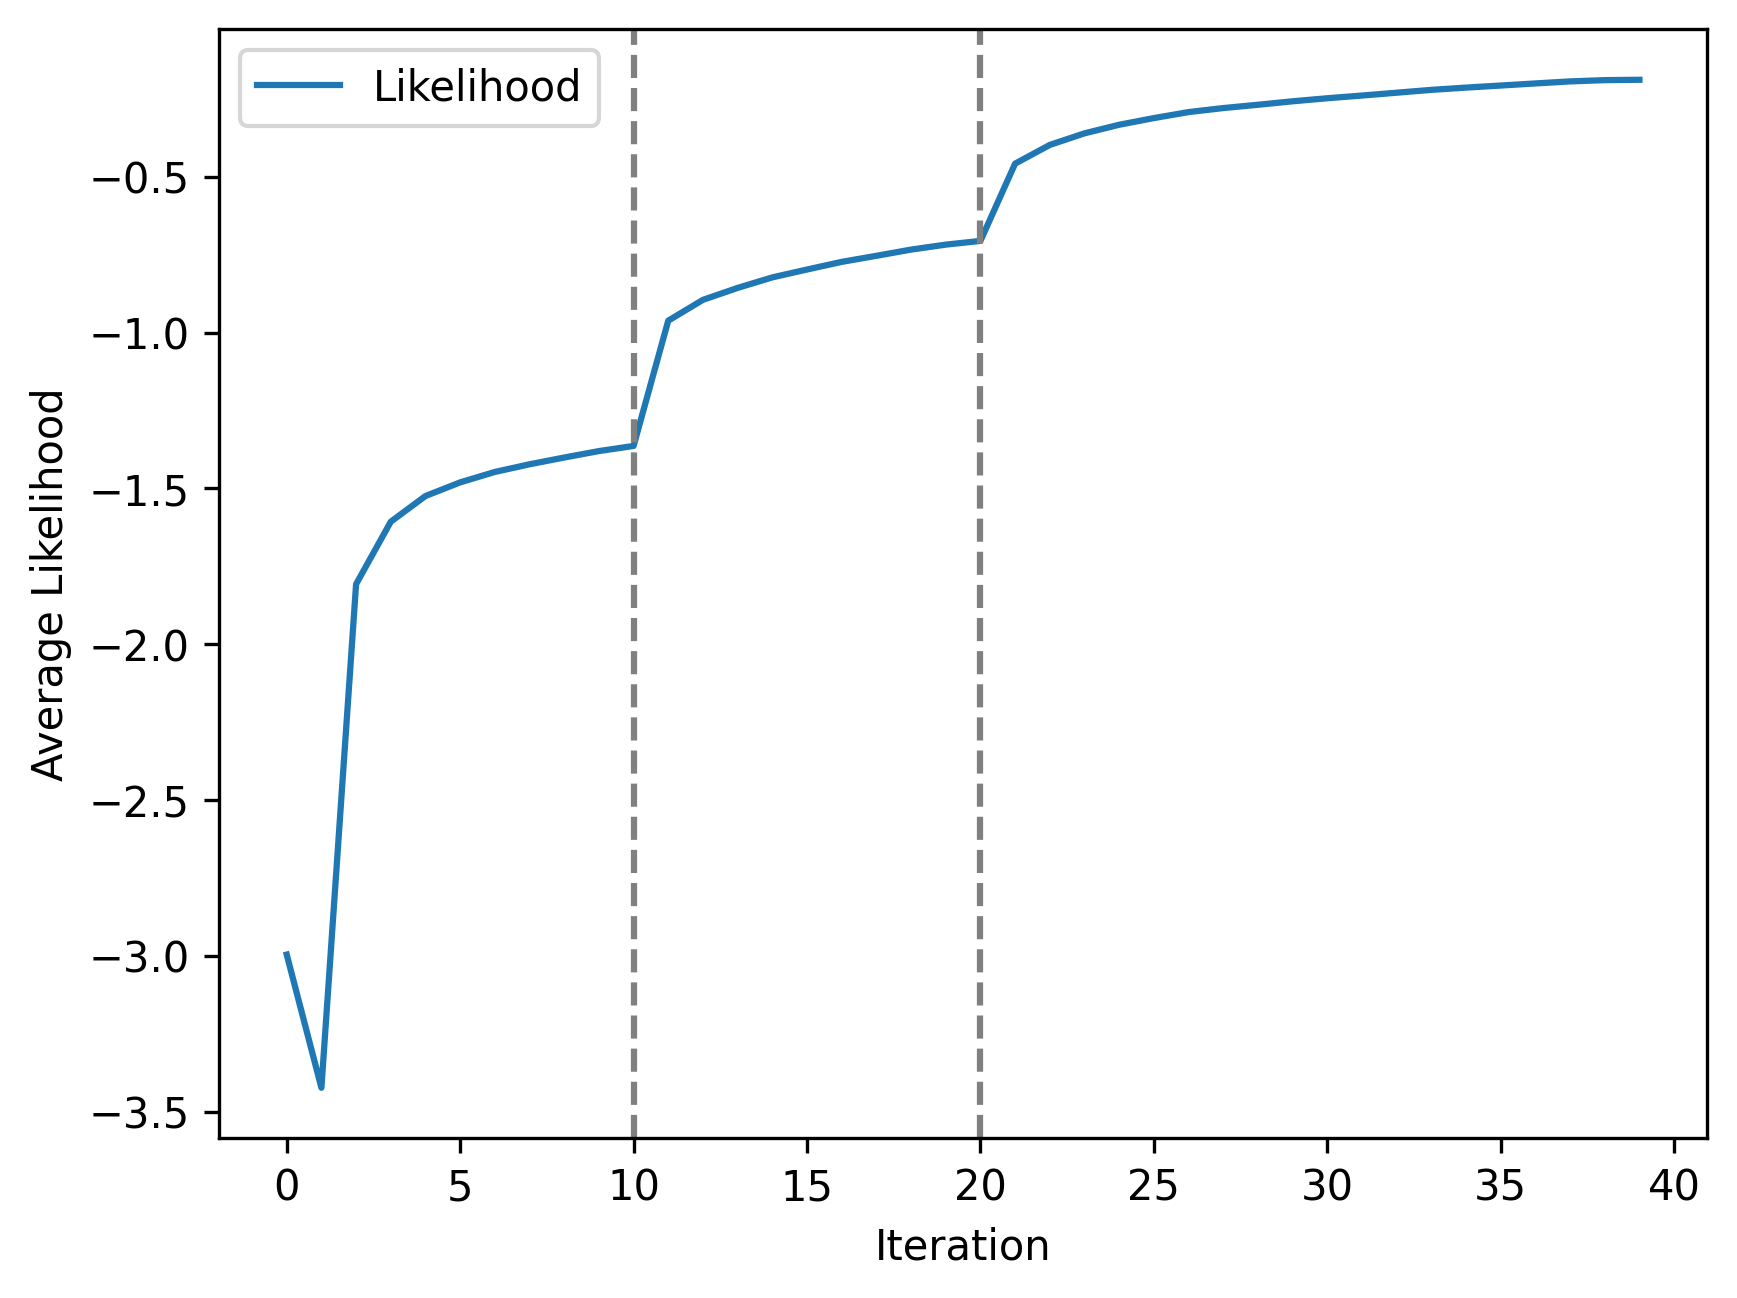

In [15]:
likelihood = []
for i in log:
    likelihood.append(i['average_log_likelihood'])

x = np.arange(0, 40)

fig = plt.figure(dpi = 300)
plt.plot(x, likelihood, label='Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Average Likelihood')
plt.axvline(x = 10, linestyle='--', color='gray')
plt.axvline(x = 20, linestyle='--', color='gray')
plt.legend()
plt.show()

In [54]:
# convert ballots and distorte ballots to csv for R's StatRank library
import csv
with open('data/gaussian_ballots.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([f"V{i+1}" for i in range(15)])
    for row in ballots:
        temp = row.copy()
        # index in StatRank library is from 1 (0 is reserved for empty slot), so plus 1 for all indexes
        temp = [t+1 for t in temp]
        writer.writerow(temp)

In [53]:
# convert distorted ballots
import csv
with open('data/gaussian_distorted_ballots.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([f"V{i+1}" for i in range(15)])

    for row in distorted_ballots:
        temp = row.copy()
        temp = [t+1 for t in temp]
        temp = temp + [0 for _ in range(15-len(temp))]
        writer.writerow(temp)

In [43]:
# test tie situation
tie_ballots = [[0,1,2],[1,2,0],[2,0,1]]

In [81]:
schedule = []
for _ in range(10):
    schedule.append((0.5,0.8))
for _ in range(10):
    schedule.append((0.3, 0.5))
for _ in range(20):
    schedule.append((0.1, 0.05))
start_time = time.time()
log = sp.theta_estimation(tie_ballots, alternative_number=3, iteration=40, sampling_rate=500, keep_rate=50, resampling_schedule=schedule)
print(time.time() - start_time)

iteration 0: average likelihood (log_value) is   -10.88180030401347
iteration 1: average likelihood (log_value) is   -5.438762488378949
iteration 2: average likelihood (log_value) is   -8.375899655308858
iteration 3: average likelihood (log_value) is   -8.393841429887589
iteration 4: average likelihood (log_value) is   -8.342682651221137
iteration 5: average likelihood (log_value) is   -8.525183400456832
iteration 6: average likelihood (log_value) is   -8.413762303231232
iteration 7: average likelihood (log_value) is   -8.492429959817324
iteration 8: average likelihood (log_value) is   -8.612523803579236
iteration 9: average likelihood (log_value) is   -8.453320972408378
iteration 10: average likelihood (log_value) is   -8.388345319948074
iteration 11: average likelihood (log_value) is   -9.08841782141455
iteration 12: average likelihood (log_value) is   -9.084039387092412
iteration 13: average likelihood (log_value) is   -8.980632570170046
iteration 14: average likelihood (log_value) 

In [58]:
theta0 = []
theta1 = []
theta2 = []
for i in log:
    theta0.append(list(i["theta_estimation"])[0])
    theta1.append(list(i["theta_estimation"])[1])
    theta2.append(list(i["theta_estimation"])[2])

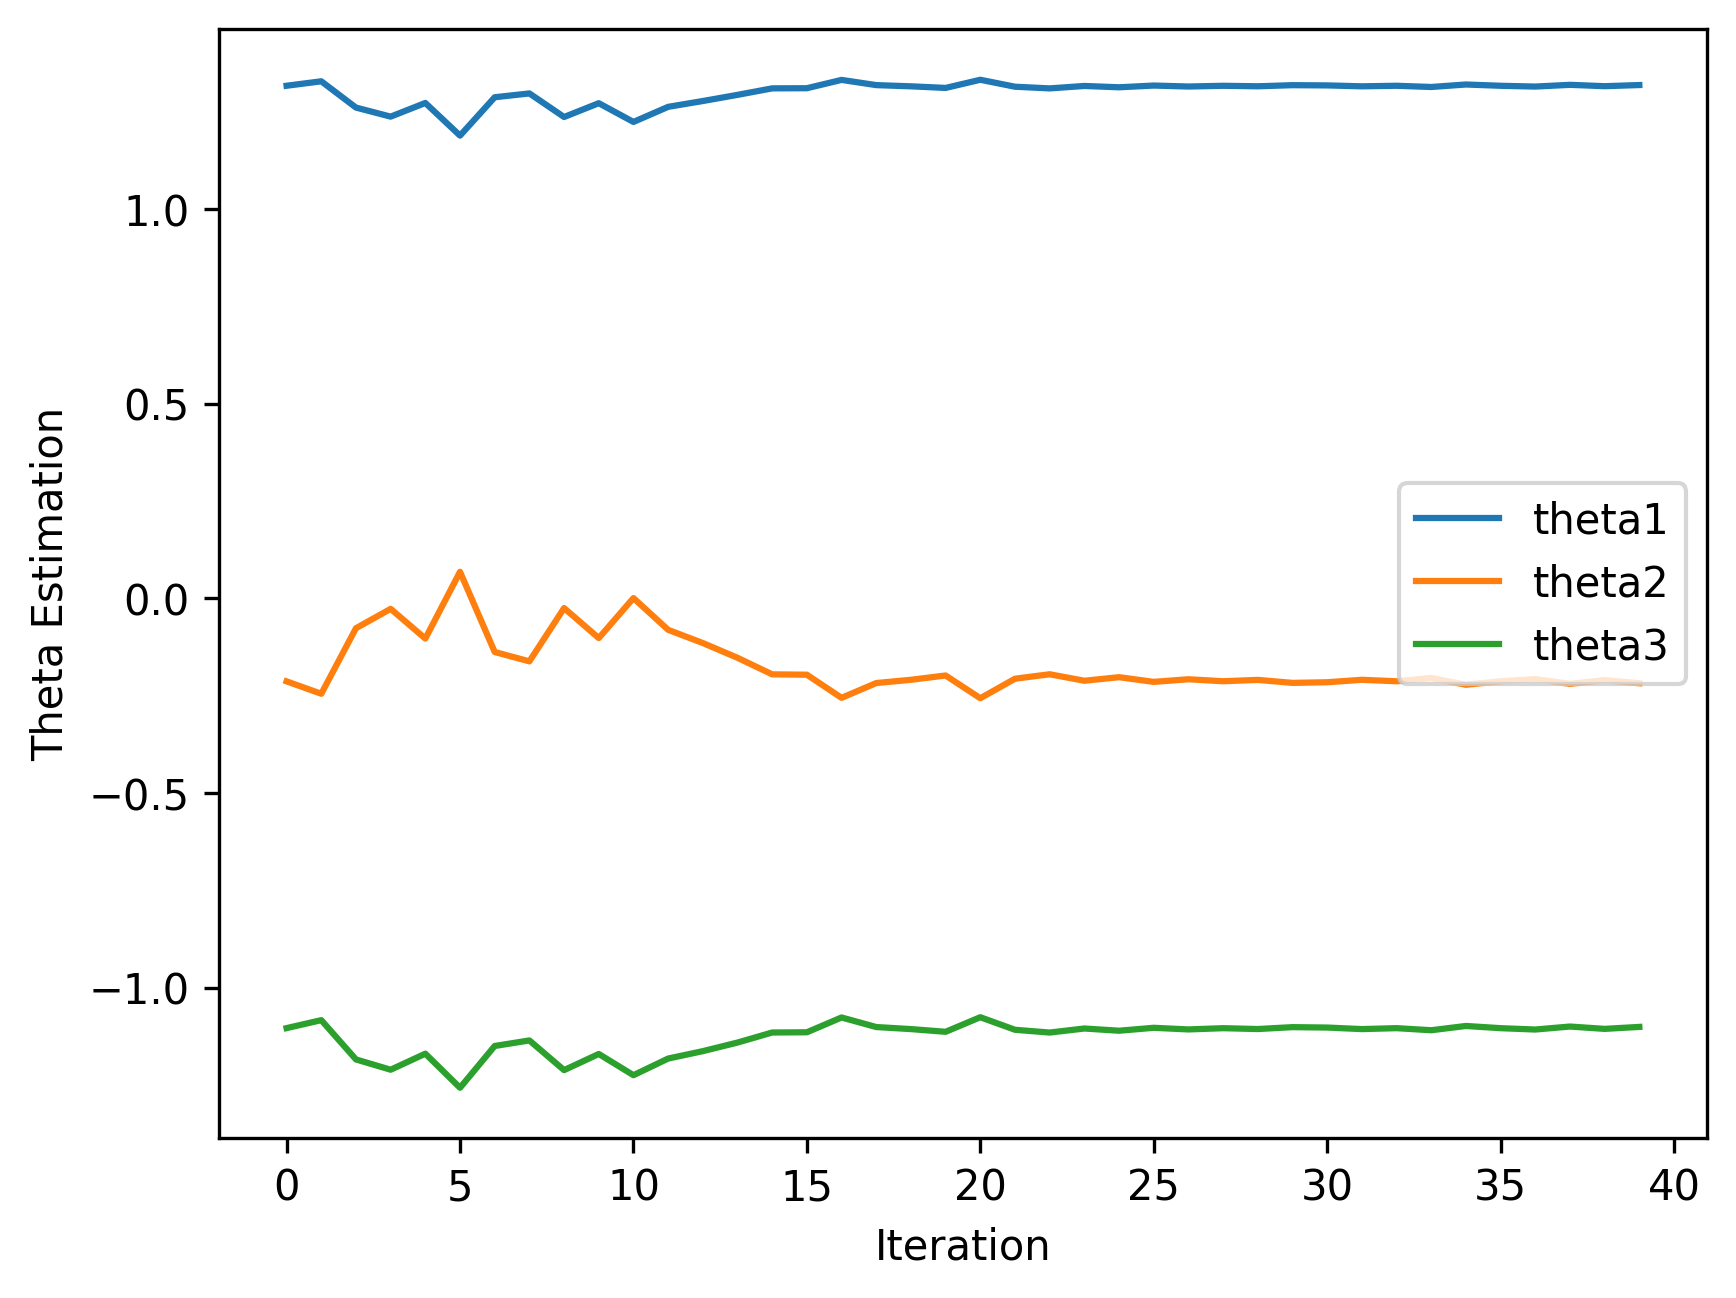

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 40)

fig = plt.figure(dpi = 300)
plt.plot(x, theta0, label='theta1')
plt.plot(x, theta1, label='theta2')
plt.plot(x, theta2, label='theta3')
plt.xlabel('Iteration')
plt.ylabel('Theta Estimation')
plt.legend()
plt.show()

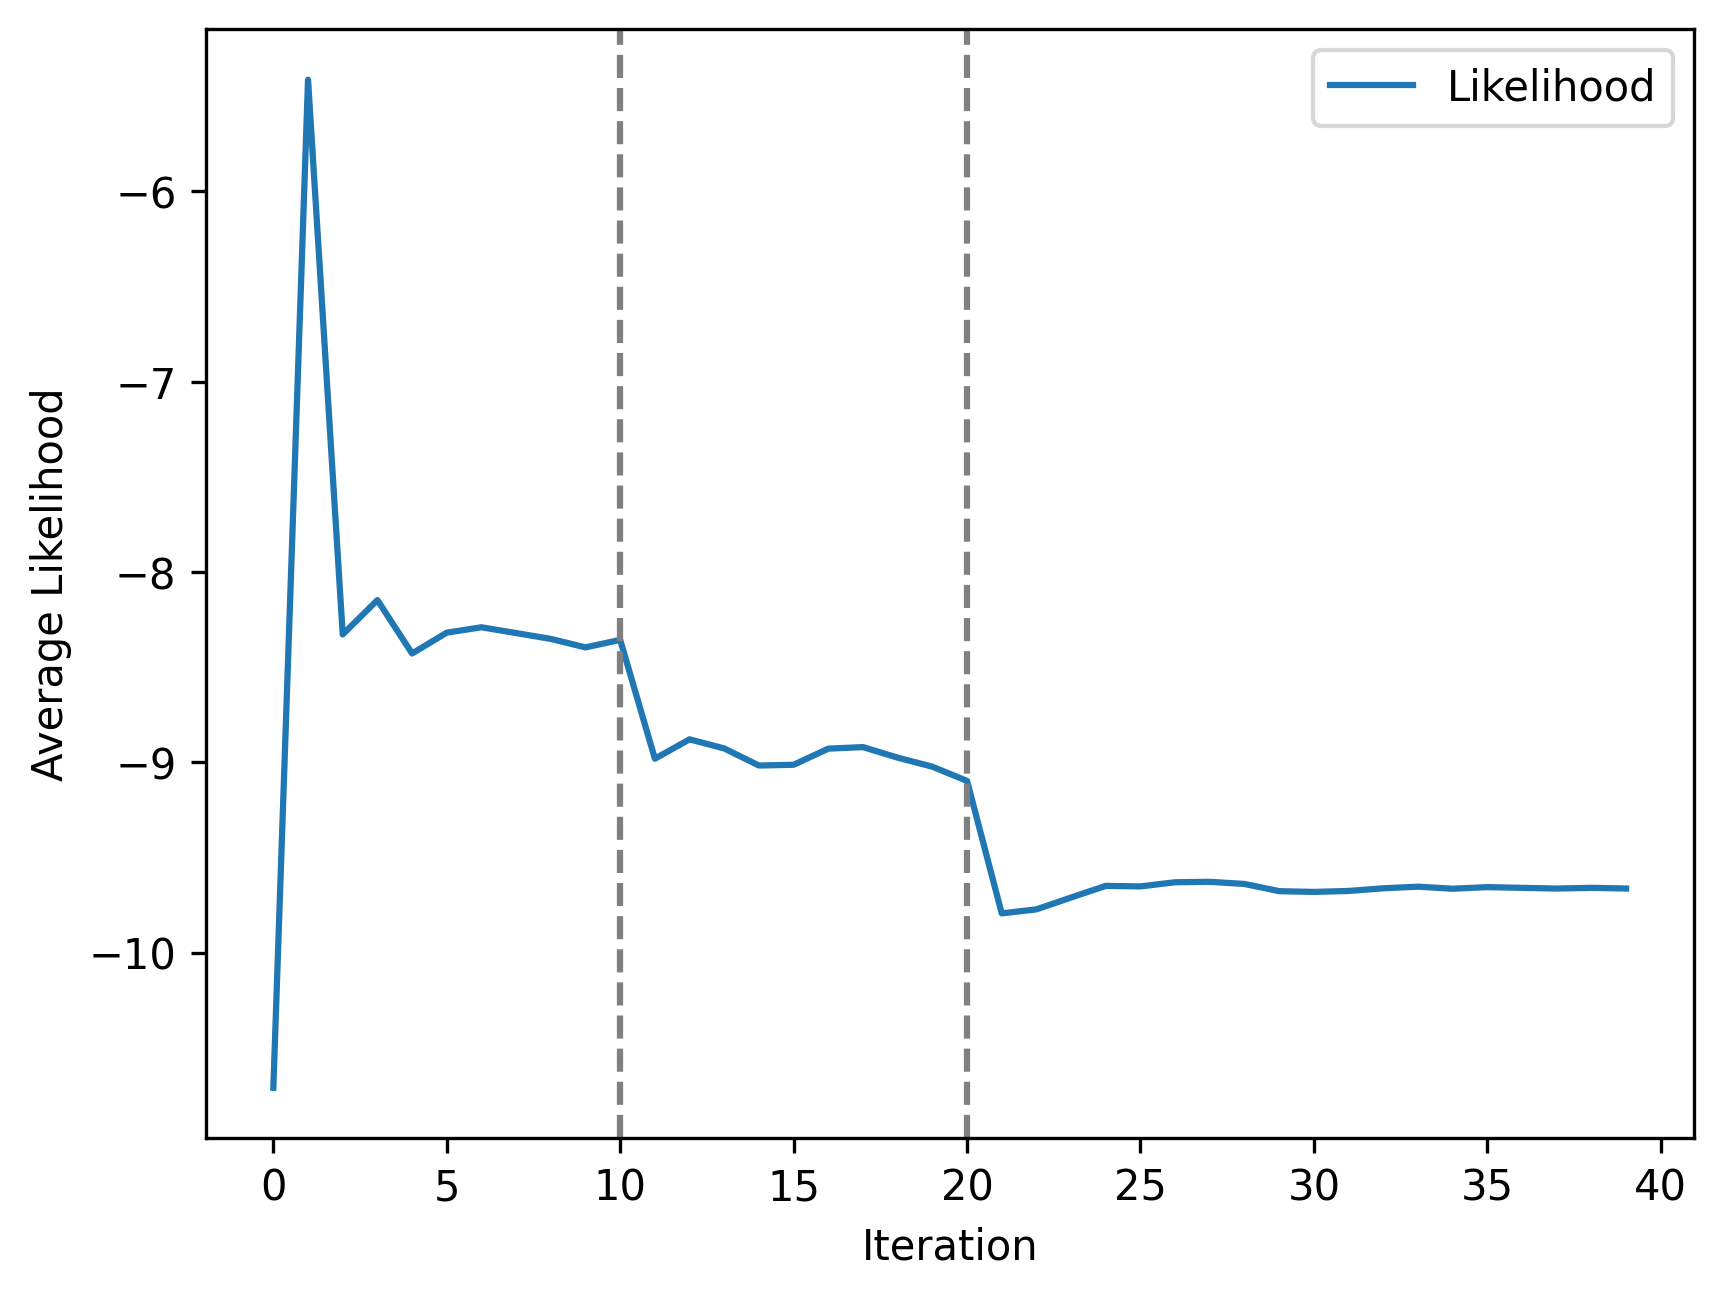

In [61]:
likelihood = []
for i in log:
    likelihood.append(i['average_log_likelihood'])

x = np.arange(0, 40)

fig = plt.figure(dpi = 300)
plt.plot(x, likelihood, label='Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Average Likelihood')
plt.axvline(x = 10, linestyle='--', color='gray')
plt.axvline(x = 20, linestyle='--', color='gray')
plt.legend()
plt.show()

In [2]:
# RUMSA without theta norm
import Aggregation.sampling_nothetanorm as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

game list loaded


In [4]:
tie_ballots = [[0,1,2],[1,2,0],[2,0,1]]

schedule = []
for _ in range(10):
    schedule.append((0.5,0.8))
for _ in range(10):
    schedule.append((0.3, 0.5))
for _ in range(20):
    schedule.append((0.1, 0.05))
start_time = time.time()
log = sp.theta_estimation(tie_ballots, alternative_number=3, iteration=40, sampling_rate=500, keep_rate=50, resampling_schedule=schedule)
print(time.time() - start_time)

iteration 0: average likelihood (log_value) is   -5.181209308615238
iteration 1: average likelihood (log_value) is   -0.5766327933309583
iteration 2: average likelihood (log_value) is   -0.26104684509848514
iteration 3: average likelihood (log_value) is   -0.27584214286974945
iteration 4: average likelihood (log_value) is   -0.21138534533322062
iteration 5: average likelihood (log_value) is   -0.20522268791662768
iteration 6: average likelihood (log_value) is   -0.22157933239687116
iteration 7: average likelihood (log_value) is   -0.20981172649326946
iteration 8: average likelihood (log_value) is   -0.22864011179848825
iteration 9: average likelihood (log_value) is   -0.23405688878903858
iteration 10: average likelihood (log_value) is   -0.20891383589990675
iteration 11: average likelihood (log_value) is   0.12406890348920799
iteration 12: average likelihood (log_value) is   0.12573093090014667
iteration 13: average likelihood (log_value) is   0.11962002245011673
iteration 14: average 

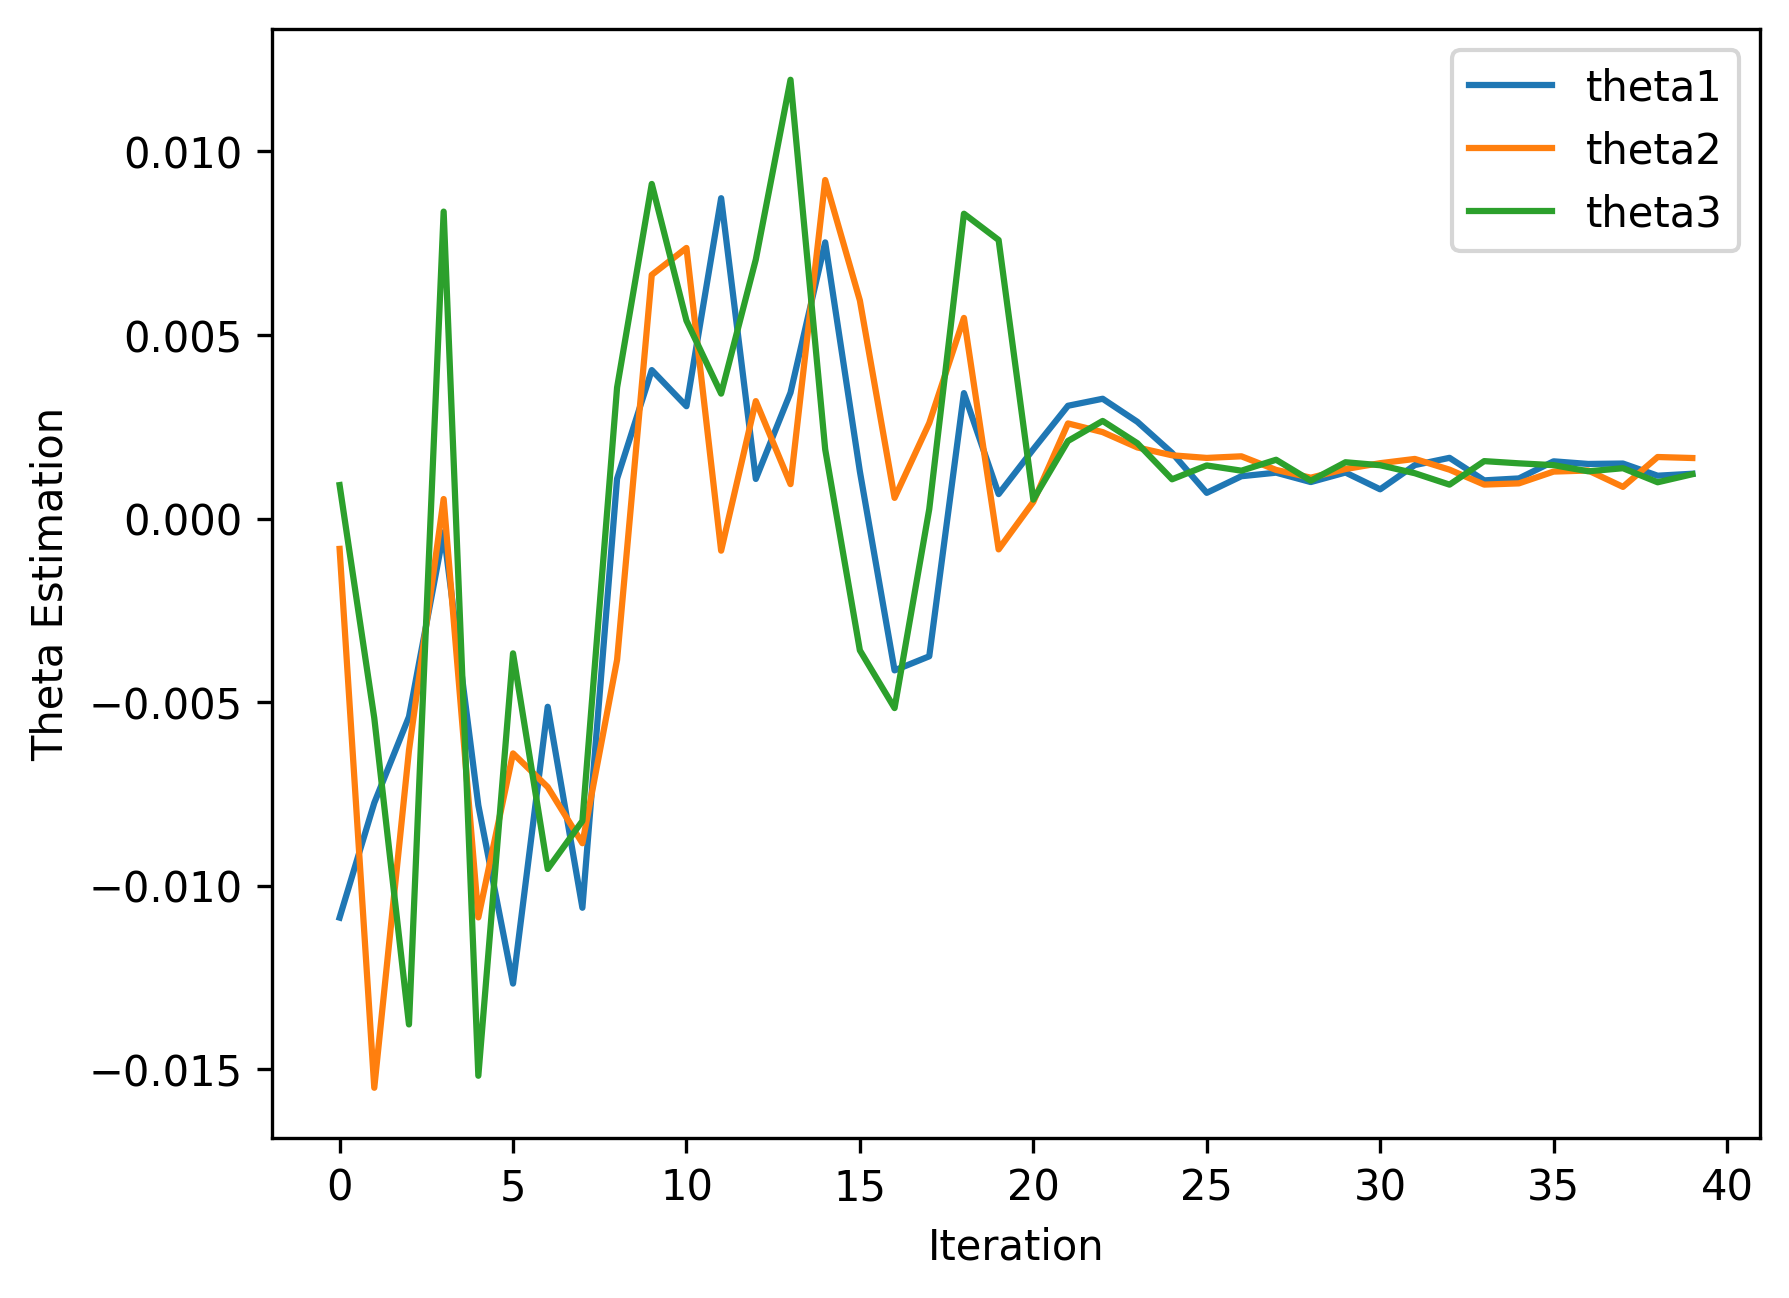

In [5]:
theta0 = []
theta1 = []
theta2 = []
for i in log:
    theta0.append(list(i["theta_estimation"])[0])
    theta1.append(list(i["theta_estimation"])[1])
    theta2.append(list(i["theta_estimation"])[2])

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 40)

fig = plt.figure(dpi = 300)
plt.plot(x, theta0, label='theta1')
plt.plot(x, theta1, label='theta2')
plt.plot(x, theta2, label='theta3')
plt.xlabel('Iteration')
plt.ylabel('Theta Estimation')
plt.legend()
plt.show()

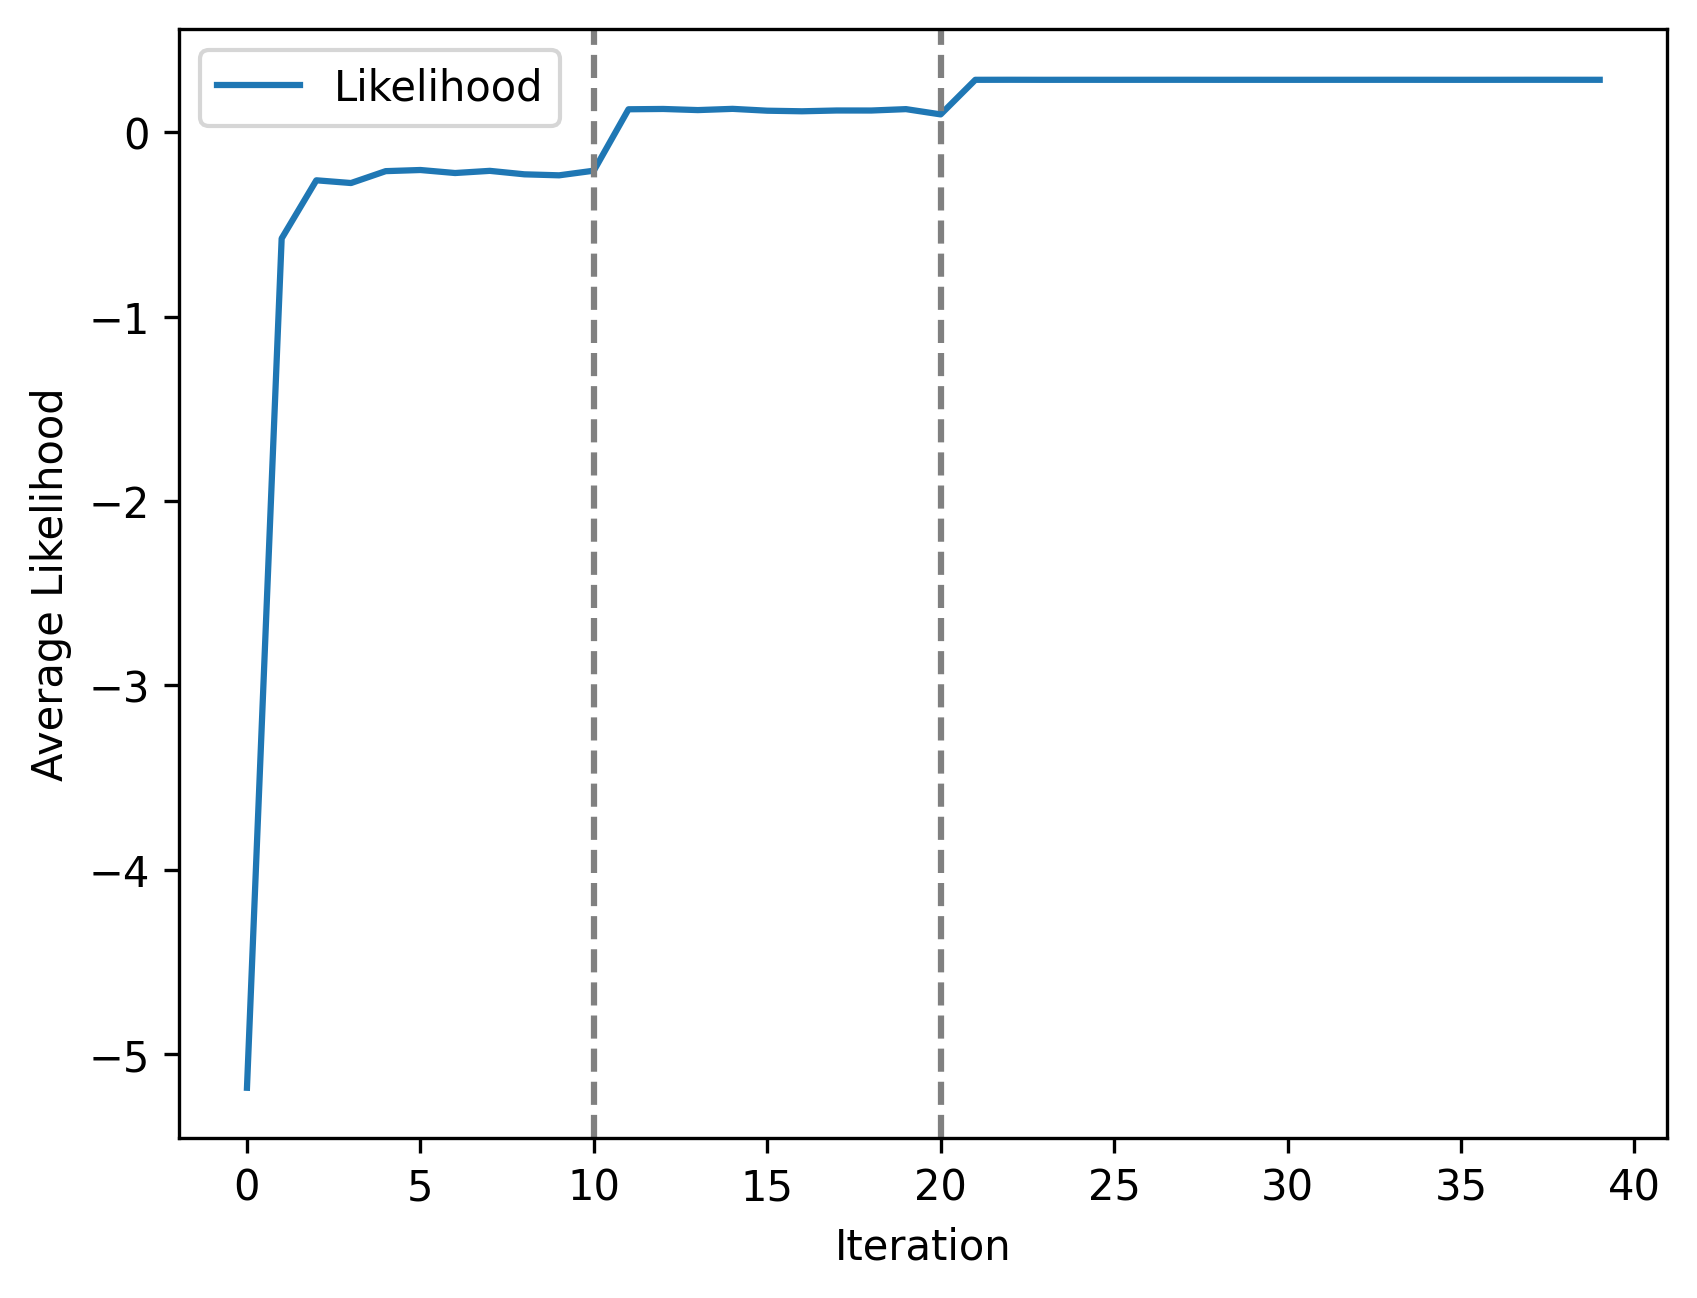

In [6]:
likelihood = []
for i in log:
    likelihood.append(i['average_log_likelihood'])

x = np.arange(0, 40)

fig = plt.figure(dpi = 300)
plt.plot(x, likelihood, label='Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Average Likelihood')
plt.axvline(x = 10, linestyle='--', color='gray')
plt.axvline(x = 20, linestyle='--', color='gray')
plt.legend()
plt.show()

In [1]:
# RUMSA without theta norm
import Aggregation.sampling_nothetanorm as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

game list loaded


In [2]:
tie_ballots = [[0,1,2],[0,2,1],[2,0,1]]

schedule = []
for _ in range(10):
    schedule.append((0.5,0.8))
for _ in range(10):
    schedule.append((0.3, 0.5))
for _ in range(20):
    schedule.append((0.1, 0.05))
start_time = time.time()
log = sp.theta_estimation(tie_ballots, alternative_number=3, iteration=40, sampling_rate=500, keep_rate=50, resampling_schedule=schedule)
print(time.time() - start_time)

iteration 0: average likelihood (log_value) is   -4.236908973079039
iteration 1: average likelihood (log_value) is   -0.5593924432790783
iteration 2: average likelihood (log_value) is   -0.3470561090545717
iteration 3: average likelihood (log_value) is   -0.23209581485389041
iteration 4: average likelihood (log_value) is   -0.20927239812257936
iteration 5: average likelihood (log_value) is   -0.19338070198200058
iteration 6: average likelihood (log_value) is   -0.151922462363615
iteration 7: average likelihood (log_value) is   -0.15665964995860449
iteration 8: average likelihood (log_value) is   -0.18851035611607142
iteration 9: average likelihood (log_value) is   -0.15770617724777922
iteration 10: average likelihood (log_value) is   -0.19216944271795566
iteration 11: average likelihood (log_value) is   0.07573633702316172
iteration 12: average likelihood (log_value) is   0.07496463405011329
iteration 13: average likelihood (log_value) is   0.10186699429371374
iteration 14: average lik

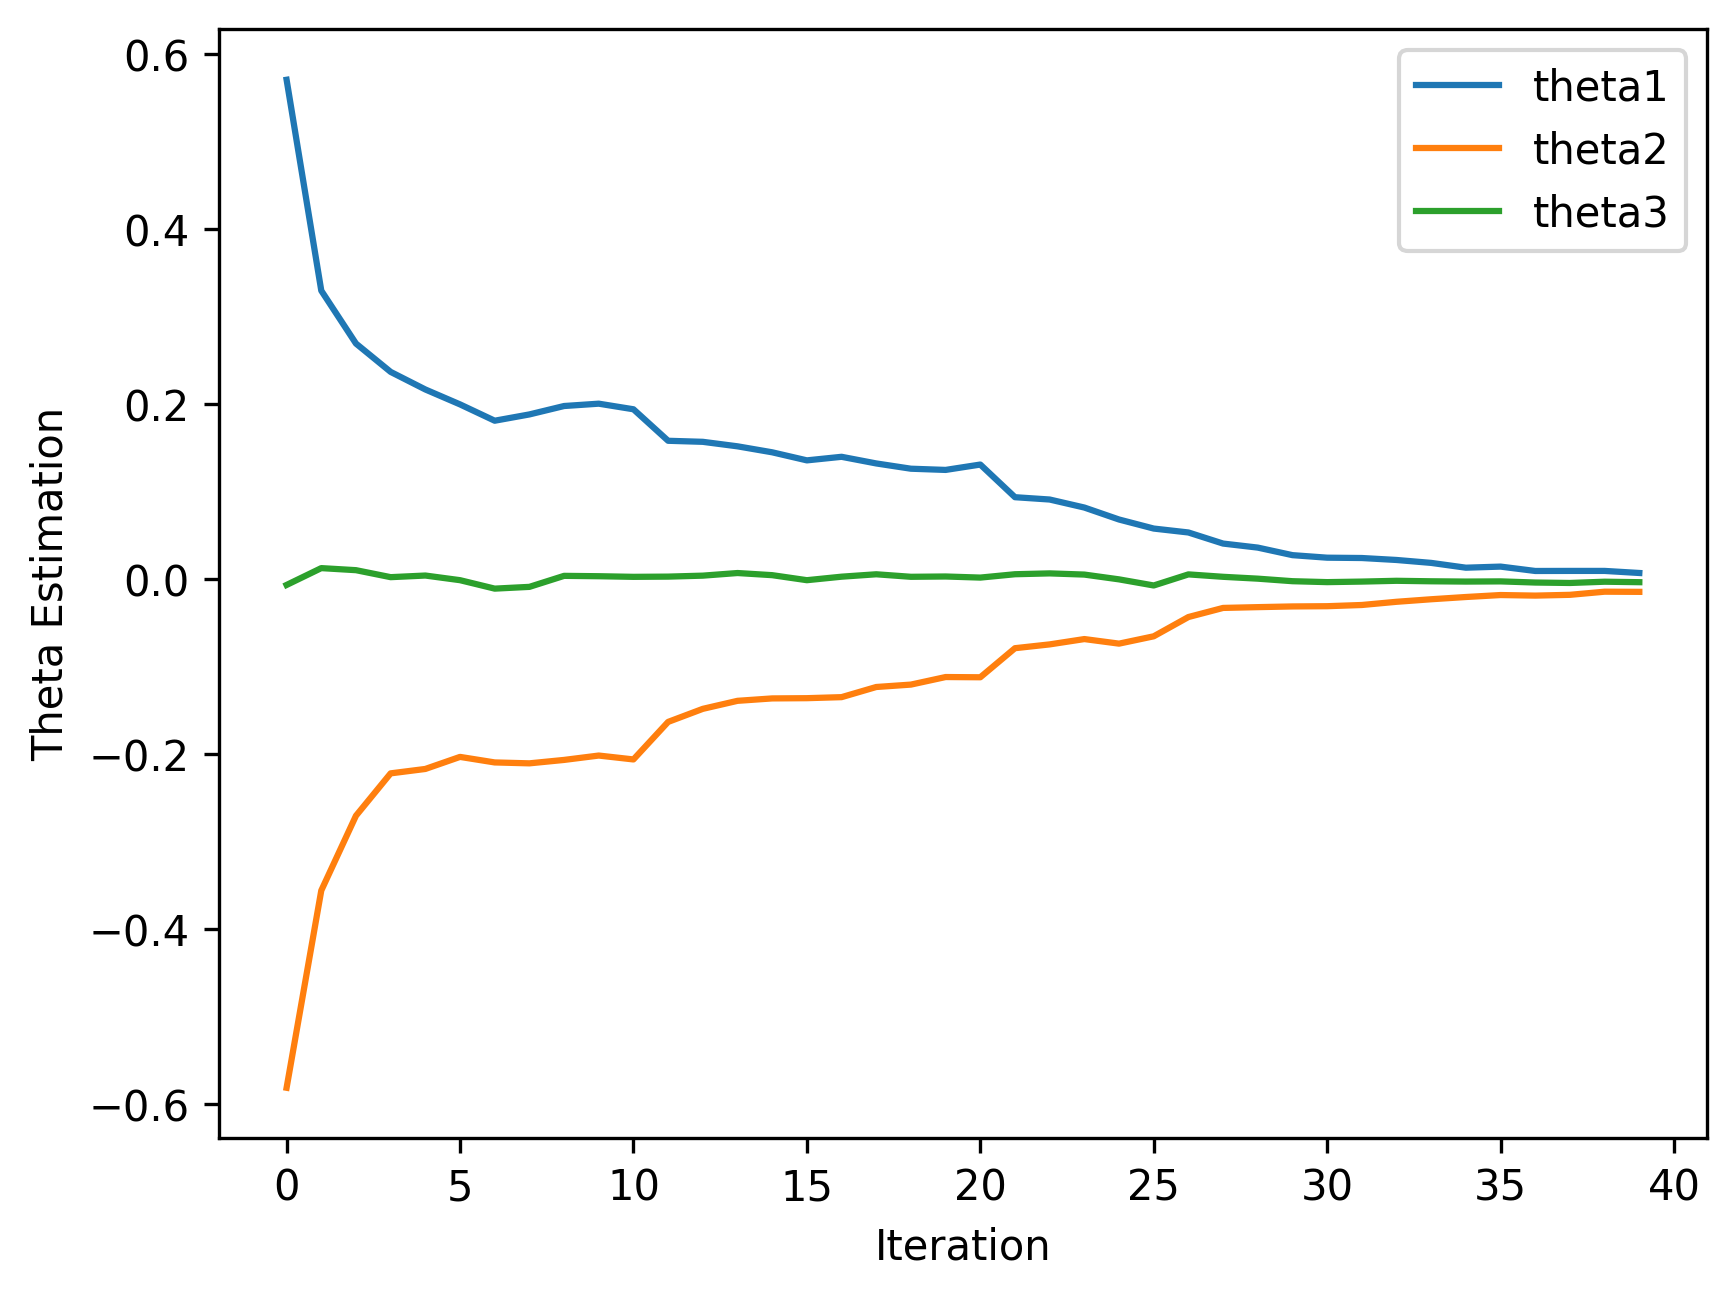

In [3]:
theta0 = []
theta1 = []
theta2 = []
for i in log:
    theta0.append(list(i["theta_estimation"])[0])
    theta1.append(list(i["theta_estimation"])[1])
    theta2.append(list(i["theta_estimation"])[2])

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 40)

fig = plt.figure(dpi = 300)
plt.plot(x, theta0, label='theta1')
plt.plot(x, theta1, label='theta2')
plt.plot(x, theta2, label='theta3')
plt.xlabel('Iteration')
plt.ylabel('Theta Estimation')
plt.legend()
plt.show()